
# <font color = "Blue"> <B>  Problem Statement: Capstain Project


### <font color = "Navy Blue"> <b> An E Commerce company or churn (you can choose either of these two domains) provider is facing a lot of competition in the current market and it has become a challenge to retain the existing customers in the current situation. Hence, the company wants to develop a model through which they can do churn prediction of the accounts and provide segmented offers to the potential churners. In this company, account churn is a major thing because 1 account can have multiple customers. hence by losing one account the company might be losing more than one customer.

<font color = "Blue">**Data Dictionary**

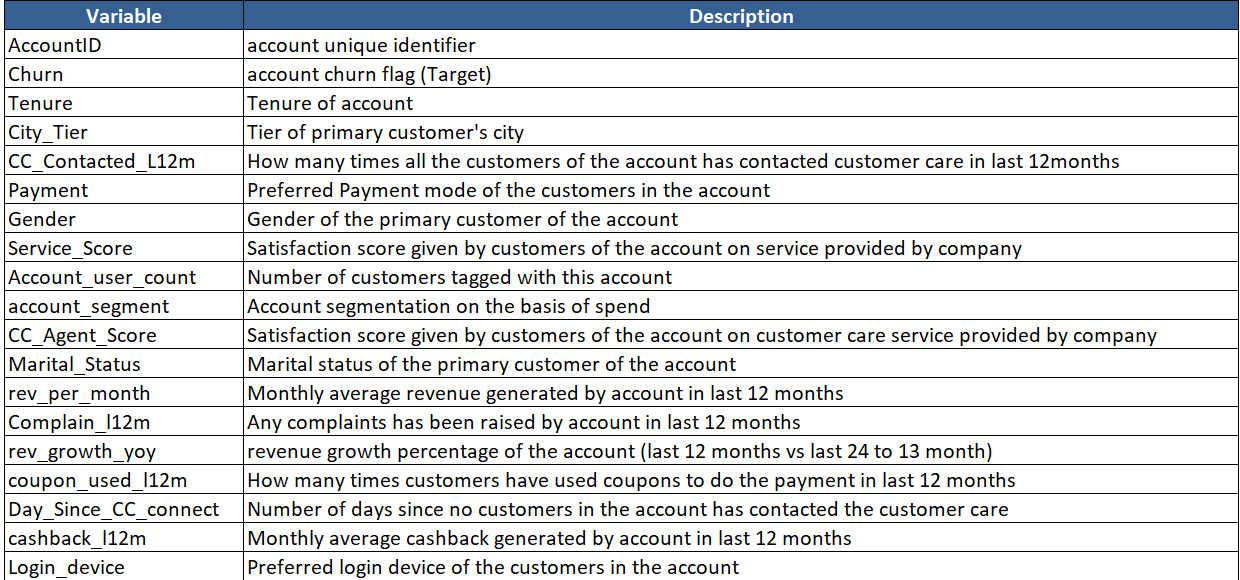

In [423]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV 
from sklearn import metrics,model_selection

from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
# To model the KNN classifier
from sklearn.neighbors import KNeighborsClassifier
# To model the Bagging classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
# To model the Boosting classifiers
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')

### <font color = "Blue"> <b> Visual inspection of data (rows, columns, descriptive details)	

**Read the data**

In [424]:
from google.colab import files

In [425]:
import io
uploaded=files.upload()

Saving Customer Churn Data.xlsx to Customer Churn Data (1).xlsx


In [426]:
churn = pd.read_excel(io.BytesIO(uploaded["Customer Churn Data.xlsx"]),sheet_name="Data for DSBA")
churn.head(10)

AccountID  Churn Tenure  City_Tier  CC_Contacted_LY           Payment  \
0      20000      1      4        3.0              6.0        Debit Card   
1      20001      1      0        1.0              8.0               UPI   
2      20002      1      0        1.0             30.0        Debit Card   
3      20003      1      0        3.0             15.0        Debit Card   
4      20004      1      0        1.0             12.0       Credit Card   
5      20005      1      0        1.0             22.0        Debit Card   
6      20006      1      2        3.0             11.0  Cash on Delivery   
7      20007      1      0        1.0              6.0       Credit Card   
8      20008      1     13        3.0              9.0          E wallet   
9      20009      1      0        1.0             31.0        Debit Card   

   Gender  Service_Score Account_user_count account_segment  CC_Agent_Score  \
0  Female            3.0                  3           Super             2.0   
1    Male            3.0                  4    Regular Plus             3.0   
2    Male            2.0                  4    Regular Plus             3.0   
3    Male            2.0                  4           Super             5.0   
4    Male            2.0                  3    Regular Plus             5.0   
5  Female            3.0                NaN    Regular Plus             5.0   
6    Male            2.0                  3           Super             2.0   
7    Male            3.0                  3    Regular Plus             2.0   
8    Male            2.0                  4    Regular Plus             3.0   
9    Male            2.0                  5    Regular Plus             3.0   

  Marital_Status rev_per_month  Complain_ly rev_growth_yoy  \
0         Single             9          1.0             11   
1         Single             7          1.0             15   
2         Single             6          1.0             14   
3         Single             8          0.0             23   
4         Single             3          0.0             11   
5         Single             2          1.0             22   
6       Divorced             4          0.0             14   
7       Divorced             3          1.0             16   
8       Divorced             2          1.0             14   
9         Single             2          0.0             12   

  coupon_used_for_payment Day_Since_CC_connect cashback Login_device  
0                       1                    5   159.93       Mobile  
1                       0                    0    120.9       Mobile  
2                       0                    3      NaN       Mobile  
3                       0                    3   134.07       Mobile  
4                       1                    3    129.6       Mobile  
5                       4                    7   139.19     Computer  
6                       0                    0   120.86       Mobile  
7                       2                    0   122.93       Mobile  
8                       0                    2   126.83       Mobile  
9                       1                    1   122.93       Mobile

In [427]:
churn.shape

(11260, 19)

**Get the info**

In [428]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

**Check for Duplicates**

In [429]:
# There is a column with indicating Account ID, which is of no importance while building Data Model
# Hence dropping the first column for further analysis
churn.drop('AccountID',inplace=True,axis=1)

**Get the Summary Statistics**

In [430]:
churn.describe(include='all')

Churn   Tenure     City_Tier  CC_Contacted_LY     Payment  \
count   11260.000000  11158.0  11148.000000     11158.000000       11151   
unique           NaN     38.0           NaN              NaN           5   
top              NaN      1.0           NaN              NaN  Debit Card   
freq             NaN   1351.0           NaN              NaN        4587   
mean        0.168384      NaN      1.653929        17.867091         NaN   
std         0.374223      NaN      0.915015         8.853269         NaN   
min         0.000000      NaN      1.000000         4.000000         NaN   
25%         0.000000      NaN      1.000000        11.000000         NaN   
50%         0.000000      NaN      1.000000        16.000000         NaN   
75%         0.000000      NaN      3.000000        23.000000         NaN   
max         1.000000      NaN      3.000000       132.000000         NaN   

       Gender  Service_Score  Account_user_count account_segment  \
count   11152   11162.000000             11148.0           11163   
unique      4            NaN                 7.0               7   
top      Male            NaN                 4.0           Super   
freq     6328            NaN              4569.0            4062   
mean      NaN       2.902526                 NaN             NaN   
std       NaN       0.725584                 NaN             NaN   
min       NaN       0.000000                 NaN             NaN   
25%       NaN       2.000000                 NaN             NaN   
50%       NaN       3.000000                 NaN             NaN   
75%       NaN       3.000000                 NaN             NaN   
max       NaN       5.000000                 NaN             NaN   

        CC_Agent_Score Marital_Status  rev_per_month   Complain_ly  \
count     11144.000000          11048        11158.0  10903.000000   
unique             NaN              3           59.0           NaN   
top                NaN        Married            3.0           NaN   
freq               NaN           5860         1746.0           NaN   
mean          3.066493            NaN            NaN      0.285334   
std           1.379772            NaN            NaN      0.451594   
min           1.000000            NaN            NaN      0.000000   
25%           2.000000            NaN            NaN      0.000000   
50%           3.000000            NaN            NaN      0.000000   
75%           4.000000            NaN            NaN      1.000000   
max           5.000000            NaN            NaN      1.000000   

        rev_growth_yoy  coupon_used_for_payment  Day_Since_CC_connect  \
count          11260.0                  11260.0               10903.0   
unique            20.0                     20.0                  24.0   
top               14.0                      1.0                   3.0   
freq            1524.0                   4373.0                1816.0   
mean               NaN                      NaN                   NaN   
std                NaN                      NaN                   NaN   
min                NaN                      NaN                   NaN   
25%                NaN                      NaN                   NaN   
50%                NaN                      NaN                   NaN   
75%                NaN                      NaN                   NaN   
max                NaN                      NaN                   NaN   

        cashback Login_device  
count   10789.00        11039  
unique   5693.00            3  
top       155.62       Mobile  
freq       10.00         7482  
mean         NaN          NaN  
std          NaN          NaN  
min          NaN          NaN  
25%          NaN          NaN  
50%          NaN          NaN  
75%          NaN          NaN  
max          NaN          NaN

####  <font color = "Red"> ** Percentile values of most of the variables suggest presence of NaN values, indicating Data has lot of missing values which may need further treatment basis their data types.
####  <font color = "Red"> ** Mean and Median values of all the variables have fair differences, which indicates data must be skewed.
#### <font color = "Red">** Values of Max values, Min Values compared to 75% and 25%, indicates high number of outliers.
#### <font color = "Red">** Some of the continuous variables is found to be of 'object datatype, suggesting presence of unwanted variables,
#### <font color = "Red">** Gender column is supposed to have only 2 variables, but value count suggest of 4 unique values, suggesting posible renaming of some of the values
#### <font color = "Red">** Lets check for null values, duplicate values, outliers and skewness.

**Check for Null Values**

In [431]:
churn.isnull().sum()

Churn                        0
Tenure                     102
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

### <font color= "Green"> There are lot of null values in the given dataset




Check for Unique values

In [432]:
for feature in churn.columns:
    if churn[feature].dtype == 'object':
        print(feature)
        print(churn[feature].unique())
        print('\n')

Tenure
[4 0 2 13 11 '#' 9 99 19 20 14 8 26 18 5 30 7 1 23 3 29 6 28 24 25 16 10
 15 22 nan 27 12 21 17 50 60 31 51 61]


Payment
['Debit Card' 'UPI' 'Credit Card' 'Cash on Delivery' 'E wallet' nan]


Gender
['Female' 'Male' 'F' nan 'M']


Account_user_count
[3 4 nan 5 2 '@' 1 6]


account_segment
['Super' 'Regular Plus' 'Regular' 'HNI' 'Regular +' nan 'Super Plus'
 'Super +']


Marital_Status
['Single' 'Divorced' 'Married' nan]


rev_per_month
[9 7 6 8 3 2 4 10 1 5 '+' 130 nan 19 139 102 120 138 127 123 124 116 21
 126 134 113 114 108 140 133 129 107 118 11 105 20 119 121 137 110 22 101
 136 125 14 13 12 115 23 122 117 131 104 15 25 135 111 109 100 103]


rev_growth_yoy
[11 15 14 23 22 16 12 13 17 18 24 19 20 21 25 26 '$' 4 27 28]


coupon_used_for_payment
[1 0 4 2 9 6 11 7 12 10 5 3 13 15 8 '#' '$' 14 '*' 16]


Day_Since_CC_connect
[5 0 3 7 2 1 8 6 4 15 nan 11 10 9 13 12 17 16 14 30 '$' 46 18 31 47]


cashback
[159.93 120.9 nan ... 227.36 226.91 191.42]


Login_device
['Mobile' 'Compu

In [433]:
for column in churn.columns:
    if churn[column].dtype == 'object':
        print(column.upper(),': ',churn[column].nunique())
        print(churn[column].value_counts().sort_values())
        print('\n')

TENURE :  38
61       2
50       2
51       2
60       2
31      96
29     114
25     114
#      116
26     122
99     131
27     131
30     137
28     137
24     147
22     151
23     169
21     170
17     215
20     217
18     253
19     273
16     291
15     311
14     345
2      354
13     359
12     360
6      363
11     388
4      403
5      403
3      410
10     423
7      450
9      496
8      519
0     1231
1     1351
Name: Tenure, dtype: int64


PAYMENT :  5
UPI                  822
Cash on Delivery    1014
E wallet            1217
Credit Card         3511
Debit Card          4587
Name: Payment, dtype: int64


GENDER :  4
F          270
M          376
Female    4178
Male      6328
Name: Gender, dtype: int64


ACCOUNT_USER_COUNT :  7
6     315
@     332
1     446
2     526
5    1699
3    3261
4    4569
Name: Account_user_count, dtype: int64


ACCOUNT_SEGMENT :  7
Super +           47
Regular +        262
Regular          520
Super Plus       771
HNI             1639
Regular Pl

### <font color = "Blue"> <b>Understanding of attributes (variable info, renaming if required)

In [434]:
churn['Gender']= churn['Gender'].replace({'M':'Male', 'F':'Female'})
churn['account_segment']=churn['account_segment'].replace({'Regular +':'Regular Plus', 'Super +':'Super Plus'})


### <font color = "Blue"> <b>Removal of unwanted variables (if applicable)

In [435]:
feature=churn.select_dtypes(include=['object']).columns
for i in range(0,len(feature)):
  churn[feature[i]]= churn[feature[i]].replace({'@':np.nan,'#':np.nan,'+':np.nan,'$':np.nan,'*':np.nan,'&&&&':np.nan})
    

In [436]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11042 non-null  float64
 2   City_Tier                11148 non-null  float64
 3   CC_Contacted_LY          11158 non-null  float64
 4   Payment                  11151 non-null  object 
 5   Gender                   11152 non-null  object 
 6   Service_Score            11162 non-null  float64
 7   Account_user_count       10816 non-null  float64
 8   account_segment          11163 non-null  object 
 9   CC_Agent_Score           11144 non-null  float64
 10  Marital_Status           11048 non-null  object 
 11  rev_per_month            10469 non-null  float64
 12  Complain_ly              10903 non-null  float64
 13  rev_growth_yoy           11257 non-null  float64
 14  coupon_used_for_paymen

In [437]:
for feature in churn.columns:
    if churn[feature].dtype == 'object':
        print(feature)
        print(churn[feature].unique())
        print('\n')

Payment
['Debit Card' 'UPI' 'Credit Card' 'Cash on Delivery' 'E wallet' nan]


Gender
['Female' 'Male' nan]


account_segment
['Super' 'Regular Plus' 'Regular' 'HNI' nan 'Super Plus']


Marital_Status
['Single' 'Divorced' 'Married' nan]


Login_device
['Mobile' 'Computer' nan]




### <font color = "Blue"> <b> Description of data without null values (New Data Set only for description purpose)

In [438]:
churn_nonull=churn.copy()


In [439]:
churn_nonull.dropna(axis=0,inplace=True)


In [440]:
churn_nonull.describe(include='all').T

count unique           top  freq        mean  \
Churn                    8249.0    NaN           NaN   NaN    0.166808   
Tenure                   8249.0    NaN           NaN   NaN   11.410959   
City_Tier                8249.0    NaN           NaN   NaN    1.656928   
CC_Contacted_LY          8249.0    NaN           NaN   NaN   17.866529   
Payment                    8249      5    Debit Card  3423         NaN   
Gender                     8249      2          Male  4977         NaN   
Service_Score            8249.0    NaN           NaN   NaN     2.90314   
Account_user_count       8249.0    NaN           NaN   NaN    3.695721   
account_segment            8249      5  Regular Plus  3045         NaN   
CC_Agent_Score           8249.0    NaN           NaN   NaN    3.062311   
Marital_Status             8249      3       Married  4382         NaN   
rev_per_month            8249.0    NaN           NaN   NaN    6.670506   
Complain_ly              8249.0    NaN           NaN   NaN     0.28258   
rev_growth_yoy           8249.0    NaN           NaN   NaN   16.192629   
coupon_used_for_payment  8249.0    NaN           NaN   NaN    1.808583   
Day_Since_CC_connect     8249.0    NaN           NaN   NaN    4.654867   
cashback                 8249.0    NaN           NaN   NaN  179.091426   
Login_device               8249      2        Mobile  5867         NaN   

                               std  min     25%     50%     75%     max  
Churn                     0.372827  0.0     0.0     0.0     0.0     1.0  
Tenure                   14.020332  0.0     2.0     9.0    16.0    99.0  
City_Tier                 0.916567  1.0     1.0     1.0     3.0     3.0  
CC_Contacted_LY           8.924066  4.0    11.0    16.0    23.0   132.0  
Payment                        NaN  NaN     NaN     NaN     NaN     NaN  
Gender                         NaN  NaN     NaN     NaN     NaN     NaN  
Service_Score             0.727025  0.0     2.0     3.0     3.0     5.0  
Account_user_count        1.032349  1.0     3.0     4.0     4.0     6.0  
account_segment                NaN  NaN     NaN     NaN     NaN     NaN  
CC_Agent_Score            1.379142  1.0     2.0     3.0     4.0     5.0  
Marital_Status                 NaN  NaN     NaN     NaN     NaN     NaN  
rev_per_month            13.313028  1.0     3.0     5.0     7.0   140.0  
Complain_ly               0.450281  0.0     0.0     0.0     1.0     1.0  
rev_growth_yoy            3.767924  4.0    13.0    15.0    19.0    28.0  
coupon_used_for_payment       2.01  0.0     1.0     1.0     2.0    16.0  
Day_Since_CC_connect      3.704998  0.0     2.0     3.0     8.0    47.0  
cashback                 49.536145  0.0  147.11  164.68  198.88  331.26  
Login_device                   NaN  NaN     NaN     NaN     NaN     NaN

## <font color = "Blue"> <b>Exploratory data analysis

####   <font color='Blue'> <b>Uni-variate analysis

In [441]:
churn.select_dtypes(exclude=['object']).columns

Index(['Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY', 'Service_Score',
       'Account_user_count', 'CC_Agent_Score', 'rev_per_month', 'Complain_ly',
       'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect',
       'cashback'],
      dtype='object')

In [442]:
# Lets import random colors list for plotting 
import random
get_colors = lambda n: list(map(lambda i: "#" + "%06x" % random.randint(0,0xFFFFFF),range(n)))
color_list=get_colors(13)
color_list

['#0d3361',
 '#1f75a6',
 '#16c483',
 '#4cb5e1',
 '#7f86ff',
 '#c140b2',
 '#16b174',
 '#2ecd7c',
 '#27834a',
 '#3150e2',
 '#a0aa8f',
 '#026904',
 '#4a2c38']

In [443]:
churn.select_dtypes(exclude=['object']).columns.size

13

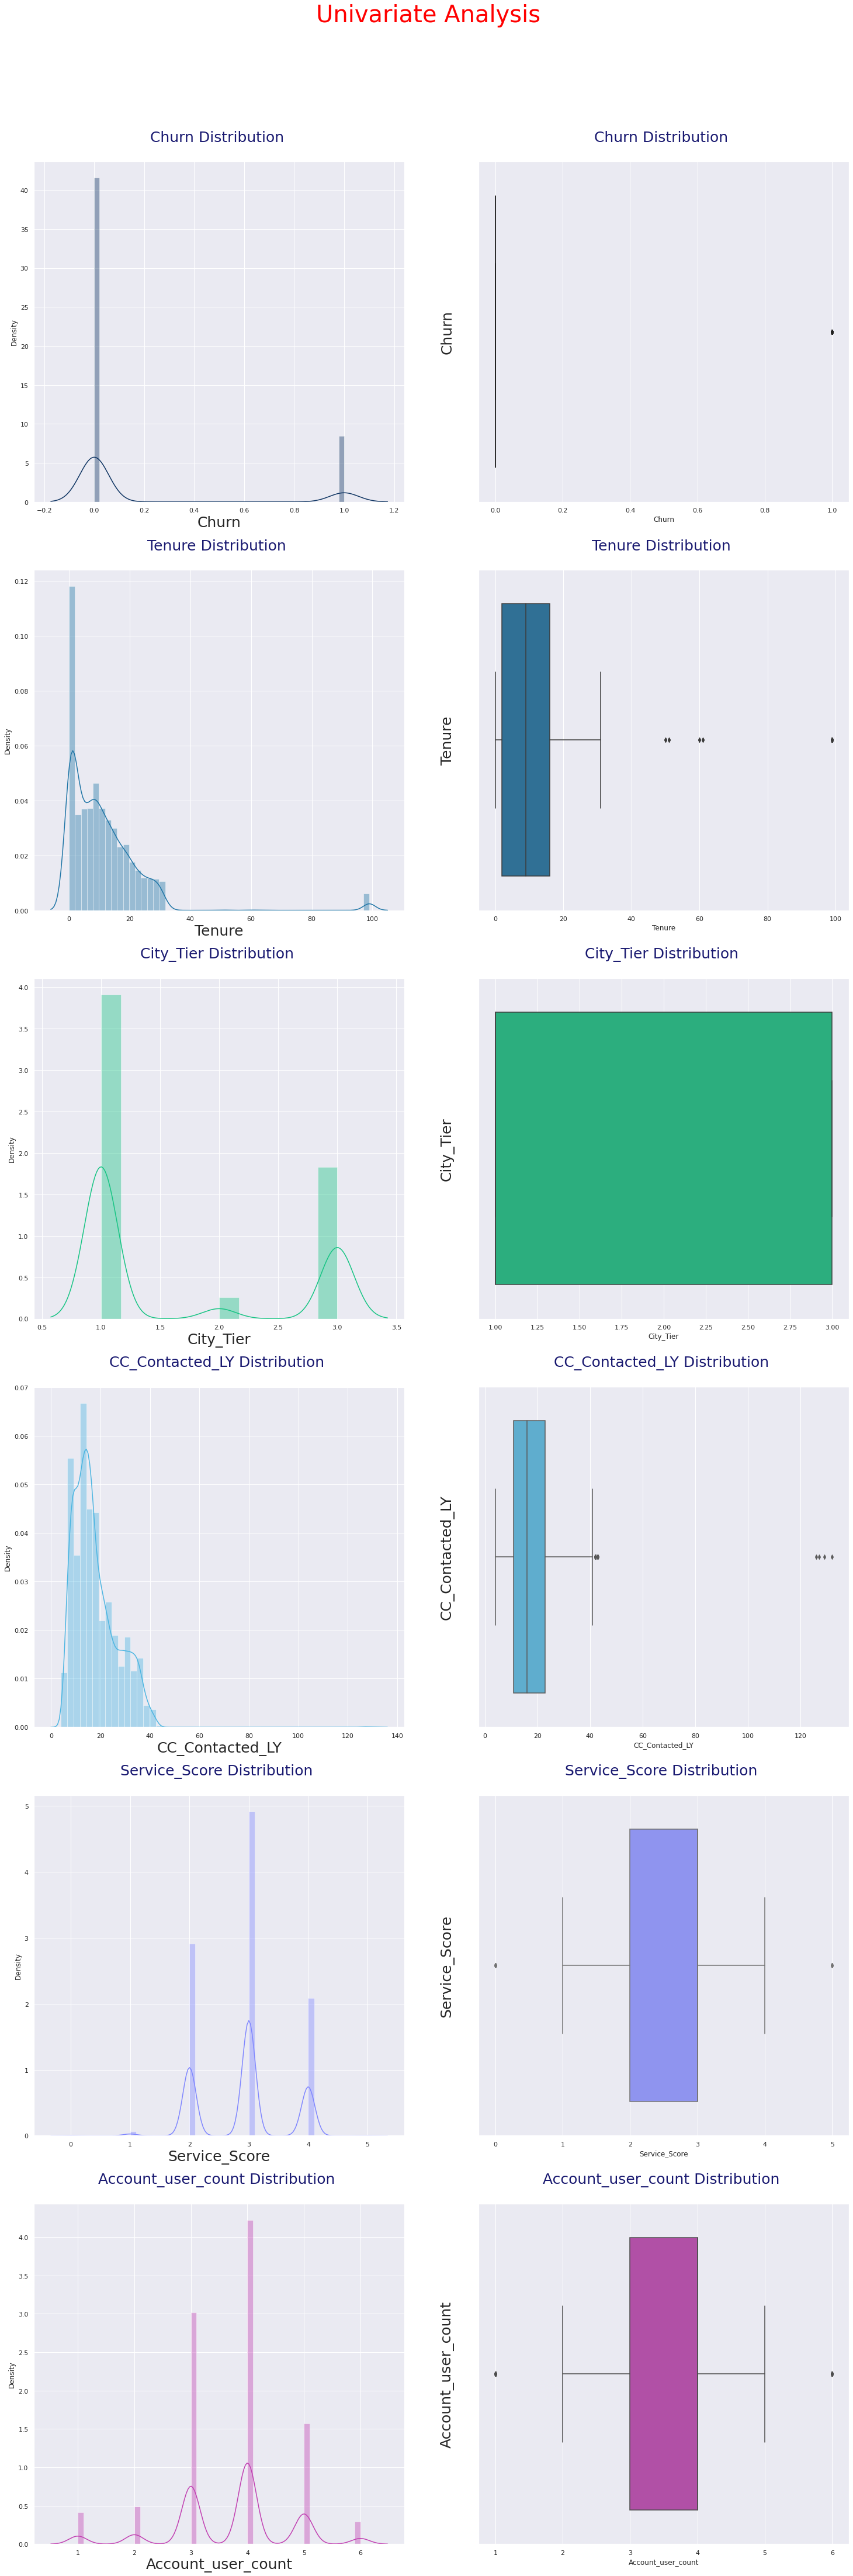

In [444]:
var1=churn.select_dtypes(exclude=['object']).columns
fig, axes = plt.subplots(nrows=6,ncols=2)
n=churn.select_dtypes(exclude=['object']).columns.size
fig.set_size_inches(25, 75);
plt.suptitle('Univariate Analysis',fontsize=40, color='Red',y=0.93);
for i in range(0,6):
    a = sns.distplot(churn[var1].iloc[:,i] , ax=axes[i][0],color=color_list[i]);
    a.set_title(var1[i] + " Distribution \n",fontsize=25,color='#191970');
    a.set_xlabel(var1[i],fontsize=25)
    a = sns.boxplot(churn[var1].iloc[:,i] , orient = "v" , ax=axes[i][1],color=color_list[i]);
    a.set_title(var1[i] + " Distribution \n",fontsize=25,color='#191970');
    a.set_ylabel(var1[i]+'\n',fontsize=25);

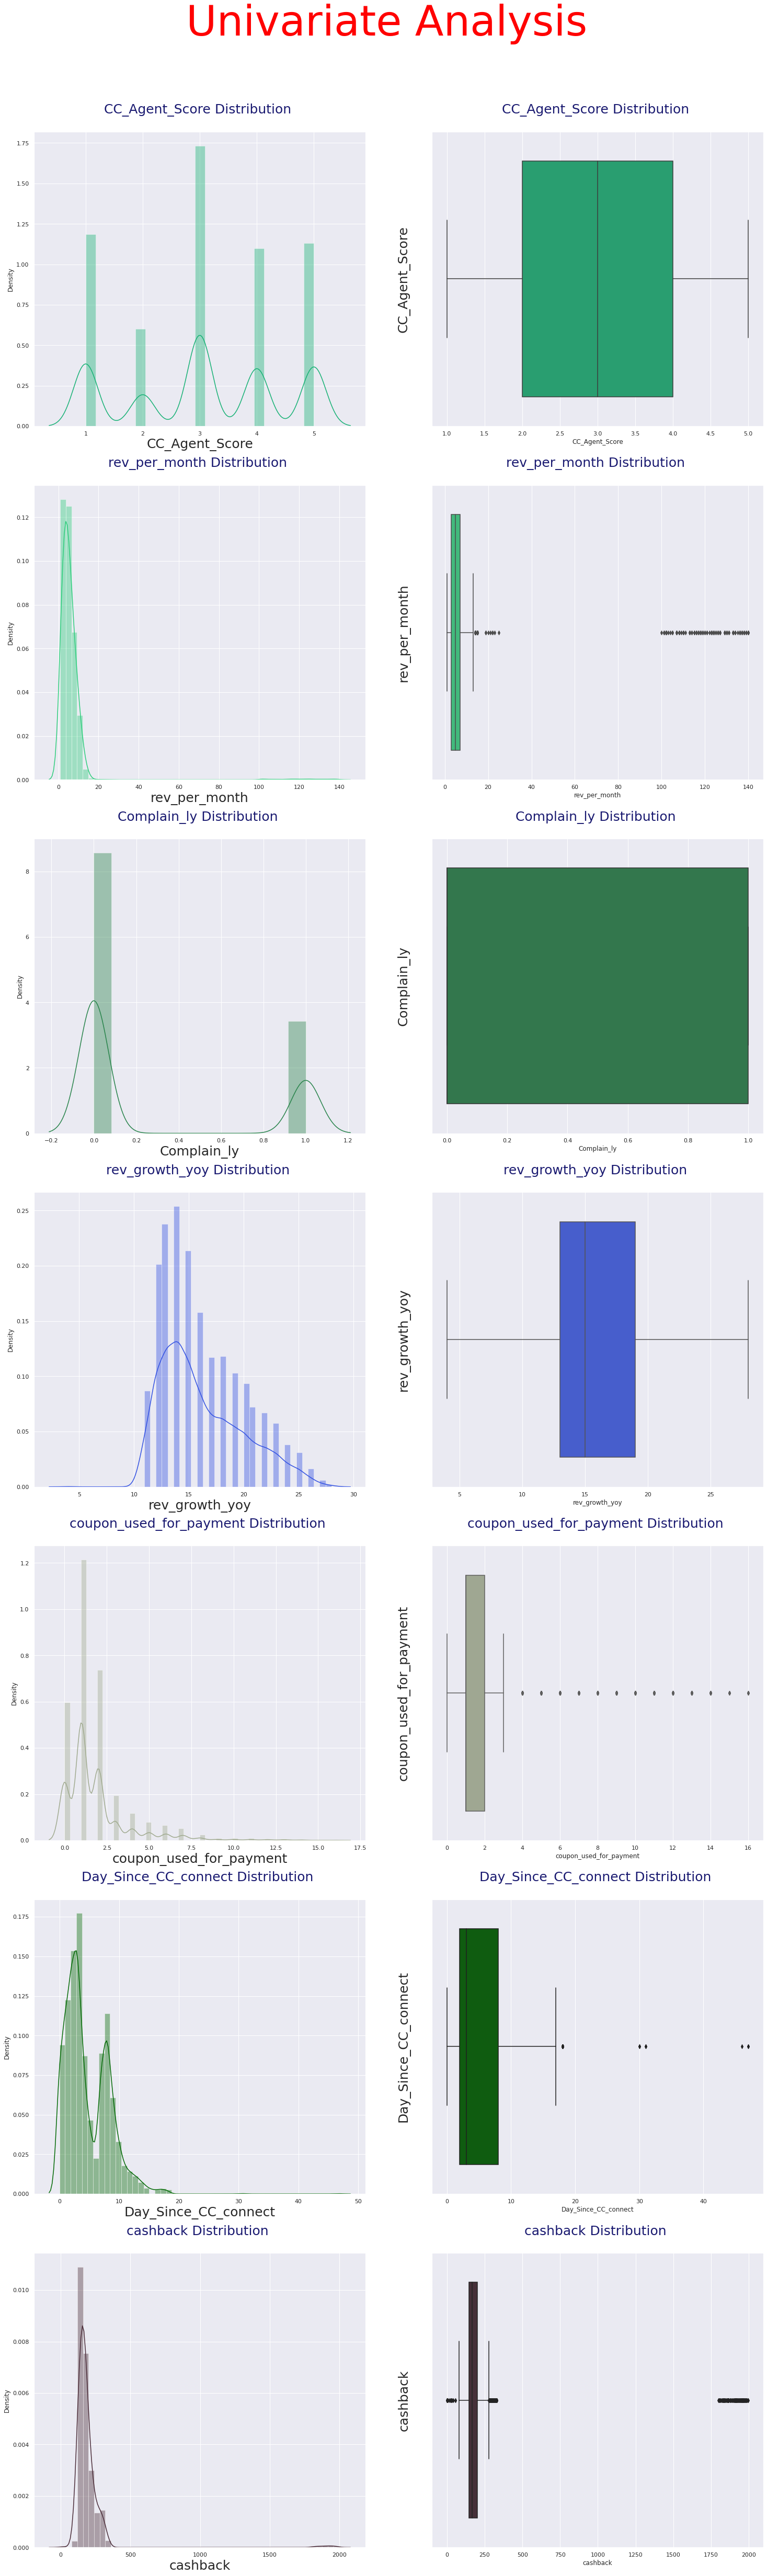

In [445]:
fig, axes = plt.subplots(nrows=7,ncols=2)
fig.set_size_inches(25, 85);
plt.suptitle('Univariate Analysis',fontsize=80, color='Red',y=0.92);
for i in range(6,n):
    a = sns.distplot(churn[var1].iloc[:,i] , ax=axes[i-6][0],color=color_list[i]);
    a.set_title(var1[i] + " Distribution \n",fontsize=25,color='#191970');
    a.set_xlabel(var1[i],fontsize=25);
    a = sns.boxplot(churn[var1].iloc[:,i] , orient = "v" , ax=axes[i-6][1],color=color_list[i]);
    a.set_title(var1[i] + " Distribution \n",fontsize=25,color='#191970');
    a.set_ylabel(var1[i]+"\n",fontsize=25);

In [446]:
churn.skew()

Churn                      1.772606
Tenure                     3.895707
City_Tier                  0.737107
CC_Contacted_LY            1.422977
Service_Score              0.003891
Account_user_count        -0.393100
CC_Agent_Score            -0.142149
rev_per_month              9.093909
Complain_ly                0.950876
rev_growth_yoy             0.752474
coupon_used_for_payment    2.575199
Day_Since_CC_connect       1.273021
cashback                   8.770766
dtype: float64

### <font color = "Sky Blue"> ** We observe from the plots that the variables 'Tenure', ,'CC_Contacted_LY', 'Service_Score','Account_user_count', 'rev_per_month','rev_growth_yoy', coupon_used_for_payment', 'Day_Since_CC_connect','cashback' have outliers

### <font color = "Sky Blue"> ** Also the data in case of all variables are skewed, in either direction

### <font color = "Sky Blue"> ** Data in its original form may not follow normal distribution


####   <font color='Blue'><b> Multi  - Variate Analysis:

In [447]:
# Check for correlation of variable
churn.corr(method='pearson')

Churn    Tenure  City_Tier  CC_Contacted_LY  \
Churn                    1.000000 -0.233150   0.084135         0.072071   
Tenure                  -0.233150  1.000000  -0.030223        -0.004261   
City_Tier                0.084135 -0.030223   1.000000         0.011835   
CC_Contacted_LY          0.072071 -0.004261   0.011835         1.000000   
Service_Score            0.008991  0.009608  -0.006443         0.060052   
Account_user_count       0.107292 -0.004052   0.025498         0.020351   
CC_Agent_Score           0.105796 -0.020031  -0.011479        -0.000209   
rev_per_month            0.022538  0.028431  -0.028521         0.015675   
Complain_ly              0.251488 -0.021419   0.002478         0.027244   
rev_growth_yoy          -0.013877  0.018824  -0.030025         0.072913   
coupon_used_for_payment -0.014826  0.089171   0.021124         0.004969   
Day_Since_CC_connect    -0.147956  0.122612   0.023158         0.012938   
cashback                -0.032382  0.078416   0.010516         0.002679   

                         Service_Score  Account_user_count  CC_Agent_Score  \
Churn                         0.008991            0.107292        0.105796   
Tenure                        0.009608           -0.004052       -0.020031   
City_Tier                    -0.006443            0.025498       -0.011479   
CC_Contacted_LY               0.060052            0.020351       -0.000209   
Service_Score                 1.000000            0.323327        0.032135   
Account_user_count            0.323327            1.000000       -0.017522   
CC_Agent_Score                0.032135           -0.017522        1.000000   
rev_per_month                 0.026691            0.020600        0.022167   
Complain_ly                   0.002643            0.003411       -0.031459   
rev_growth_yoy                0.103374            0.067616       -0.027159   
coupon_used_for_payment       0.181914            0.146081        0.030661   
Day_Since_CC_connect          0.099770            0.037573        0.030808   
cashback                      0.042961            0.037057       -0.012599   

                         rev_per_month  Complain_ly  rev_growth_yoy  \
Churn                         0.022538     0.251488       -0.013877   
Tenure                        0.028431    -0.021419        0.018824   
City_Tier                    -0.028521     0.002478       -0.030025   
CC_Contacted_LY               0.015675     0.027244        0.072913   
Service_Score                 0.026691     0.002643        0.103374   
Account_user_count            0.020600     0.003411        0.067616   
CC_Agent_Score                0.022167    -0.031459       -0.027159   
rev_per_month                 1.000000    -0.002262        0.024114   
Complain_ly                  -0.002262     1.000000       -0.005122   
rev_growth_yoy                0.024114    -0.005122        1.000000   
coupon_used_for_payment       0.016548    -0.007023        0.018341   
Day_Since_CC_connect         -0.000923    -0.041111        0.002206   
cashback                      0.002974     0.008734       -0.001157   

                         coupon_used_for_payment  Day_Since_CC_connect  \
Churn                                  -0.014826             -0.147956   
Tenure                                  0.089171              0.122612   
City_Tier                               0.021124              0.023158   
CC_Contacted_LY                         0.004969              0.012938   
Service_Score                           0.181914              0.099770   
Account_user_count                      0.146081              0.037573   
CC_Agent_Score                          0.030661              0.030808   
rev_per_month                           0.016548             -0.000923   
Complain_ly                            -0.007023             -0.041111   
rev_growth_yoy                          0.018341              0.002206   
coupon_used_for_payment                 1.000000              0.361735   
D

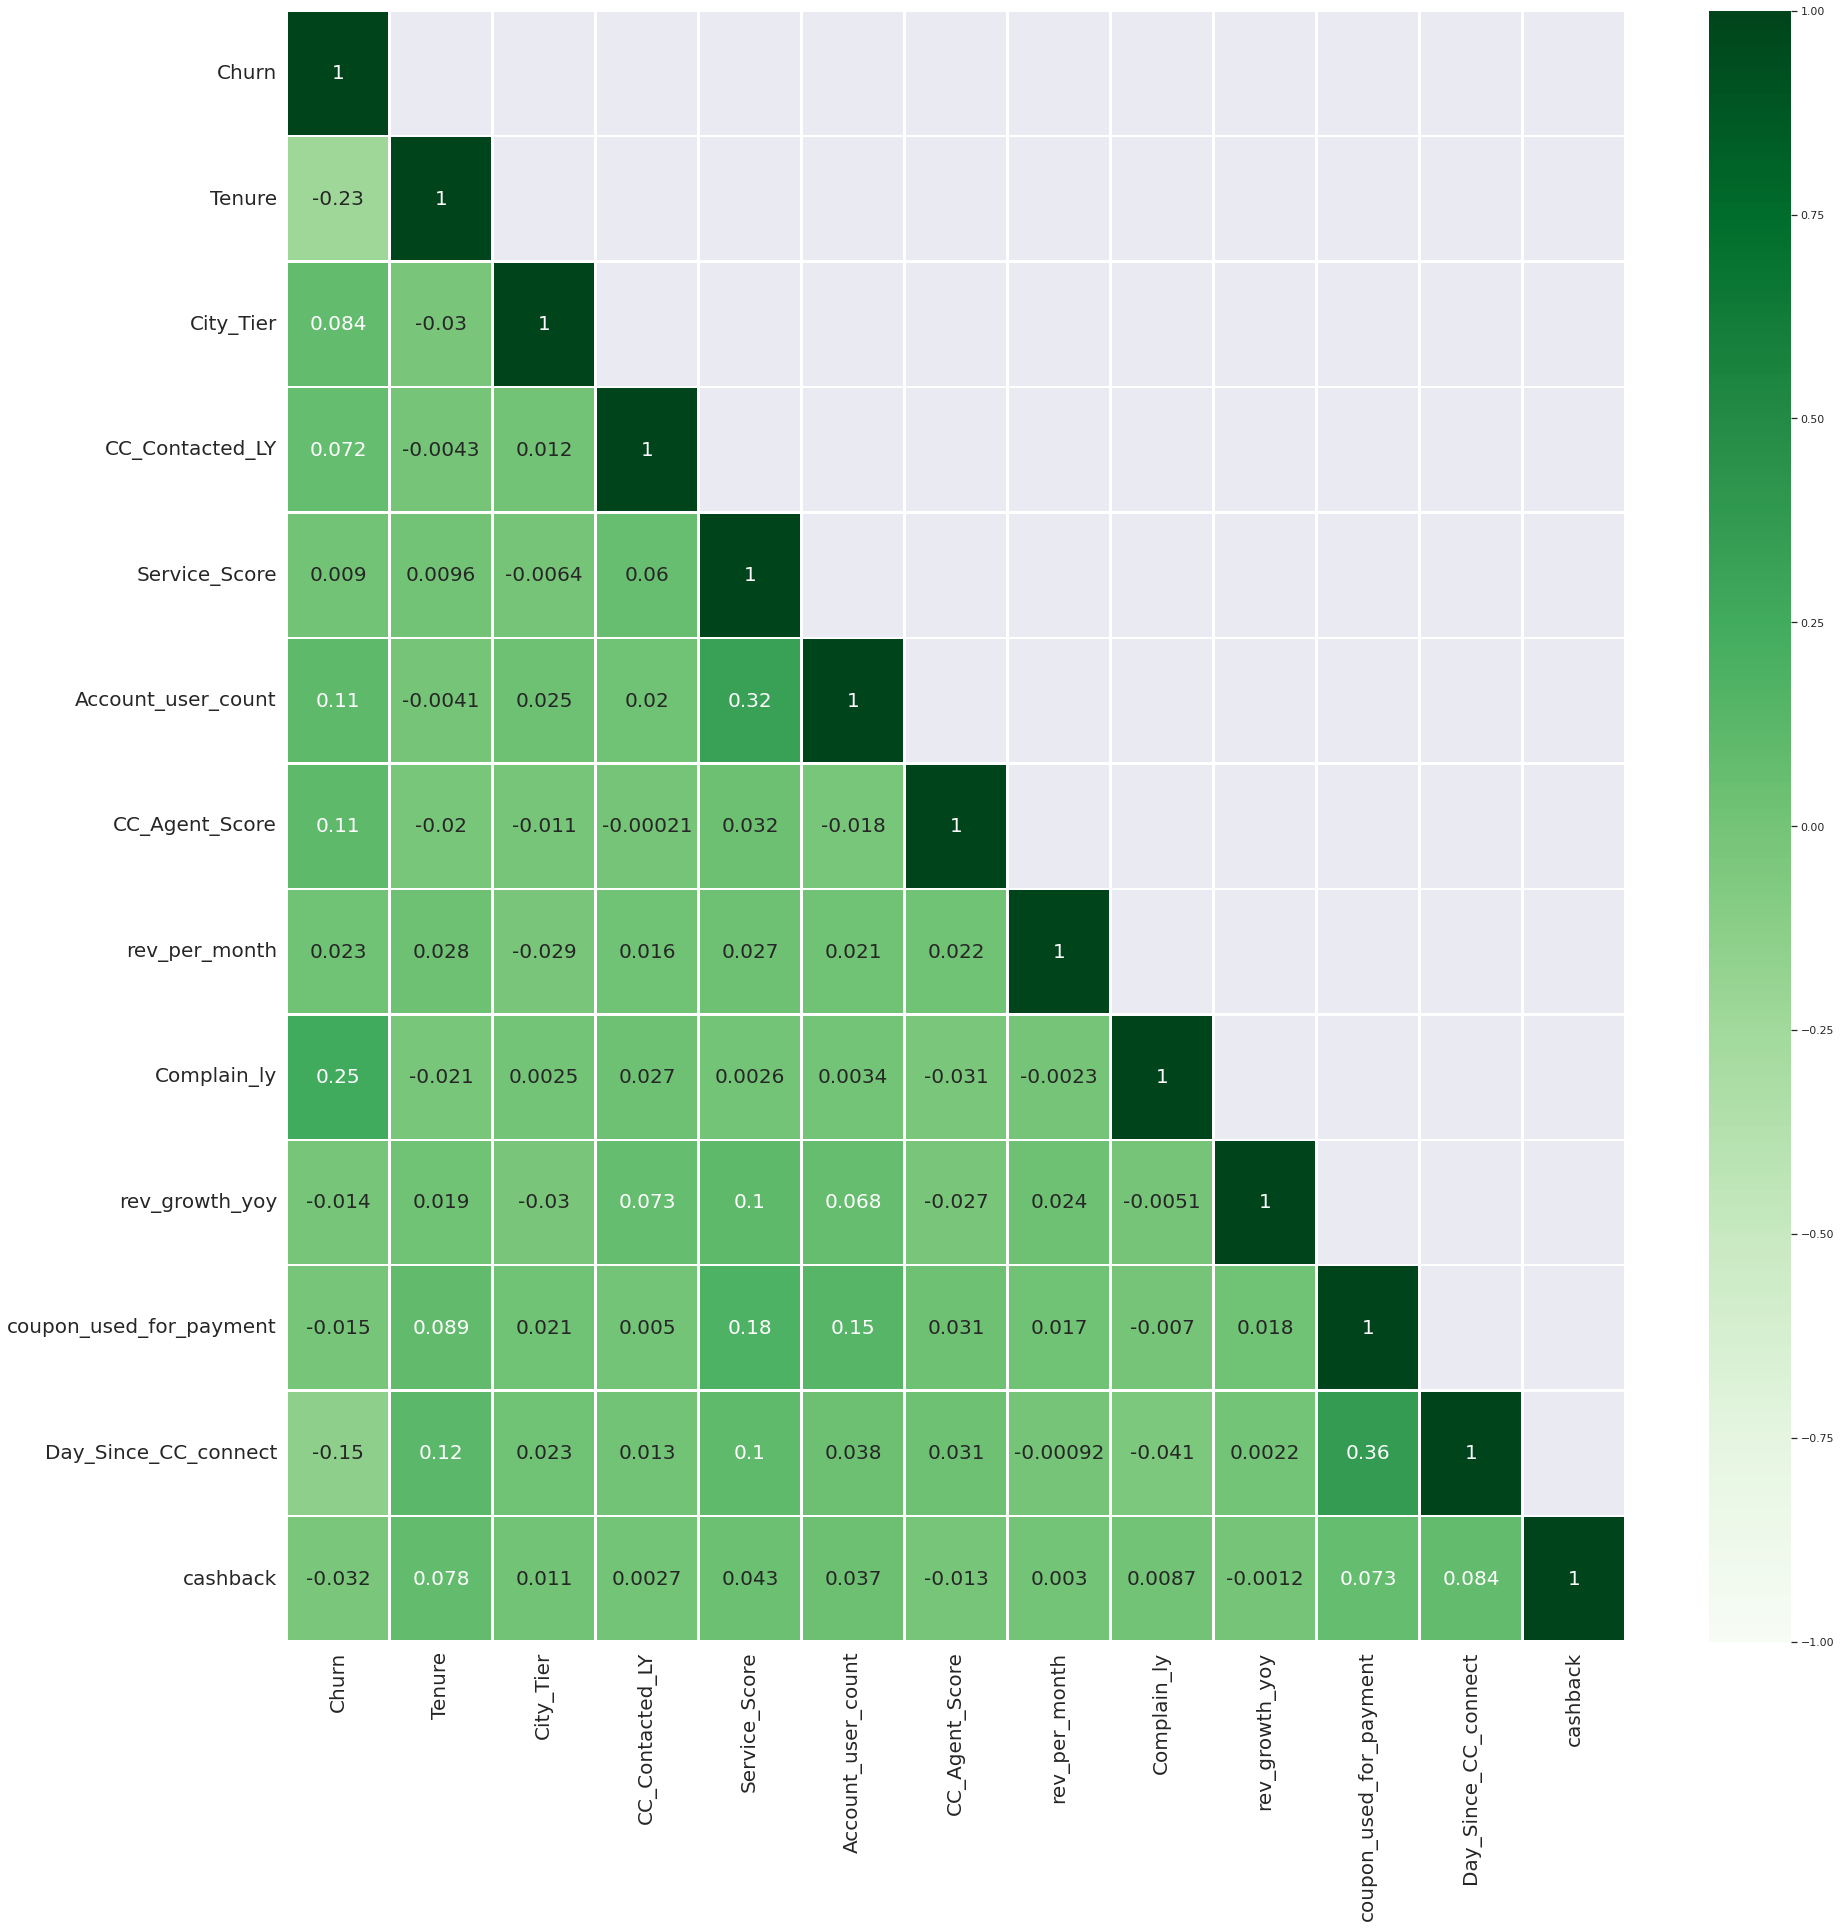

In [448]:
cor = churn.corr()
mask = np.array(cor)
mask[np.tril_indices_from(mask)] = False
plt.subplots(figsize=(30,30))
sns.set(font_scale=1)
sns.heatmap(cor, mask = mask, annot = True,annot_kws={"size": 20},linewidths=1.5,
            linecolor='white',cmap='Greens', vmin = -1, vmax = 1);
plt.yticks(fontsize="20",va='center');
plt.xticks(fontsize="20",ha='center');

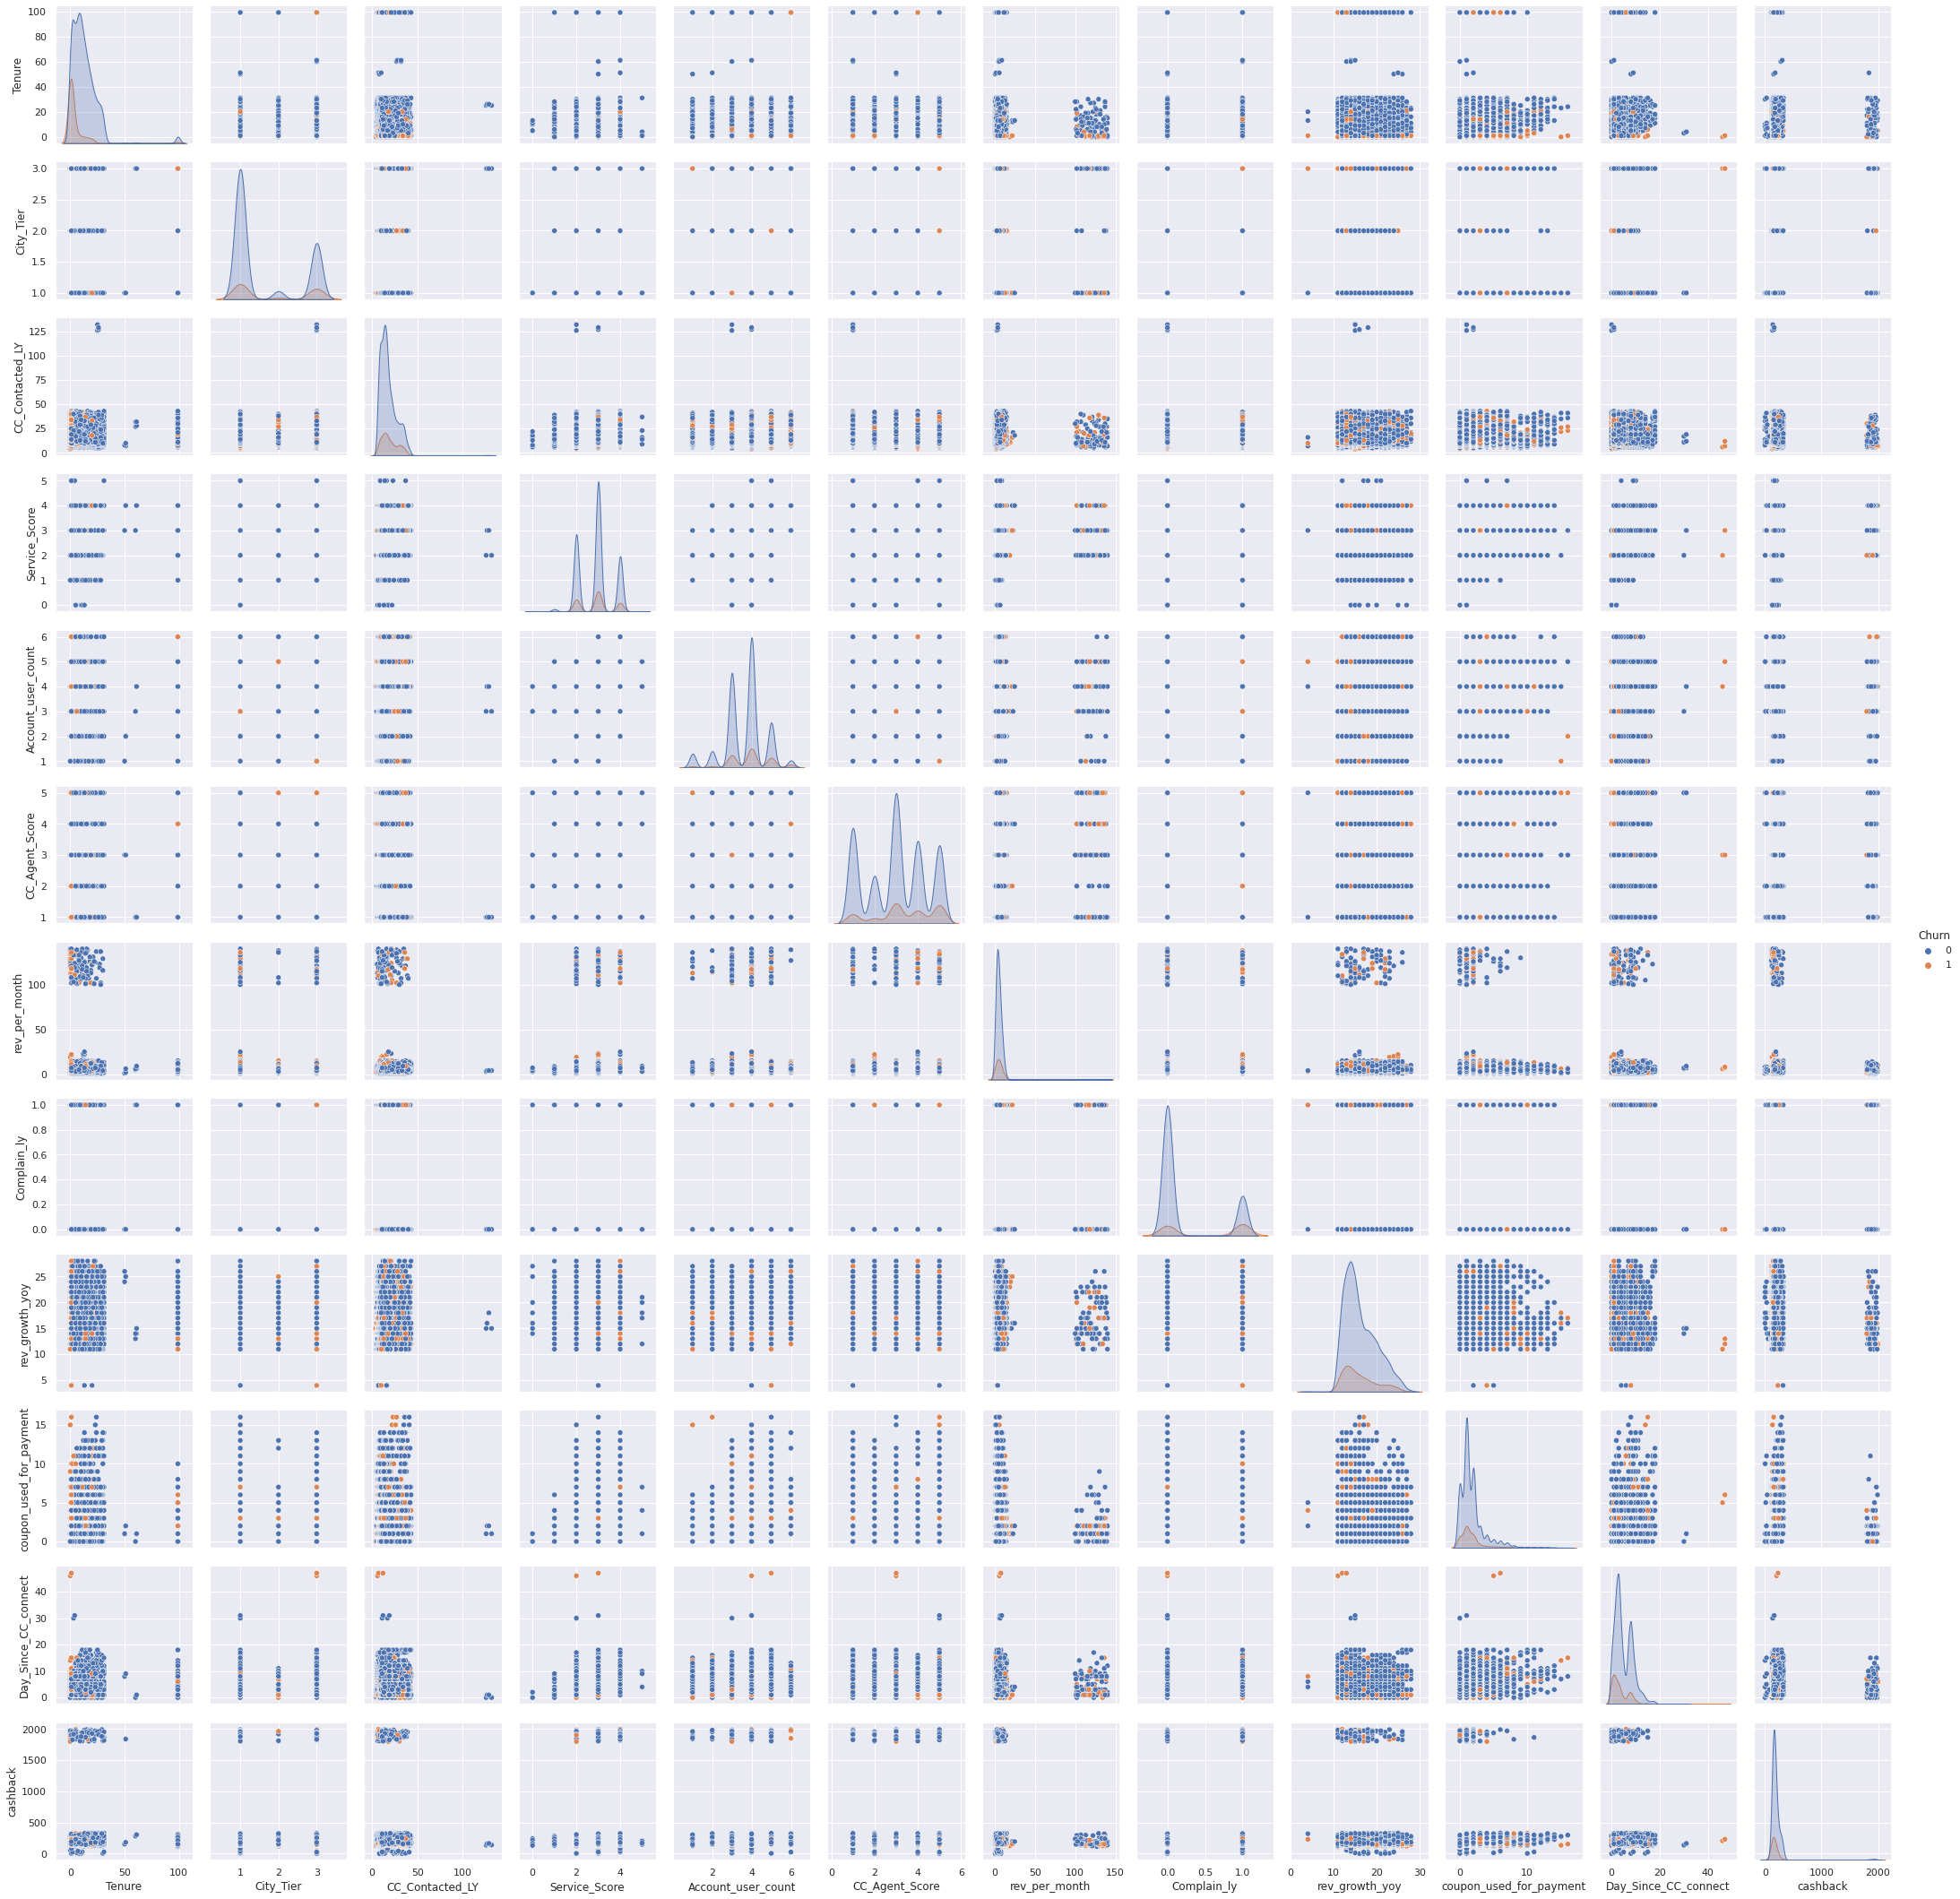

In [449]:
sns.pairplot(churn,hue="Churn", diag_kind='kde',);

### <font color="Green"> ** Independent features among each other shows very less collinearity 




####   <font color='Blue'> <b>Bi- Variate Analysis of Target variable with Independent Features

####   <font color='Red'> <B> Churn vs City_Tier

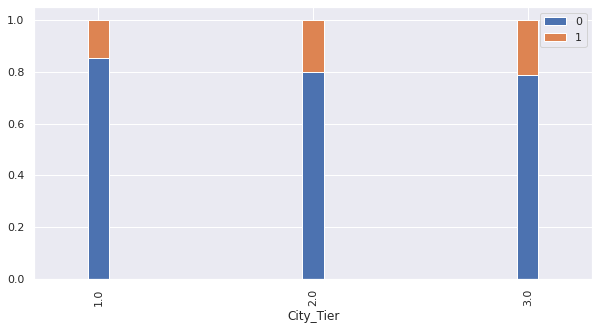

In [450]:
df= churn.groupby('City_Tier')['Churn'].value_counts(normalize=True).unstack('Churn')
df.plot.bar(stacked=True,figsize=(10,5), width=0.1)
plt.legend(loc='upper right');

### <font color="Green"><i>The consumers belonging to Tier 1 cities churns less compared to Tier 2 and Tier 3 cities. The Tier 3 cities show the maximum impact in churn ratio, possibly, due to the lack of infrastructure development and customer service delays and may be preferring the traditional local owned cable operators to DTH connections.

####   <font color='Red'> <B> Churn vs CC_Contacted_LY

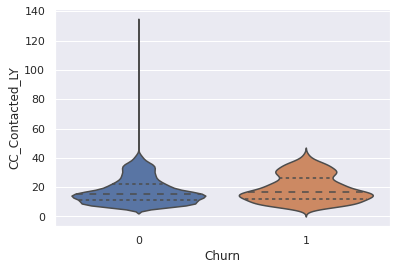

In [451]:
sns.violinplot(churn['Churn'],churn['CC_Contacted_LY'],inner='quartile',scale='width',orient='vertical',scale_hue=True);

### <font color="Green"><i>The consumers who have contacted Customer care in around 35 or more time seems to be churning more. However above feature does not suggest significant difference pattern of churning among customers with those who do not churn

####   <font color='Red'> <B> Churn vs Payment

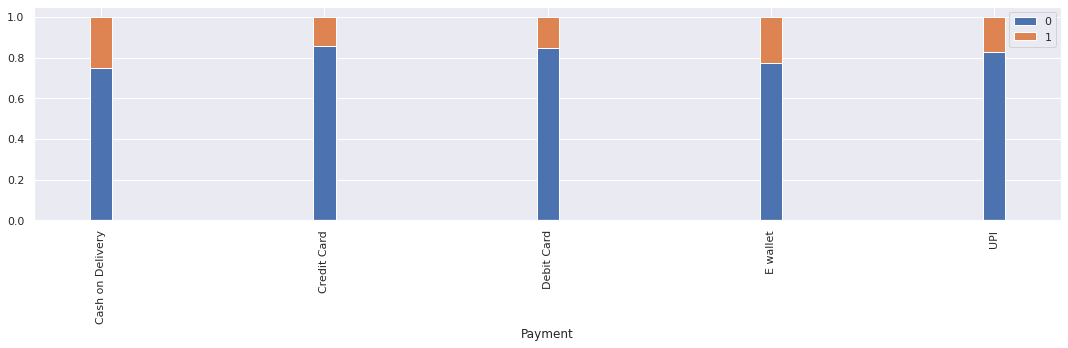

In [452]:
df= churn.groupby('Payment')['Churn'].value_counts(normalize=True).unstack('Churn')
df.plot.bar(stacked=True,figsize=(15,5), width=0.1)
plt.tight_layout()
plt.legend(loc='upper right');

### <font color="Green"><i>The consumers with payment modes ‘Cash On Delivery’ and ‘E wallet’ have churned inflated more than the ones using ‘Credit/Debit Cards’ and ‘UPI’. This signifies that the consumers using ‘Credit/Debit Cards’ and ‘UPI’ have had the privilege of cashback offers and points added post each transactions whereas the other two payment mode does not offer any kind of monetary benefit.

####   <font color='Red'> <B> Churn vs Gender

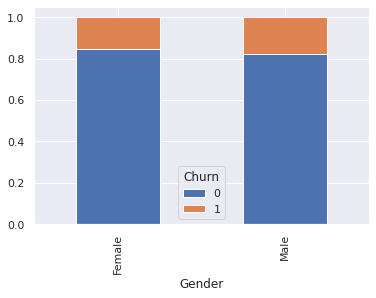

In [453]:
df= churn.groupby('Gender')['Churn'].value_counts(normalize=True).unstack('Churn')
df.plot.bar(stacked=True)

### <font color="Green"><i>There is not much significant difference in percentage of churning customers among both the genders.

####   <font color='Red'> <B> Churn vs Service_Score

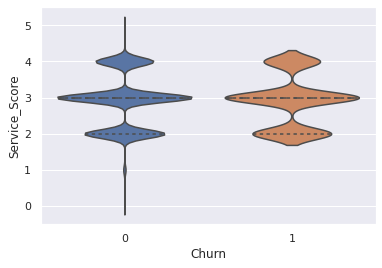

In [454]:
sns.violinplot(churn['Churn'],churn['Service_Score'],inner='quartile',scale='width',orient='vertical',scale_hue=True);

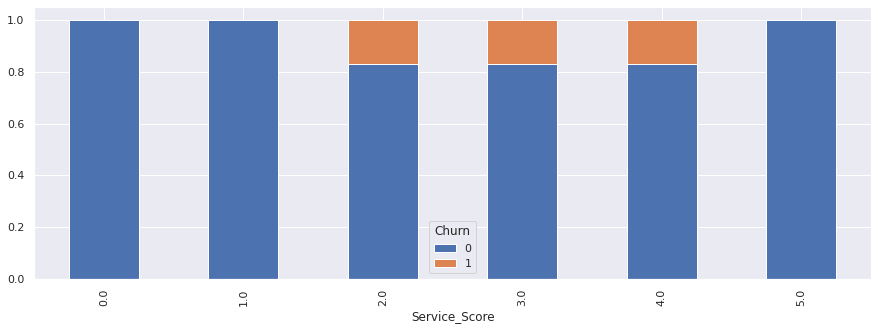

In [455]:
df= churn.groupby('Service_Score')['Churn'].value_counts(normalize=True).unstack('Churn')
df.plot.bar(stacked=True,figsize=(15,5), width=0.5);

### <font color="Green"><i>The consumers who have rated the service score from 2.0 – 4.0 are the ones who are more likely to churn compared to the ones given the lowest rating. The consumers with medium satisfaction rate might have been the ones having high contact ratio and the service score rates have been aggregated.

####   <font color='Red'> <B> Churn vs Account_user_count

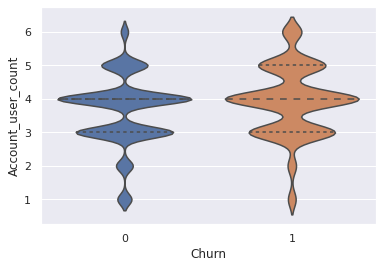

In [456]:
sns.violinplot(churn['Churn'],churn['Account_user_count'],inner='quartile',scale='width',orient='vertical',scale_hue=True);

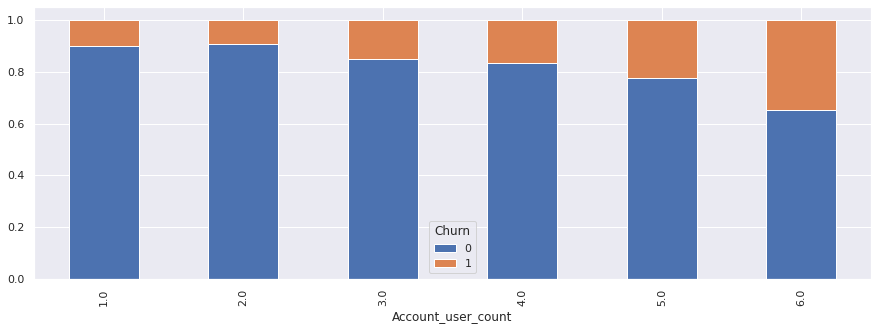

In [457]:
df= churn.groupby('Account_user_count')['Churn'].value_counts(normalize=True).unstack('Churn')
df.plot.bar(stacked=True,figsize=(15,5), width=0.5);

### <font color="Green"><i>The churn proportion can be seen higher in case of 6 users for a single account which indicates that the account might be shared by friends/relatives dividing the monetary expense in return and common scenarios have been observed that shared accounts get dissolved easily due to personal clashes, financial factors and others.

####   <font color='Red'> <B> Churn vs account_segment

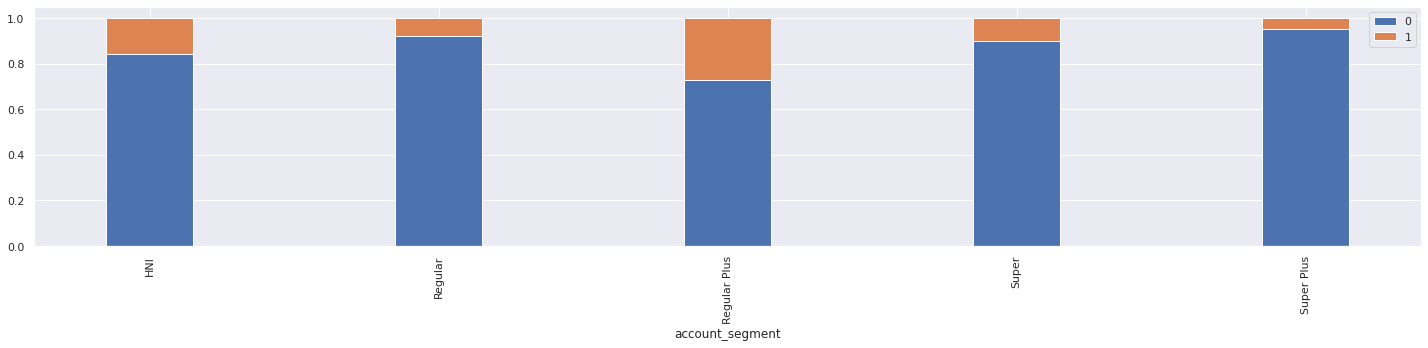

In [458]:
df= churn.groupby('account_segment')['Churn'].value_counts(normalize=True).unstack('Churn')
df.plot.bar(stacked=True,figsize=(20,5), width=0.3)
plt.tight_layout()
plt.legend(loc='upper right');

### <font color="Green"><i>The customers using Regular Plus accounts seem to be churning more among others, possibly due to inadequate feature when compared to premiums

####   <font color='Red'> <B> Churn vs CC_Agent_Score

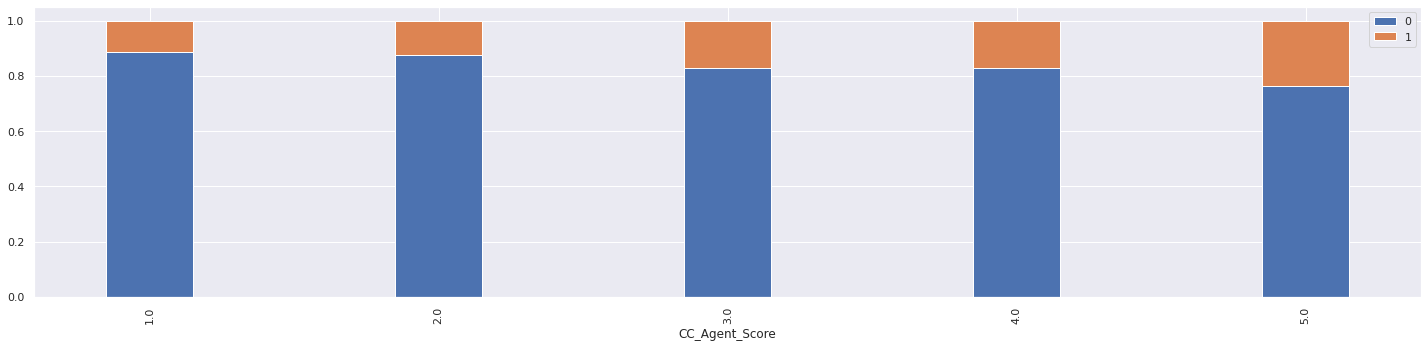

In [459]:
df= churn.groupby('CC_Agent_Score')['Churn'].value_counts(normalize=True).unstack('Churn')
df.plot.bar(stacked=True,figsize=(20,5), width=0.3)
plt.tight_layout()
plt.legend(loc='upper right');

### <font color="Green"><i>

####   <font color='Red'> <B> Churn vs Account_user_count

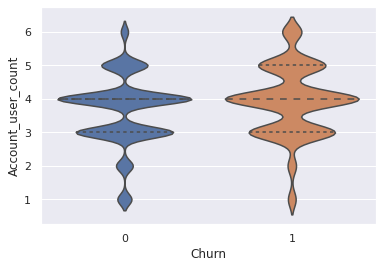

In [460]:
sns.violinplot(churn['Churn'],churn['Account_user_count'],inner='quartile',scale='width',orient='vertical',scale_hue=True)

####   <font color='Red'> <B> Churn vs Marital_Status

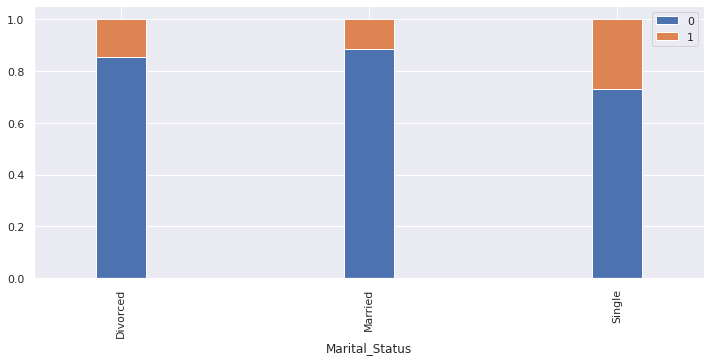

In [461]:
df= churn.groupby('Marital_Status')['Churn'].value_counts(normalize=True).unstack('Churn')
df.plot.bar(stacked=True,figsize=(12,5), width=0.2)
plt.legend(loc="Upper Right")

### <font color="Green"><i>The consumers belonging to the ‘Single’ and ‘Divorced’ category of marital status have churned more compared to the married consumers. The ratio of churning is sky-high in single consumers, perhaps, due to the fact that this segment is inclining more towards OTT platforms rather than relying on DTH.

####   <font color='Red'> <B> Churn vs rev_per_month

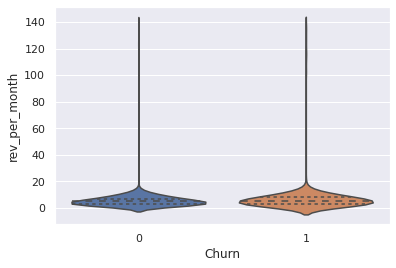

In [462]:
sns.violinplot(churn['Churn'],churn['rev_per_month'],inner='quartile',scale='width',orient='vertical',scale_hue=True);


### <font color="Green"><i>The revenue generated per month does not indicate significant pattern among churners and non-churners

####   <font color='Red'> <B> Churn vs Complain_ly

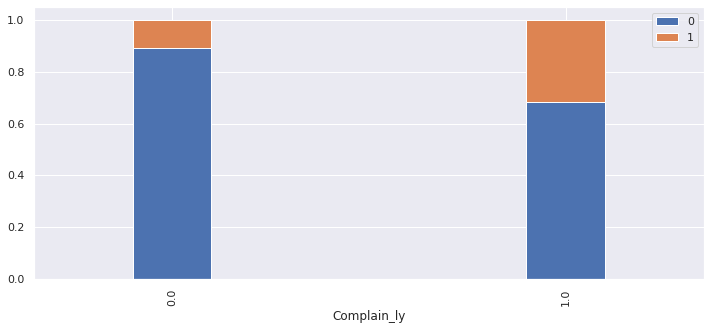

In [463]:
df= churn.groupby('Complain_ly')['Churn'].value_counts(normalize=True).unstack('Churn')
df.plot.bar(stacked=True,figsize=(12,5), width=0.2)
plt.legend(loc="Upper Right")

### <font color="Green"><i>The customers with complaints registered have churned significantly more rather than the ones who have never registered any

####   <font color='Red'> <B> Churn vs rev_growth_yoy

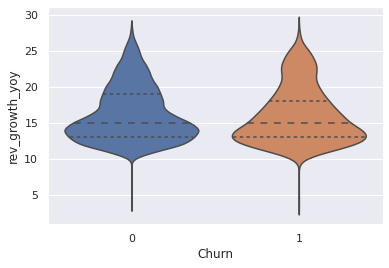

In [464]:
sns.violinplot(churn['Churn'],churn['rev_growth_yoy'],inner='quartile',scale='width',orient='vertical',scale_hue=True);

### <font color="Green"><i>Percentage of Customers with yearly revenue growth above 23 seems to be churning more. 

####   <font color='Red'> <B> Churn vs coupon_used_for_payment

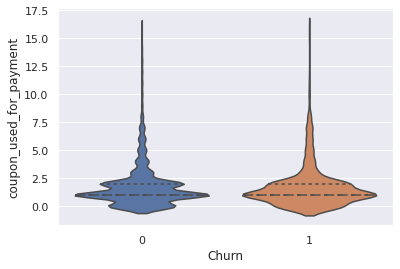

In [465]:
sns.violinplot(churn['Churn'],churn['coupon_used_for_payment'],inner='quartile',scale='width',orient='vertical',scale_hue=True);

### <font color="Green"><i>Percentage of Customers using less no of coupons seems to be churning more.

####   <font color='Red'> <B> Churn vs Day_Since_CC_connect

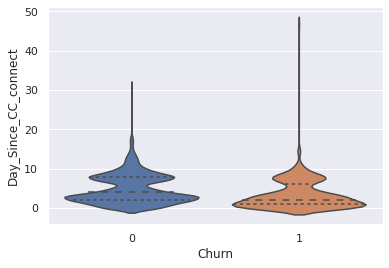

In [466]:
sns.violinplot(churn['Churn'],churn['Day_Since_CC_connect'],inner='quartile',scale='width',orient='vertical',scale_hue=True);

### <font color="Green"><i>Customers who have not contacted with Customer care for longer period seems to be churning more compared to those with frequent connects.

####   <font color='Red'> <B> Churn vs cashback

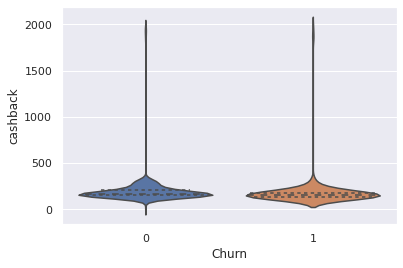

In [467]:
sns.violinplot(churn['Churn'],churn['cashback'],inner='quartile',scale='width',orient='vertical',scale_hue=True);

####   <font color='Red'> <B> Churn vs Login_device

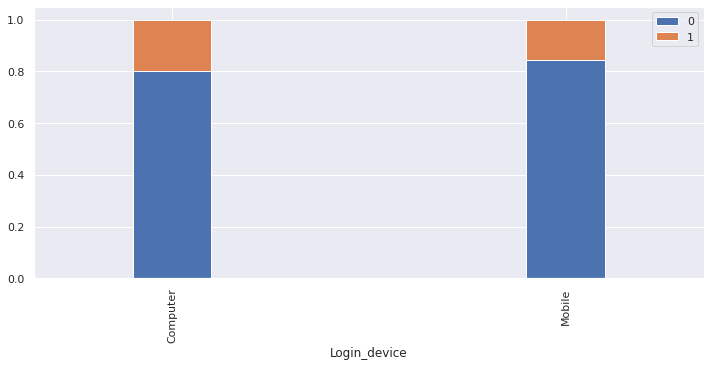

In [468]:
df= churn.groupby('Login_device')['Churn'].value_counts(normalize=True).unstack('Churn')
df.plot.bar(stacked=True,figsize=(12,5), width=0.2)
plt.legend(loc="Upper Right")

### <font color="Green"><i>The consumers having logged in via mobile have churned less as per the graph plotted above. Possibly, due to the company providing services for payment, offers, product, customer care assistance solutions in form of an app

### <font color="Green"><i>

####   <font color='Blue'> <B> Downloading above cleaned Dataframe for Clustering Purpose to classify customers into various segments

In [469]:
churn.to_csv('Churn For Clustering.csv', index = False)

In [470]:
files.download('Churn For Clustering.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [471]:
# Data Models in Python can take only numerical / categorical colums. It cannot take string / object types. 
# Converting object variables into numerical datatypes
for feature in churn.columns: 
    if churn[feature].dtype == 'object': 
        churn[feature] = pd.Categorical(churn[feature]).codes

In [472]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11042 non-null  float64
 2   City_Tier                11148 non-null  float64
 3   CC_Contacted_LY          11158 non-null  float64
 4   Payment                  11260 non-null  int8   
 5   Gender                   11260 non-null  int8   
 6   Service_Score            11162 non-null  float64
 7   Account_user_count       10816 non-null  float64
 8   account_segment          11260 non-null  int8   
 9   CC_Agent_Score           11144 non-null  float64
 10  Marital_Status           11260 non-null  int8   
 11  rev_per_month            10469 non-null  float64
 12  Complain_ly              10903 non-null  float64
 13  rev_growth_yoy           11257 non-null  float64
 14  coupon_used_for_paymen

####   <font color='Blue'> <B>Proportion in the Target classes

In [473]:
churn.Churn.value_counts(normalize=True)

0    0.831616
1    0.168384
Name: Churn, dtype: float64

### <font color = "Red">  Split into Train-Test Data

In [474]:
X=churn.drop(['Churn'],axis=1)
Y=churn.Churn 

In [475]:
X.head()

Tenure  City_Tier  CC_Contacted_LY  Payment  Gender  Service_Score  \
0     4.0        3.0              6.0        2       0            3.0   
1     0.0        1.0              8.0        4       1            3.0   
2     0.0        1.0             30.0        2       1            2.0   
3     0.0        3.0             15.0        2       1            2.0   
4     0.0        1.0             12.0        1       1            2.0   

   Account_user_count  account_segment  CC_Agent_Score  Marital_Status  \
0                 3.0                3             2.0               2   
1                 4.0                2             3.0               2   
2                 4.0                2             3.0               2   
3                 4.0                3             5.0               2   
4                 3.0                2             5.0               2   

   rev_per_month  Complain_ly  rev_growth_yoy  coupon_used_for_payment  \
0            9.0          1.0            11.0                      1.0   
1            7.0          1.0            15.0                      0.0   
2            6.0          1.0            14.0                      0.0   
3            8.0          0.0            23.0                      0.0   
4            3.0          0.0            11.0                      1.0   

   Day_Since_CC_connect  cashback  Login_device  
0                   5.0    159.93             1  
1                   0.0    120.90             1  
2                   3.0       NaN             1  
3                   3.0    134.07             1  
4                   3.0    129.60             1

In [476]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Churn, dtype: int64

In [477]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=1,test_size=0.30)

## Checking the dimensions of the training and test data

In [478]:
print('x_train',x_train.shape)
print('x_test',x_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

x_train (7882, 17)
x_test (3378, 17)
y_train (7882,)
y_test (3378,)


In [479]:
x_train_treated=x_train.copy()
x_test_treated=x_test.copy()

### <font color = "Blue"><b>Missing Value treatment 

#### <font color = "Red"><b> KNN Imputation Method to impute missing values 

In [480]:
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=3)

In [481]:
cols=x_train_treated.columns

In [482]:
x_train_treated2=pd.DataFrame(np.round(imputer.fit_transform(x_train_treated),0),columns=cols)


In [483]:
x_train_treated2.head()

Tenure  City_Tier  CC_Contacted_LY  Payment  Gender  Service_Score  \
0    11.0        1.0             22.0     -1.0     1.0            0.0   
1    22.0        3.0             14.0      3.0     1.0            4.0   
2    15.0        1.0             14.0      2.0     1.0            3.0   
3    15.0        1.0             14.0      1.0     0.0            3.0   
4     0.0        1.0             22.0      1.0     0.0            3.0   

   Account_user_count  account_segment  CC_Agent_Score  Marital_Status  \
0                 4.0              3.0             5.0             1.0   
1                 4.0              3.0             5.0             1.0   
2                 3.0              1.0             1.0             1.0   
3                 4.0              3.0             3.0             2.0   
4                 5.0              3.0             4.0             0.0   

   rev_per_month  Complain_ly  rev_growth_yoy  coupon_used_for_payment  \
0            7.0          0.0            15.0                      1.0   
1            6.0          0.0            12.0                      1.0   
2            2.0          0.0            13.0                      5.0   
3            8.0          0.0            15.0                      2.0   
4            6.0          0.0            15.0                      1.0   

   Day_Since_CC_connect  cashback  Login_device  
0                   2.0     164.0          -1.0  
1                   3.0     180.0           1.0  
2                   9.0     284.0           0.0  
3                   2.0     175.0           1.0  
4                   0.0     150.0           1.0

In [484]:
for feature in x_train_treated2.columns:
  print(feature)
  print(x_train_treated2[feature].unique())
  print('\n')

Tenure
[11. 22. 15.  0.  9.  5.  1. 10.  8. 20. 18. 31.  6. 23.  2. 26. 16. 19.
 13. 29. 24. 14. 99.  4. 12.  3. 25.  7. 17. 30. 28. 21. 27. 37. 51. 50.
 61. 38. 60. 42. 36.]


City_Tier
[1. 3. 2.]


CC_Contacted_LY
[ 22.  14.  24.  16.   9.  13.  26.  15.  10.  34.  11.  12.   8.  35.
  19.  17.  23.   6.  18.  29.  20.  32.   7.  21.  28.  40.  30.  36.
  33.  39.  38.  27.  25.  37.  42.  31.  41. 126.   5.  43. 132.]


Payment
[-1.  3.  2.  1.  0.  4.]


Gender
[ 1.  0. -1.]


Service_Score
[0. 4. 3. 1. 2. 5.]


Account_user_count
[4. 3. 5. 6. 2. 1.]


account_segment
[ 3.  1.  0.  2.  4. -1.]


CC_Agent_Score
[5. 1. 3. 4. 2.]


Marital_Status
[ 1.  2.  0. -1.]


rev_per_month
[  7.   6.   2.   8.   3.   5.   9.   1.  10.   4.  12.  11.  13.  25.
 136. 139. 115.  23.  15. 133.  14. 113. 125. 102. 123. 119. 134.  49.
  47. 129. 117. 126. 101. 110. 118. 105. 109. 116. 140. 131. 138. 127.
 114.  38.  40. 107. 124.  20. 137. 103. 104. 120.  45. 108. 130. 135.
 111. 100.  46.]


Complai

In [485]:
x_test_treated2=pd.DataFrame(np.round(imputer.transform(x_test_treated),0),columns=cols)

In [486]:
for feature in x_test_treated2.columns:
  print(feature)
  print(x_test_treated2[feature].unique())
  print('\n')

Tenure
[ 0. 10.  9.  2. 14.  7.  8. 11. 29. 28.  4. 21.  1. 19. 12. 24. 15. 26.
 18. 31. 16.  6.  5. 99.  3. 25. 13. 22. 17. 23. 20. 30. 27.]


City_Tier
[1. 3. 2.]


CC_Contacted_LY
[ 31.  22.  23.  10.  25.  21.  28.  13.  16.  29.   9.  20.  14.  12.
  17.  15.   8.  34.  11.   7.  24.  35.   6.  36.  33.  19.  32.  30.
  27.  26.  37.  18.  40.  38.  39.  42.  41.  43.   5.   4. 127. 129.]


Payment
[ 2.  3.  1.  4.  0. -1.]


Gender
[ 0.  1. -1.]


Service_Score
[2. 4. 3. 1. 5. 0.]


Account_user_count
[1. 3. 5. 2. 4. 6.]


account_segment
[ 2.  3.  0.  4. -1.  1.]


CC_Agent_Score
[2. 5. 4. 1. 3.]


Marital_Status
[ 2.  1.  0. -1.]


rev_per_month
[  2.   5.   6.   4.   3.   8.   9.  11.   7.   1.  10.  12.  15.  13.
 102. 123.  14. 121.  19. 138.  21. 114. 124.  22. 107.  37. 115. 108.
 137. 113.  46.  50. 117. 118.  39. 122.  48. 134. 130. 110.  42.]


Complain_ly
[1. 0.]


rev_growth_yoy
[12. 20. 14. 19. 16. 25. 15. 17. 22. 13. 18. 11. 21. 23. 24. 27. 26. 28.
  4.]


coupon_us

In [487]:
x_train_treated2.isnull().sum()

Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64

In [488]:
x_test_treated2.isnull().sum()

Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64

### <font color= "Blue"> <b> Outlier treatment (if required)

### <font color= "Red"><b> From the unvariate analysis performed below features are Categorical Data mostly of Ordinal Type, hence they do not require Outlier Treatment:
##### <font color= "Green">'Service_Score', 

### <font color= "Red"><b>But Below Features require outlier treatment
##### <font color= "Green">'Tenure',<br>'CC_Contacted_LY',<br>'Account_user_count', <br>'rev_per_month',<br>'rev_growth_yoy', <br>'Day_Since_CC_connect','cashback' <br>coupon_used_for_payment'

In [489]:
out_col=['Tenure','CC_Contacted_LY','Account_user_count','rev_per_month','Day_Since_CC_connect','cashback','coupon_used_for_payment']

(array([1, 2, 3, 4, 5, 6, 7]), <a list of 7 Text major ticklabel objects>)

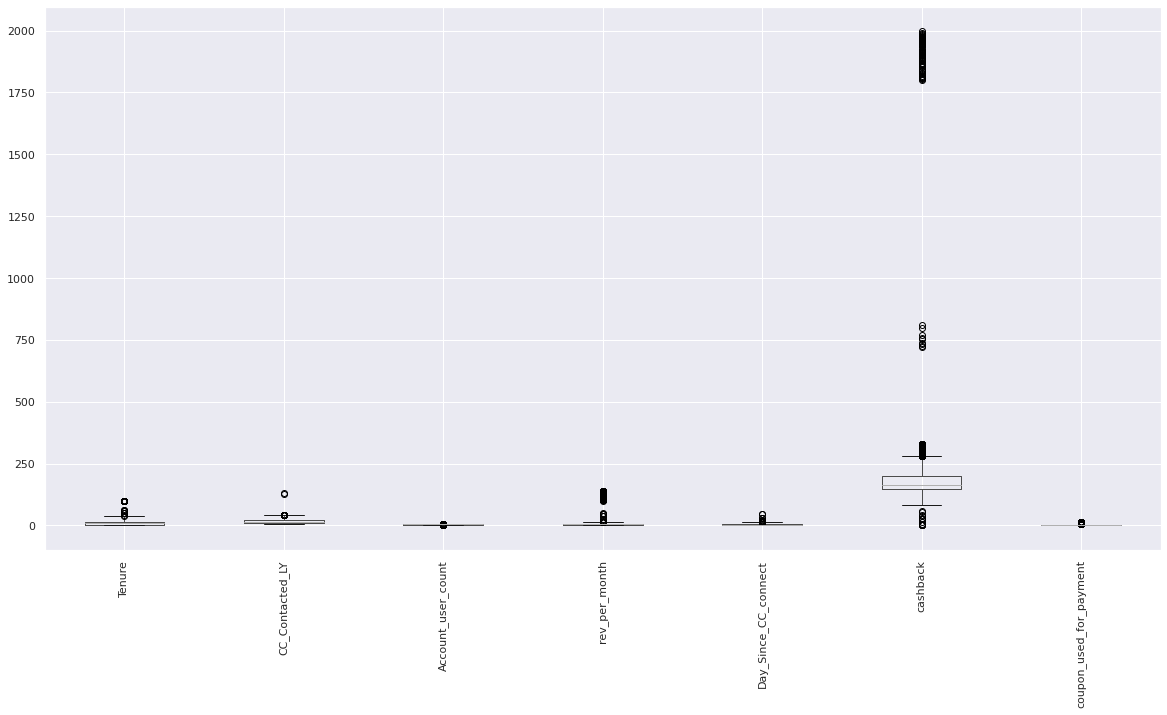

In [490]:
x_train_treated2[out_col].boxplot(figsize=(20,10))
plt.xticks(rotation=90)

(array([1, 2, 3, 4, 5, 6, 7]), <a list of 7 Text major ticklabel objects>)

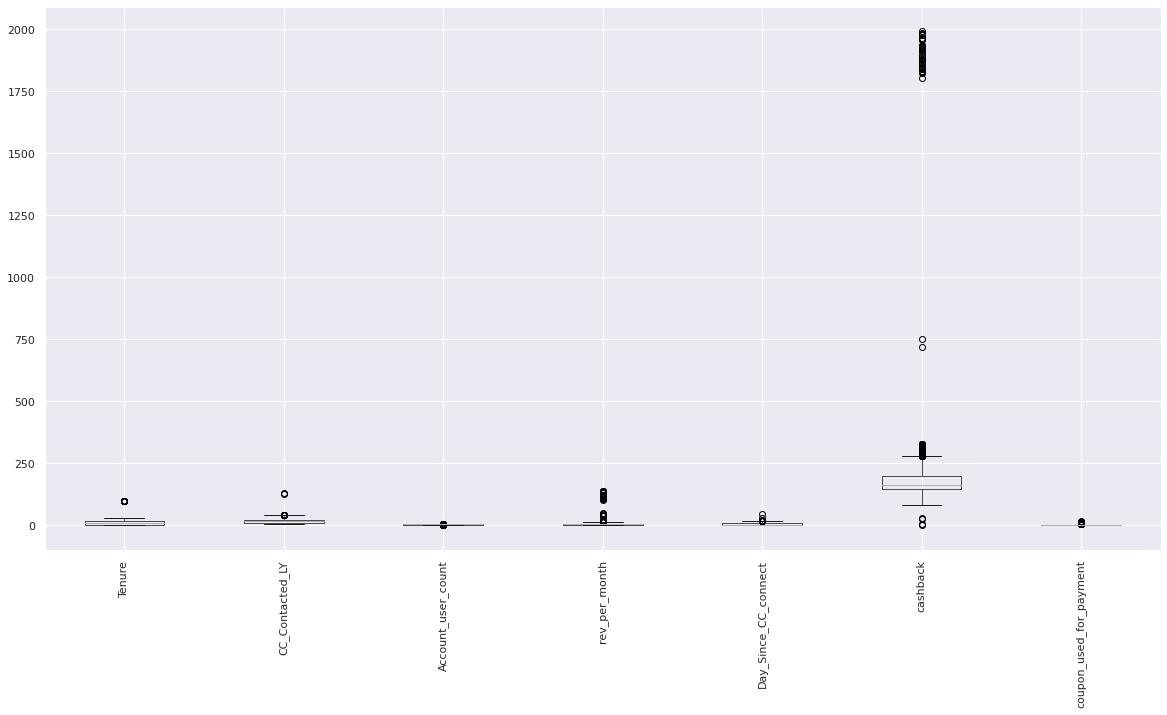

In [491]:
x_test_treated2[out_col].boxplot(figsize=(20,10))
plt.xticks(rotation=90)

In [492]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.nanpercentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [493]:
for i in range(0,len(out_col)):
  lr,ur=remove_outlier(x_train_treated2[out_col[i]])
  x_train_treated2[out_col[i]]=np.where(x_train_treated2[out_col[i]]>ur,ur,x_train_treated2[out_col[i]])
  x_train_treated2[out_col[i]]=np.where(x_train_treated2[out_col[i]]<lr,lr,x_train_treated2[out_col[i]])
  x_test_treated2[out_col[i]]=np.where(x_test_treated2[out_col[i]]>ur,ur,x_test_treated2[out_col[i]])
  x_test_treated2[out_col[i]]=np.where(x_test_treated2[out_col[i]]<lr,lr,x_test_treated2[out_col[i]])

(array([1, 2, 3, 4, 5, 6, 7]), <a list of 7 Text major ticklabel objects>)

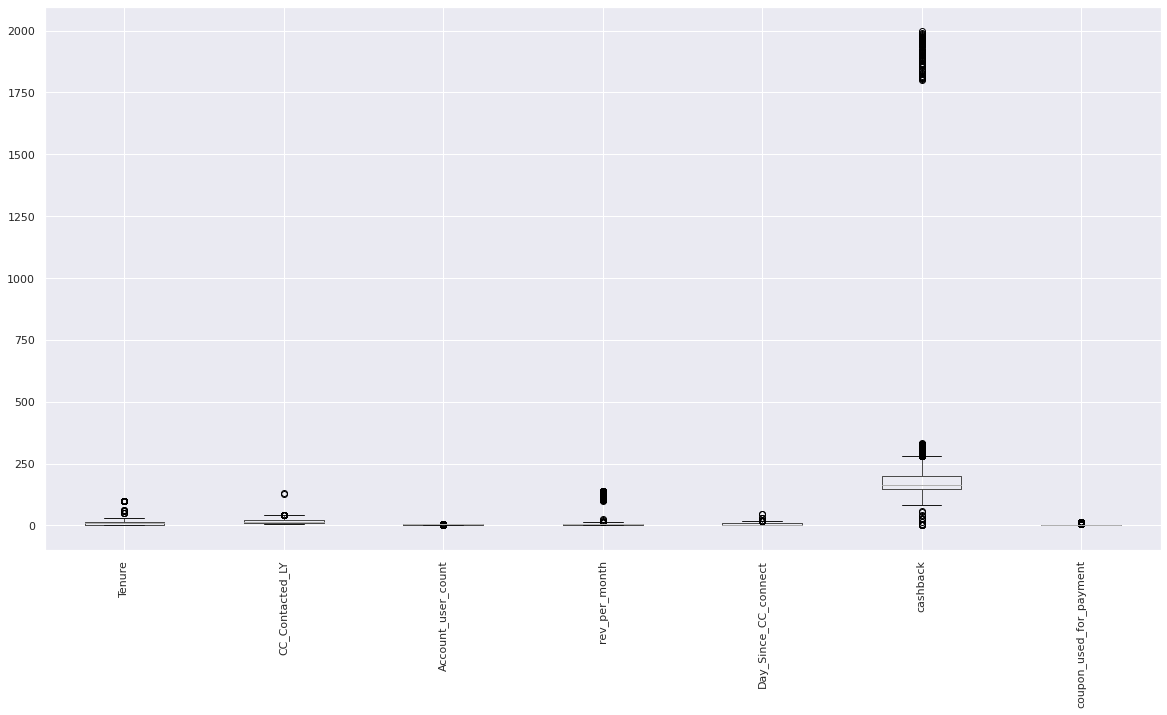

In [494]:
x_train[out_col].boxplot(figsize=(20,10))
plt.xticks(rotation=90)

(array([1, 2, 3, 4, 5, 6, 7]), <a list of 7 Text major ticklabel objects>)

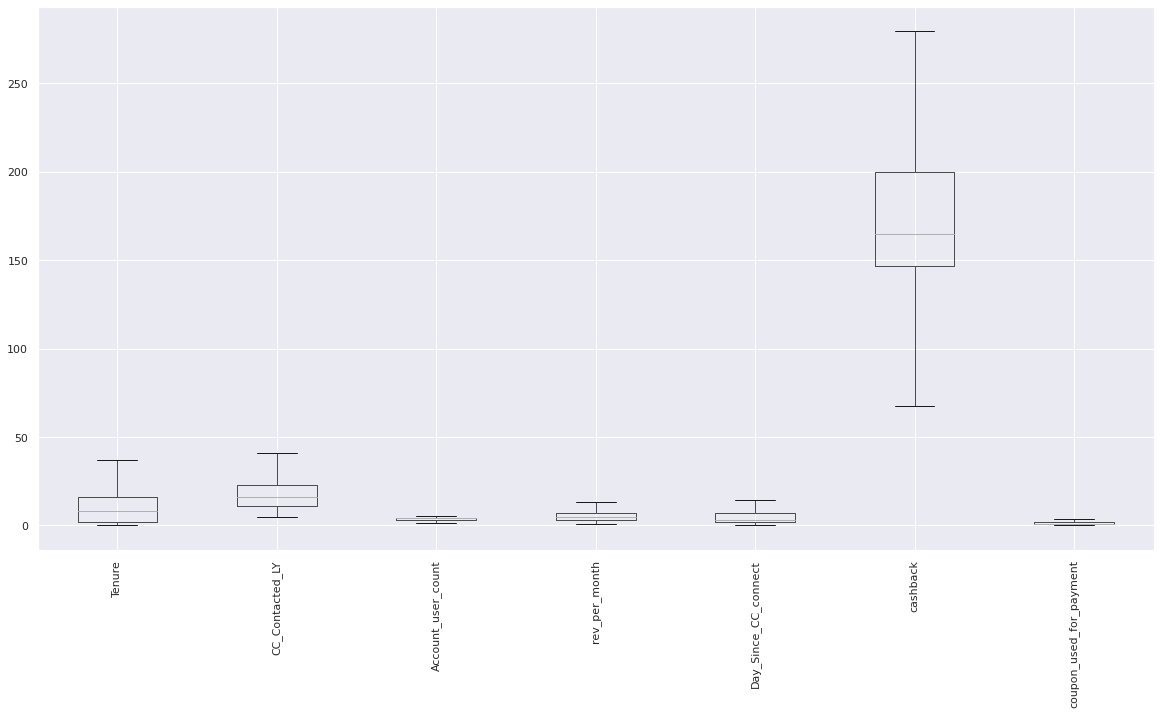

In [495]:
x_train_treated2[out_col].boxplot(figsize=(20,10))
plt.xticks(rotation=90)

(array([1, 2, 3, 4, 5, 6, 7]), <a list of 7 Text major ticklabel objects>)

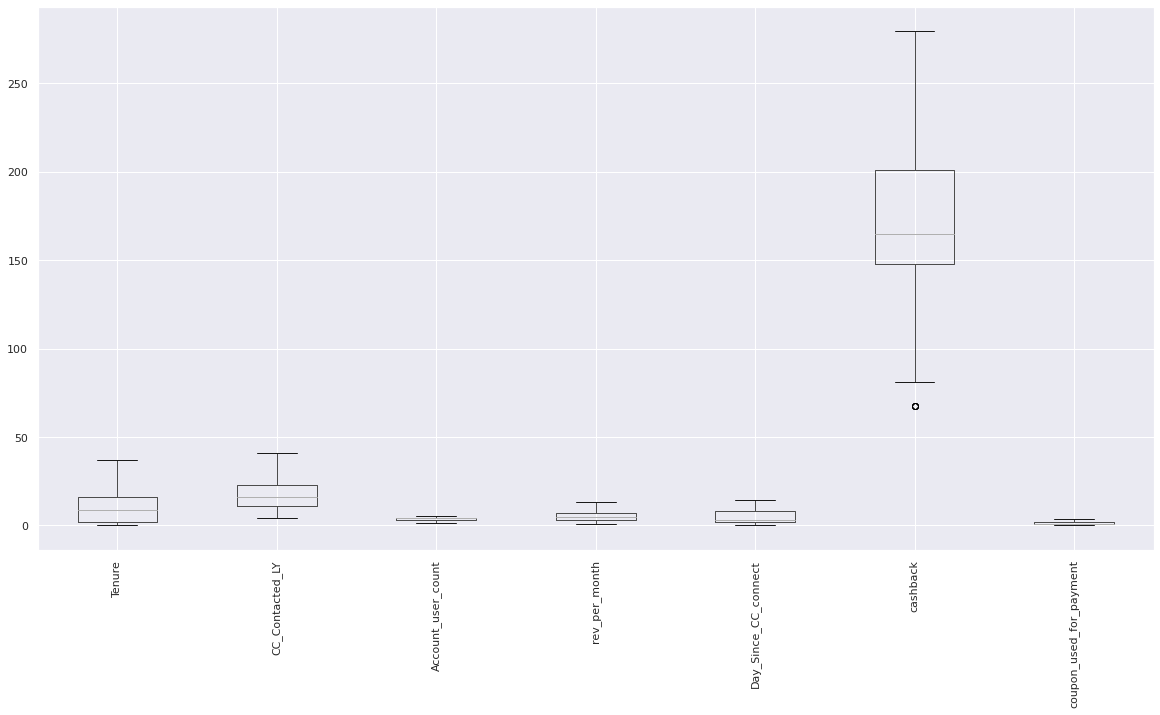

In [496]:
x_test_treated2[out_col].boxplot(figsize=(20,10))
plt.xticks(rotation=90)

### <font color = "Blue"> <b>3.e) Variable transformation (if applicable)

#### <font color = "Red"><b> Standard Scaling the data:

#### <font color = "Green"> **Since features are based on different unit scale (especially revenue features and cashback) , it will be ideal to perform scaling of the data for the preparation of Data Models in future.

#### <font color = "Green"> ** It can be noted here that the higher magnitude of some variables will affected the distance between the two points which will impact the performance of distance based model as it will give higher weightage to variables which have higher magnitude.
    
#### <font color = "Green"> ** We do not want our algorithm to be affected by the magnitude of these variables and be biased towards variables with higher magnitude. To overcome this problem, we can bring down all the variables to the same scale.

#### <font color = "Green"> ** Various scaling techniques like Normalization, Min-max, Standard Scaler Technique can be used to scale the data. 

#### <font color = "Sky Blue"> ** For this problem I chose to use Standard Scaler from Sklearn Library

In [497]:
sc = StandardScaler() 
x_train_scaled = sc.fit_transform(x_train_treated2) 
x_test_scaled = sc.transform (x_test_treated2)

# <font color = Purple> <font size= 25>  <center> <b> -----------------Project 2---------------------

## <font color = Blue> <b> 1. Model building and interpretation.
### <font color = Blue> <b> a. Build various models (You can choose to build models for either or all of descriptive, predictive or prescriptive purposes)<br>
### <font color = Blue> <b> b. Test your predictive model against the test set using various appropriate performance metrics 
### <font color = Blue> <b>c.Interpretation of the model(s)

## <font color = Green> <b> Building a Decision Tree Classifier

In [498]:
param_grid_cart = {
    'criterion': ['gini'],
    'max_depth': [40,50], 
    'min_samples_leaf': [5,10,15], 
    'min_samples_split': [15,20,40],
}
 
dtcl = DecisionTreeClassifier(random_state=0)
 
grid_search_dtcl = GridSearchCV(estimator = dtcl, param_grid = param_grid_cart, cv = 10)

In [499]:
grid_search_dtcl.fit(x_train_treated2, y_train)
print(grid_search_dtcl.best_params_)
best_grid_dtcl = grid_search_dtcl.best_estimator_
best_grid_dtcl


{'criterion': 'gini', 'max_depth': 40, 'min_samples_leaf': 5, 'min_samples_split': 15}


DecisionTreeClassifier(max_depth=40, min_samples_leaf=5, min_samples_split=15,
                       random_state=0)

## Generating Tree

In [500]:
train_char_label = ['no', 'yes']
tree_regularized = open('tree_regularized.dot','w')
dot_data = tree.export_graphviz(best_grid_dtcl, out_file= tree_regularized , feature_names = list(x_train_treated2), class_names = list(train_char_label))
 
tree_regularized.close()
files.download('tree_regularized.dot')
dot_data

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

http://webgraphviz.com/

## Variable Importance

In [501]:
print (pd.DataFrame(best_grid_dtcl.feature_importances_, columns = ["Imp"], index = x_train_treated2.columns).sort_values('Imp',ascending=False))

                              Imp
Tenure                   0.358386
Day_Since_CC_connect     0.076044
Complain_ly              0.075760
CC_Agent_Score           0.072811
cashback                 0.063756
rev_per_month            0.053801
rev_growth_yoy           0.047238
CC_Contacted_LY          0.044788
Payment                  0.036806
City_Tier                0.035157
Marital_Status           0.033750
Account_user_count       0.025596
Login_device             0.023237
account_segment          0.020636
Gender                   0.016057
coupon_used_for_payment  0.009926
Service_Score            0.006251


### <font color = Red> <b> As per the cart model following features are not so important and hence can be dropped for model building 
### <font color = Green> <br>account_segment <br>Gender<br>coupon_used_for_payment <br>Service_Score   

## <font color="Green"> Predicting on Training and Test dataset using Cart model

In [502]:
# Predict both the train and test data
ytrain_predict_dtcl=best_grid_dtcl.predict(x_train_treated2)
ytest_predict_dtcl=best_grid_dtcl.predict(x_test_treated2)

### Getting the Predicted Classes and Probs

In [503]:
ytest_predict_dtcl_prob=best_grid_dtcl.predict_proba(x_test_treated2)
pd.DataFrame(ytest_predict_dtcl_prob).head()

0    1
0  0.0  1.0
1  0.0  1.0
2  1.0  0.0
3  1.0  0.0
4  1.0  0.0

### Cart Model Evaluation

### AUC and ROC for the training data

AUC: 0.991


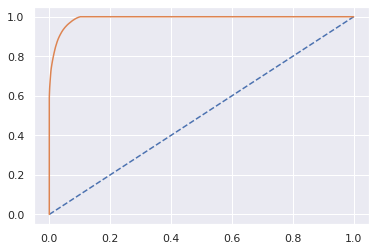

In [504]:
# predict probabilities
probs = best_grid_dtcl.predict_proba(x_train_treated2)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)

### AUC and ROC for the test data

AUC: 0.921


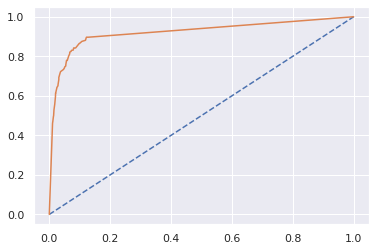

In [505]:
# predict probabilities
probs = best_grid_dtcl.predict_proba(x_test_treated2)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)

### Confusion Matrix for the training data

In [506]:
# create the confusion matrix
 
confusion_matrix(y_train,ytrain_predict_dtcl)

array([[6420,  136],
       [ 201, 1125]])

In [507]:
#Train Data Accuracy
cart_train_acc=best_grid_dtcl.score(x_train_treated2,y_train)
cart_train_acc

0.957244354224816

In [508]:
print(classification_report(y_train, ytrain_predict_dtcl))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      6556
           1       0.89      0.85      0.87      1326

    accuracy                           0.96      7882
   macro avg       0.93      0.91      0.92      7882
weighted avg       0.96      0.96      0.96      7882



In [509]:
cart_metrics=classification_report(y_train, ytrain_predict_dtcl,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_train_precision=round(df.loc["1"][0],2)
cart_train_recall=round(df.loc["1"][1],2)
cart_train_f1=round(df.loc["1"][2],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.89
cart_train_recall  0.85
cart_train_f1  0.87


### Confusion Matrix for test data

In [510]:
confusion_matrix(y_test, ytest_predict_dtcl)

array([[2703,  105],
       [ 158,  412]])

In [511]:
#Test Data Accuracy
cart_test_acc=best_grid_dtcl.score(x_test_treated2,y_test)
cart_test_acc

0.9221432800473653

In [512]:
print(classification_report(y_test, ytest_predict_dtcl))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      2808
           1       0.80      0.72      0.76       570

    accuracy                           0.92      3378
   macro avg       0.87      0.84      0.86      3378
weighted avg       0.92      0.92      0.92      3378



In [513]:
cart_metrics=classification_report(y_test, ytest_predict_dtcl,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df.loc["1"][0],2)
cart_test_recall=round(df.loc["1"][1],2)
cart_test_f1=round(df.loc["1"][2],2)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)

cart_test_precision  0.8
cart_test_recall  0.72
cart_test_f1  0.76


### <font color = Red> <b> Building a Decision Tree Classifier on datset without less important features

In [514]:
x_train_new=x_train_treated2.drop(['coupon_used_for_payment','account_segment','Gender','Service_Score'],axis=1)
x_test_new=x_test_treated2.drop(['coupon_used_for_payment','account_segment','Gender','Service_Score'],axis=1)

In [515]:
param_grid_cart = {
    'criterion': ['gini'],
    'max_depth': [50], 
    'min_samples_leaf': [2,3,5], 
    'min_samples_split': [10,15],
}
 
dtcl = DecisionTreeClassifier(random_state=0)
 
grid_search_dtcl = GridSearchCV(estimator = dtcl, param_grid = param_grid_cart, cv = 10)

In [516]:
grid_search_dtcl.fit(x_train_new, y_train)
print(grid_search_dtcl.best_params_)
best_grid_dtcl = grid_search_dtcl.best_estimator_
best_grid_dtcl


{'criterion': 'gini', 'max_depth': 50, 'min_samples_leaf': 3, 'min_samples_split': 10}


DecisionTreeClassifier(max_depth=50, min_samples_leaf=3, min_samples_split=10,
                       random_state=0)

## Generating Tree

In [517]:
train_char_label = ['no', 'yes']
tree_regularized = open('tree_regularized.dot','w')
dot_data = tree.export_graphviz(best_grid_dtcl, out_file= tree_regularized , feature_names = list(x_train_new), class_names = list(train_char_label))
 
tree_regularized.close()
files.download('tree_regularized.dot')
dot_data

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

http://webgraphviz.com/

## Variable Importance

In [518]:
print (pd.DataFrame(best_grid_dtcl.feature_importances_, columns = ["Imp"], index = x_train_new.columns).sort_values('Imp',ascending=False))

                           Imp
Tenure                0.348641
Day_Since_CC_connect  0.086252
CC_Agent_Score        0.072963
Complain_ly           0.070806
cashback              0.067159
rev_growth_yoy        0.060681
rev_per_month         0.056264
CC_Contacted_LY       0.051171
Payment               0.041563
Marital_Status        0.039396
City_Tier             0.036938
Login_device          0.036331
Account_user_count    0.031834


## <font color="Green"> Predicting on Training and Test dataset using Cart model

In [519]:
# Predict both the train and test data
ytrain_predict_dtcl=best_grid_dtcl.predict(x_train_new)
ytest_predict_dtcl=best_grid_dtcl.predict(x_test_new)

### Getting the Predicted Classes and Probs

In [520]:
ytest_predict_dtcl_prob=best_grid_dtcl.predict_proba(x_test_new)
pd.DataFrame(ytest_predict_dtcl_prob).head()

0    1
0  0.5  0.5
1  0.0  1.0
2  1.0  0.0
3  1.0  0.0
4  1.0  0.0

### Cart Model Evaluation

### AUC and ROC for the training data

AUC: 0.995


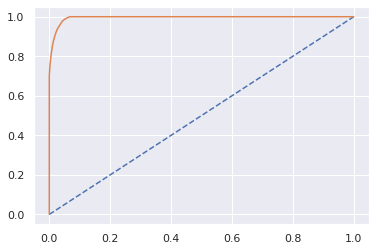

In [521]:
# predict probabilities
probs = best_grid_dtcl.predict_proba(x_train_new)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)

### AUC and ROC for the test data

AUC: 0.914


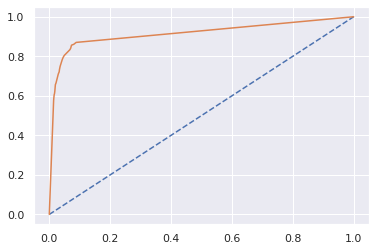

In [522]:
# predict probabilities
probs = best_grid_dtcl.predict_proba(x_test_new)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)

### Confusion Matrix for the training data

In [523]:
# create the confusion matrix
 
confusion_matrix(y_train,ytrain_predict_dtcl)

array([[6450,  106],
       [ 143, 1183]])

In [524]:
#Train Data Accuracy
cart_train_acc=best_grid_dtcl.score(x_train_new,y_train)
cart_train_acc

0.9684090332402944

In [525]:
print(classification_report(y_train, ytrain_predict_dtcl))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      6556
           1       0.92      0.89      0.90      1326

    accuracy                           0.97      7882
   macro avg       0.95      0.94      0.94      7882
weighted avg       0.97      0.97      0.97      7882



In [526]:
cart_metrics=classification_report(y_train, ytrain_predict_dtcl,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_train_precision=round(df.loc["1"][0],2)
cart_train_recall=round(df.loc["1"][1],2)
cart_train_f1=round(df.loc["1"][2],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.92
cart_train_recall  0.89
cart_train_f1  0.9


### Confusion Matrix for test data

In [527]:
confusion_matrix(y_test, ytest_predict_dtcl)

array([[2708,  100],
       [ 143,  427]])

In [528]:
#Test Data Accuracy
cart_test_acc=best_grid_dtcl.score(x_test_new,y_test)
cart_test_acc

0.9280639431616341

In [529]:
print(classification_report(y_test, ytest_predict_dtcl))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      2808
           1       0.81      0.75      0.78       570

    accuracy                           0.93      3378
   macro avg       0.88      0.86      0.87      3378
weighted avg       0.93      0.93      0.93      3378



In [530]:
cart_metrics=classification_report(y_test, ytest_predict_dtcl,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df.loc["1"][0],2)
cart_test_recall=round(df.loc["1"][1],2)
cart_test_f1=round(df.loc["1"][2],2)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)

cart_test_precision  0.81
cart_test_recall  0.75
cart_test_f1  0.78


# <font color = Green> <b> Building a Neural Network Classifier

In [531]:
param_grid_ann = {
    'hidden_layer_sizes': [(100,150,100)],
    'activation': ['logistic', 'relu'],
    'solver': ['sgd', 'adam'],
    'tol': [0.05,0.01],
    'max_iter' : [100,200,500]
}
 
nncl = MLPClassifier()
 
grid_search_nncl = GridSearchCV(estimator = nncl, param_grid = param_grid_ann, cv = 3)

In [532]:
grid_search_nncl.fit(x_train_scaled, y_train)
grid_search_nncl.best_params_


{'activation': 'relu',
 'hidden_layer_sizes': (100, 150, 100),
 'max_iter': 500,
 'solver': 'adam',
 'tol': 0.01}

In [533]:
best_grid_mlp = grid_search_nncl.best_estimator_
best_grid_mlp

MLPClassifier(hidden_layer_sizes=(100, 150, 100), max_iter=500, tol=0.01)

## <font color="Green"> Predicting the Training and Testing data Using Artificial neural network

In [534]:
ytrain_predict_ann = best_grid_mlp.predict(x_train_scaled)
ytest_predict_ann = best_grid_mlp.predict(x_test_scaled)

### NN Model Performance Evaluation on Training data

In [535]:
 confusion_matrix(y_train,ytrain_predict_ann)

array([[6556,    0],
       [   0, 1326]])

In [536]:
nn_train_acc=best_grid_mlp.score(x_train_scaled,y_train) 
nn_train_acc

1.0

In [537]:
 print(classification_report(y_train,ytrain_predict_ann))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6556
           1       1.00      1.00      1.00      1326

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882



In [538]:
nn_metrics=classification_report(y_train, ytrain_predict_ann,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(df.loc["1"][0],2)
nn_train_recall=round(df.loc["1"][1],2)
nn_train_f1=round(df.loc["1"][2],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

nn_train_precision  1.0
nn_train_recall  1.0
nn_train_f1  1.0


Area under Curve is 1.0


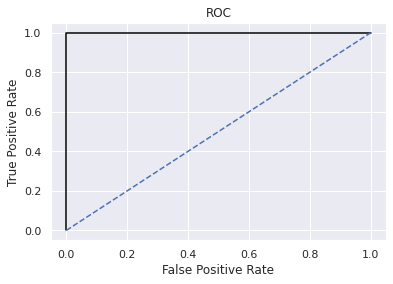

In [539]:
nn_train_fpr, nn_train_tpr,_=roc_curve(y_train,best_grid_mlp.predict_proba(x_train_scaled)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_train_auc=roc_auc_score(y_train,best_grid_mlp.predict(x_train_scaled))
print('Area under Curve is', nn_train_auc)

### NN Model Performance Evaluation on Test data

In [540]:
confusion_matrix(y_test,ytest_predict_ann)

array([[2772,   36],
       [  84,  486]])

In [541]:
nn_test_acc=best_grid_mlp.score(x_test_scaled,y_test)
nn_test_acc

0.9644760213143873

In [542]:
print(classification_report(y_test,ytest_predict_ann))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2808
           1       0.93      0.85      0.89       570

    accuracy                           0.96      3378
   macro avg       0.95      0.92      0.93      3378
weighted avg       0.96      0.96      0.96      3378



In [543]:
nn_metrics=classification_report(y_test, ytest_predict_ann,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(df.loc["1"][0],2)
nn_test_recall=round(df.loc["1"][1],2)
nn_test_f1=round(df.loc["1"][2],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

nn_test_precision  0.93
nn_test_recall  0.85
nn_test_f1  0.89


Area under Curve is 0.9199055330634278


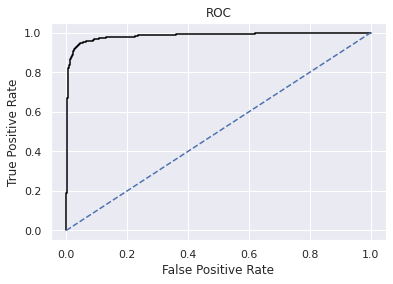

In [544]:
nn_test_fpr, nn_test_tpr,_=roc_curve(y_test,best_grid_mlp.predict_proba(x_test_scaled)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_test_auc=roc_auc_score(y_test,best_grid_mlp.predict(x_test_scaled))
print('Area under Curve is', nn_test_auc)

In [545]:
best_grid_mlp.score

<bound method ClassifierMixin.score of MLPClassifier(hidden_layer_sizes=(100, 150, 100), max_iter=500, tol=0.01)>

# <font color = Green> <b>Building a Logistic Regression Model

## Applying GridSearchCV for Logistic Regression

In [546]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs','newton-cg','saga'],
      'tol':[0.001]}

In [547]:
model = LogisticRegression(max_iter=10000,n_jobs=-1,random_state=1,)

In [548]:
grid_search_lr = GridSearchCV(estimator = model, param_grid = grid, cv = 8,n_jobs=-1,scoring='f1')

In [549]:
grid_search_lr.fit(x_train_treated2, y_train)


GridSearchCV(cv=8,
             estimator=LogisticRegression(max_iter=10000, n_jobs=-1,
                                          random_state=1),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'],
                         'solver': ['sag', 'lbfgs', 'newton-cg', 'saga'],
                         'tol': [0.001]},
             scoring='f1')

In [550]:
print(grid_search_lr.best_params_,'\n')
print(grid_search_lr.best_estimator_)

{'penalty': 'none', 'solver': 'newton-cg', 'tol': 0.001} 

LogisticRegression(max_iter=10000, n_jobs=-1, penalty='none', random_state=1,
                   solver='newton-cg', tol=0.001)


In [551]:
best_model_lr = grid_search_lr.best_estimator_

In [552]:
# Prediction on the training set

ytrain_predict_lr = best_model_lr.predict(x_train_treated2)
ytest_predict_lr = best_model_lr.predict(x_test_treated2)

In [553]:
## Getting the probabilities on the test set

ytest_predict_lr_prob=best_model_lr.predict_proba(x_test_treated2)
pd.DataFrame(ytest_predict_lr_prob).head()

0         1
0  0.546232  0.453768
1  0.443331  0.556669
2  0.910408  0.089592
3  0.731837  0.268163
4  0.983790  0.016210

#### <font color="red">*Checking Performance matrix for Logistic Regression Model*

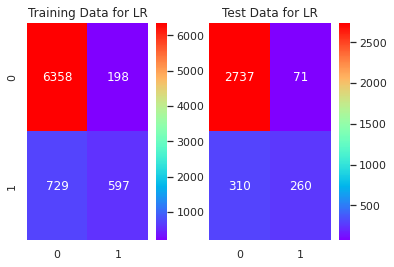

In [554]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict_lr)),annot=True,fmt='.5g',cmap='rainbow',ax=a[0][0]);
a[0][0].set_title('Training Data for LR')

#Plotting confusion matrix for the different models for the Test Data

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict_lr)),annot=True,fmt='.5g',cmap='rainbow',ax=a[0][1]);
a[0][1].set_title('Test Data for LR');

In [555]:
## Classification Report on the training data
print('Classification Report of the training data of Logisitic Regression Model:\n\n',classification_report(y_train, ytrain_predict_lr),'\n');

Classification Report of the training data of Logisitic Regression Model:

               precision    recall  f1-score   support

           0       0.90      0.97      0.93      6556
           1       0.75      0.45      0.56      1326

    accuracy                           0.88      7882
   macro avg       0.82      0.71      0.75      7882
weighted avg       0.87      0.88      0.87      7882
 



In [556]:
# Accuracy - Train Data
lr_train_acc=best_model_lr.score(x_train_treated2, y_train)
lr_train_acc

0.8823902562801319

In [557]:
lr_train_metrics=classification_report(y_train, ytrain_predict_lr,output_dict=True)
df=pd.DataFrame(lr_train_metrics).transpose()
lr_train_precision=round(df.loc["1"][0],2)
lr_train_recall=round(df.loc["1"][1],2)
lr_train_f1=round(df.loc["1"][2],2)
print ('lr_train_precision ',lr_train_precision)
print ('lr_train_recall ',lr_train_recall)
print ('lr_train_f1 ',lr_train_f1)

lr_train_precision  0.75
lr_train_recall  0.45
lr_train_f1  0.56


In [558]:
## Classification Report on the test data
print('Classification Report of the test data of Logisitic Regression Model:\n\n',classification_report(y_test, ytest_predict_lr));

Classification Report of the test data of Logisitic Regression Model:

               precision    recall  f1-score   support

           0       0.90      0.97      0.93      2808
           1       0.79      0.46      0.58       570

    accuracy                           0.89      3378
   macro avg       0.84      0.72      0.76      3378
weighted avg       0.88      0.89      0.87      3378



In [559]:
# Accuracy - Test Data
lr_test_acc=best_model_lr.score(x_test_treated2, y_test)
lr_test_acc

0.8872113676731794

In [560]:
lr_test_metrics=classification_report(y_test, ytest_predict_lr,output_dict=True)
df=pd.DataFrame(lr_test_metrics).transpose()
lr_test_precision=round(df.loc["1"][0],2)
lr_test_recall=round(df.loc["1"][1],2)
lr_test_f1=round(df.loc["1"][2],2)
print ('lr_test_precision ',lr_test_precision)
print ('lr_test_recall ',lr_test_recall)
print ('lr_test_f1 ',lr_test_f1)

lr_test_precision  0.79
lr_test_recall  0.46
lr_test_f1  0.58


#### <font color="red"> *AUC and ROC for the training data on Logistic Regression Model*

AUC for Logistic Regression Train Data: 0.868


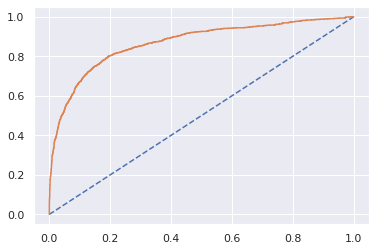

In [561]:
# predict probabilities
probs = best_model_lr.predict_proba(x_train_treated2)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_train_auc = roc_auc_score(y_train, probs)
print('AUC for Logistic Regression Train Data: %.3f' % lr_train_auc)
# calculate roc curve
lr_train_fpr, lr_train_tpr, lr_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lr_train_fpr, lr_train_tpr);

#### <font color="red">*AUC and ROC for the test data on Logistic Regression Model*

AUC for Logistic Regression Test Data: 0.869


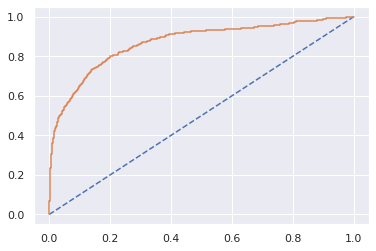

In [562]:
# predict probabilities
probs = best_model_lr.predict_proba(x_test_treated2)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_test_auc = roc_auc_score(y_test, probs)
print('AUC for Logistic Regression Test Data: %.3f' % lr_test_auc)
# calculate roc curve
lr_test_fpr, lr_test_tpr, lr_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lr_test_fpr, lr_test_tpr);

#### <font color="red"> *Getting co-efficients and Intercepts of Logisitic regression Model*

In [563]:
model_lr = LogisticRegression(max_iter=10000,n_jobs=2,random_state=1,penalty='l2', solver= 'saga', tol= 0.0001)

In [564]:
model_lr.fit(x_train_treated2, y_train)

LogisticRegression(max_iter=10000, n_jobs=2, random_state=1, solver='saga')

In [565]:
model_lr.coef_

array([[-0.17495257,  0.30702024,  0.01660171, -0.0762125 ,  0.04763329,
        -0.16438382,  0.25180392, -0.44038428,  0.21388424,  0.36592432,
         0.12566733,  1.52159553, -0.05211457,  0.19264881, -0.08609711,
        -0.00853054, -0.24046969]])

In [566]:
model_lr.intercept_

array([-0.57049095])

In [567]:
#Performance outcomes of Logistic Regression Model
model_param_lr_train=lr_train_acc,lr_train_auc,lr_train_recall,lr_train_precision,lr_train_f1
model_param_lr_test=lr_test_acc,lr_test_auc,lr_test_recall,lr_test_precision,lr_test_f1
print(model_param_lr_train)
print(model_param_lr_test)

(0.8823902562801319, 0.8677034243556155, 0.45, 0.75, 0.56)
(0.8872113676731794, 0.8691564202529116, 0.46, 0.79, 0.58)


# <font color = Green> <b>Building a KNN Model

In [568]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_scaled, y_train)
    # evaluate test accuracy
    scores = knn.score(x_test_scaled, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.03256364712847837,
 0.04262877442273538,
 0.04262877442273538,
 0.052101835405565455,
 0.047957371225577305,
 0.06631142687981051,
 0.05891059798697451,
 0.07785671995263466,
 0.07223208999407937,
 0.08969804618117228,
 0.08614564831261107,
 0.09769094138543521,
 0.09295441089402012,
 0.10183540556542336,
 0.09857904085257552,
 0.10746003552397865,
 0.10449970396684427,
 0.11338069863824751,
 0.10686796921255182]

#### <font color = "Blue"> *Plotting misclassification error vs k (with k value on X-axis)*

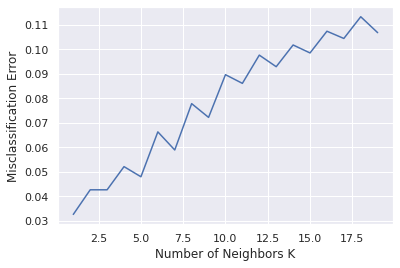

In [569]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,1), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

#### <font color = "Navy Blue"> *From the above graph the optimal value of k comes out to be 2

In [570]:
Model_knn=KNeighborsClassifier(n_neighbors=2)
Model_knn.fit(x_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=2)

In [571]:
ytrain_predict_knn = Model_knn.predict(x_train_scaled)
ytest_predict_knn = Model_knn.predict(x_test_scaled)

#### <font color="red">***Checking Performance matrix, AUC and ROC for KNN Model***

#### <font color="red">*Checking Performance matrix for KNN Model*

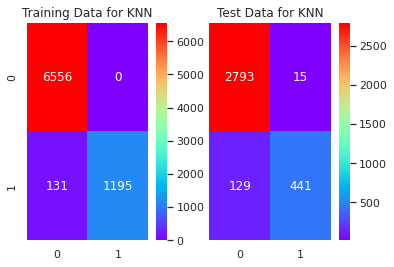

In [572]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the KNN model for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict_knn)),annot=True,fmt='.5g',cmap='rainbow',ax=a[0][0]);
a[0][0].set_title('Training Data for KNN')

#Plotting confusion matrix for the KNN model for the Test Data

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict_knn)),annot=True,fmt='.5g',cmap='rainbow',ax=a[0][1]);
a[0][1].set_title('Test Data for KNN');

In [573]:
## Classification Report on the train data
print('Classification Report of the train data of KNN Model:\n\n',classification_report(y_train, ytrain_predict_knn));

Classification Report of the train data of KNN Model:

               precision    recall  f1-score   support

           0       0.98      1.00      0.99      6556
           1       1.00      0.90      0.95      1326

    accuracy                           0.98      7882
   macro avg       0.99      0.95      0.97      7882
weighted avg       0.98      0.98      0.98      7882



In [574]:
# Accuracy - Train Data
knn_train_acc=Model_knn.score(x_train_scaled, y_train)
knn_train_acc

0.9833798528292311

In [575]:
knn_train_metrics=classification_report(y_train, ytrain_predict_knn,output_dict=True)
df_knn=pd.DataFrame(knn_train_metrics).transpose()
knn_train_precision=round(df_knn.loc["1"][0],2)
knn_train_recall=round(df_knn.loc["1"][1],2)
knn_train_f1=round(df_knn.loc["1"][2],2)
print ('knn_train_precision ',knn_train_precision)
print ('knn_train_recall ',knn_train_recall)
print ('knn_train_f1 ',knn_train_f1)

knn_train_precision  1.0
knn_train_recall  0.9
knn_train_f1  0.95


In [576]:
## Classification Report on the test data
print('Classification Report of the test data of KNN Model:\n\n',classification_report(y_test, ytest_predict_knn));


Classification Report of the test data of KNN Model:

               precision    recall  f1-score   support

           0       0.96      0.99      0.97      2808
           1       0.97      0.77      0.86       570

    accuracy                           0.96      3378
   macro avg       0.96      0.88      0.92      3378
weighted avg       0.96      0.96      0.96      3378



In [577]:
# Accuracy - Test Data
knn_test_acc=Model_knn.score(x_test_scaled, y_test)
knn_test_acc

0.9573712255772646

In [578]:
knn_test_metrics=classification_report(y_test, ytest_predict_knn,output_dict=True)
df_knn_t=pd.DataFrame(knn_test_metrics).transpose()
knn_test_precision=round(df_knn_t.loc["1"][0],2)
knn_test_recall=round(df_knn_t.loc["1"][1],2)
knn_test_f1=round(df_knn_t.loc["1"][2],2)
print ('knn_test_precision ',knn_test_precision)
print ('knn_test_recall ',knn_test_recall)
print ('knn_test_f1 ',knn_test_f1)

knn_test_precision  0.97
knn_test_recall  0.77
knn_test_f1  0.86


#### <font color="red"> *AUC and ROC for the training data on KNN Model*

AUC for KNN Train Data: 0.999


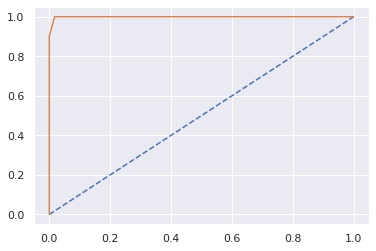

In [579]:
# predict probabilities
probs_knn_tr = Model_knn.predict_proba(x_train_scaled)
# keep probabilities for the positive outcome only
probs_knn_tr = probs_knn_tr[:, 1]
# calculate AUC
knn_train_auc = roc_auc_score(y_train, probs_knn_tr)
print('AUC for KNN Train Data: %.3f' % knn_train_auc)
# calculate roc curve
knn_train_fpr, knn_train_tpr, knn_train_thresholds = roc_curve(y_train, probs_knn_tr)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knn_train_fpr, knn_train_tpr);

#### <font color="red">*AUC and ROC for the test data on KNN Model*

AUC for KNN Test Data: 0.960


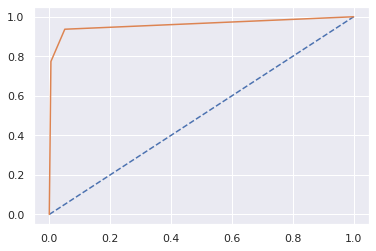

In [580]:
# predict probabilities
probs_knn_t = Model_knn.predict_proba(x_test_scaled)
# keep probabilities for the positive outcome only
probs_knn_t = probs_knn_t[:, 1]
# calculate AUC
knn_test_auc = roc_auc_score(y_test, probs_knn_t)
print('AUC for KNN Test Data: %.3f' % knn_test_auc)
# calculate roc curve
knn_test_fpr, knn_test_tpr, knn_test_thresholds = roc_curve(y_test, probs_knn_t)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knn_test_fpr, knn_test_tpr);

In [581]:
#Performance outcomes of KNN Model
model_param_knn_train=knn_train_acc,knn_train_auc,knn_train_recall,knn_train_precision,knn_train_f1
model_param_knn_test=knn_test_acc,knn_test_auc,knn_test_recall,knn_test_precision,knn_test_f1
print(model_param_knn_train)
print(model_param_knn_test)

(0.9833798528292311, 0.9991335237338002, 0.9, 1.0, 0.95)
(0.9573712255772646, 0.9601561328535013, 0.77, 0.97, 0.86)


## <font color = Blue> <b>2. Model Tuning
### <font color = Blue> <b>a.Ensemble modelling, wherever applicable 
### <font color = Blue> <b>b. Any other model tuning measures(if applicable)
### <font color = Blue> <b> c. Interpretation of the most optimum model and its implication on the business

## <font color = Green> <b> Enseamble Models: Building a Random Forest Classifier

Due to large volume of data, trying for different parameter values in the gridsearch with higher cv value will lead to performance issues and model will run for much longer time

In [582]:
from sklearn.model_selection import GridSearchCV
 
param_grid_rfcl = {
    'max_depth': [40],
    'max_features': [7,8],
    'min_samples_leaf': [4,5,6], 
    'min_samples_split': [12,15],
    'n_estimators': [150,160,170]
}
 
rfcl = RandomForestClassifier()
 
grid_search_rfcl = GridSearchCV(estimator = rfcl, param_grid = param_grid_rfcl, cv = 3)

In [583]:
grid_search_rfcl.fit(x_train_treated2, y_train)


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [40], 'max_features': [7, 8],
                         'min_samples_leaf': [4, 5, 6],
                         'min_samples_split': [12, 15],
                         'n_estimators': [150, 160, 170]})

In [584]:
grid_search_rfcl.best_params_

{'max_depth': 40,
 'max_features': 8,
 'min_samples_leaf': 4,
 'min_samples_split': 12,
 'n_estimators': 150}

In [585]:
best_grid_rfcl = grid_search_rfcl.best_estimator_

In [586]:
best_grid_rfcl

RandomForestClassifier(max_depth=40, max_features=8, min_samples_leaf=4,
                       min_samples_split=12, n_estimators=150)

## <font color="Green"> Predicting the Training and Testing data using Random Forest Classifcation

In [587]:
ytrain_predict_rf = best_grid_rfcl.predict(x_train_treated2)
ytest_predict_rf = best_grid_rfcl.predict(x_test_treated2)

## RF Model Performance Evaluation on Training data

In [588]:
confusion_matrix(y_train,ytrain_predict_rf)

array([[6524,   32],
       [ 163, 1163]])

In [589]:
rf_train_acc=best_grid_rfcl.score(x_train_treated2,y_train) 
rf_train_acc

0.9752600862725197

In [590]:
print(classification_report(y_train,ytrain_predict_rf))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      6556
           1       0.97      0.88      0.92      1326

    accuracy                           0.98      7882
   macro avg       0.97      0.94      0.95      7882
weighted avg       0.98      0.98      0.97      7882



In [591]:
rf_metrics=classification_report(y_train, ytrain_predict_rf,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][0],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_f1=round(df.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.97
rf_train_recall  0.88
rf_train_f1  0.92


Area under Curve is 0.936096440735209


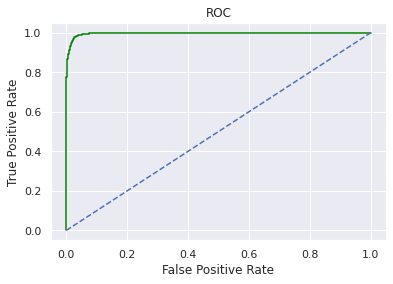

In [592]:
rf_train_fpr, rf_train_tpr,_=roc_curve(y_train,best_grid_rfcl.predict_proba(x_train_treated2)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(y_train,best_grid_rfcl.predict(x_train_treated2))
print('Area under Curve is', rf_train_auc)

## RF Model Performance Evaluation on Test data

In [593]:
confusion_matrix(y_test,ytest_predict_rf)

array([[2771,   37],
       [ 145,  425]])

In [594]:
rf_test_acc=best_grid_rfcl.score(x_test_treated2,y_test)
rf_test_acc

0.9461219656601539

In [595]:
print(classification_report(y_test,ytest_predict_rf))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2808
           1       0.92      0.75      0.82       570

    accuracy                           0.95      3378
   macro avg       0.94      0.87      0.90      3378
weighted avg       0.95      0.95      0.94      3378



In [596]:
rf_metrics=classification_report(y_test, ytest_predict_rf,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.iloc[1][0],2)
rf_test_recall=round(df.iloc[1][1],2)
rf_test_f1=round(df.iloc[1][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.92
rf_test_recall  0.75
rf_test_f1  0.82


Area under Curve is 0.8662186984555406


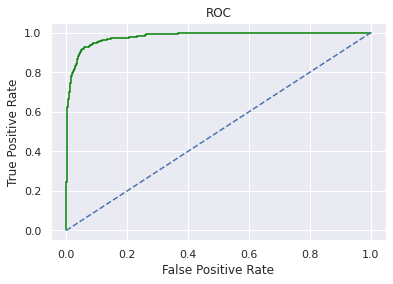

In [597]:
rf_test_fpr, rf_test_tpr,_=roc_curve(y_test,best_grid_rfcl.predict_proba(x_test_treated2)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(y_test,best_grid_rfcl.predict(x_test_treated2))
print('Area under Curve is', rf_test_auc)

In [598]:
# Variable Importance
print (pd.DataFrame(best_grid_rfcl.feature_importances_, columns = ["Imp"], index = x_train_treated2.columns).sort_values('Imp',ascending=False))

                              Imp
Tenure                   0.350124
Complain_ly              0.083763
Day_Since_CC_connect     0.071369
CC_Agent_Score           0.057473
cashback                 0.057156
CC_Contacted_LY          0.054284
rev_per_month            0.051732
rev_growth_yoy           0.047950
Payment                  0.042019
Marital_Status           0.039969
account_segment          0.031570
City_Tier                0.027701
Account_user_count       0.026018
coupon_used_for_payment  0.017385
Login_device             0.017335
Gender                   0.015006
Service_Score            0.009146


### <font color = Red> <b> As per the random forest model following features are not so important and hence can be dropped for model building 
### <font color = Green> <br>Login_devices<br>Gender<br>coupon_used_for_payment <br>Service_Score 

# Building a Random Forest Classifier without unwanted features

In [599]:
x_train_new=x_train_treated2.drop(['coupon_used_for_payment','Login_device','Gender','Service_Score'],axis=1)
x_test_new=x_test_treated2.drop(['coupon_used_for_payment','Login_device','Gender','Service_Score'],axis=1)

In [600]:
x_train_new.shape

(7882, 13)

In [601]:
x_test_new.shape

(3378, 13)

Due to large volume of data, trying for different parameter values in the gridsearch with higher cv value will lead to performance issues and model will run for much longer time

In [602]:
from sklearn.model_selection import GridSearchCV
 
param_grid_rfcl = {
    'max_depth': [40],
    'max_features': [7,8],
    'min_samples_leaf': [2,3,4], 
    'min_samples_split': [8,10,12],
    'n_estimators': [135,140,150]
}
 
rfcl = RandomForestClassifier()
 
grid_search_rfcl = GridSearchCV(estimator = rfcl, param_grid = param_grid_rfcl, cv = 3)

In [603]:
grid_search_rfcl.fit(x_train_new, y_train)


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [40], 'max_features': [7, 8],
                         'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [135, 140, 150]})

In [604]:
grid_search_rfcl.best_params_

{'max_depth': 40,
 'max_features': 8,
 'min_samples_leaf': 2,
 'min_samples_split': 8,
 'n_estimators': 140}

In [605]:
best_grid_rfcl = grid_search_rfcl.best_estimator_

In [606]:
best_grid_rfcl

RandomForestClassifier(max_depth=40, max_features=8, min_samples_leaf=2,
                       min_samples_split=8, n_estimators=140)

## <font color="Green"> Predicting the Training and Testing data using Random Forest Classifcation

In [607]:
ytrain_predict_rf = best_grid_rfcl.predict(x_train_new)
ytest_predict_rf = best_grid_rfcl.predict(x_test_new)

## RF Model Performance Evaluation on Training data

In [608]:
confusion_matrix(y_train,ytrain_predict_rf)

array([[6546,   10],
       [  77, 1249]])

In [609]:
rf_train_acc=best_grid_rfcl.score(x_train_new,y_train) 
rf_train_acc

0.9889621923369704

In [610]:
print(classification_report(y_train,ytrain_predict_rf))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6556
           1       0.99      0.94      0.97      1326

    accuracy                           0.99      7882
   macro avg       0.99      0.97      0.98      7882
weighted avg       0.99      0.99      0.99      7882



In [611]:
rf_metrics=classification_report(y_train, ytrain_predict_rf,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][0],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_f1=round(df.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.99
rf_train_recall  0.94
rf_train_f1  0.97


Area under Curve is 0.9702026490419701


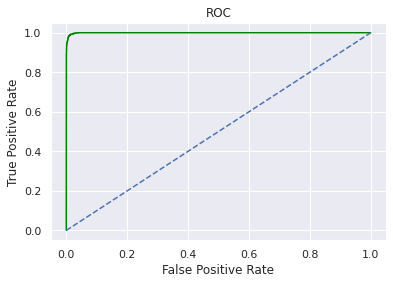

In [612]:
rf_train_fpr, rf_train_tpr,_=roc_curve(y_train,best_grid_rfcl.predict_proba(x_train_new)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(y_train,best_grid_rfcl.predict(x_train_new))
print('Area under Curve is', rf_train_auc)

## RF Model Performance Evaluation on Test data

In [613]:
confusion_matrix(y_test,ytest_predict_rf)

array([[2771,   37],
       [ 112,  458]])

In [614]:
rf_test_acc=best_grid_rfcl.score(x_test_new,y_test)
rf_test_acc

0.9558910597986975

In [615]:
print(classification_report(y_test,ytest_predict_rf))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      2808
           1       0.93      0.80      0.86       570

    accuracy                           0.96      3378
   macro avg       0.94      0.90      0.92      3378
weighted avg       0.96      0.96      0.95      3378



In [616]:
rf_metrics=classification_report(y_test, ytest_predict_rf,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.iloc[1][0],2)
rf_test_recall=round(df.iloc[1][1],2)
rf_test_f1=round(df.iloc[1][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.93
rf_test_recall  0.8
rf_test_f1  0.86


Area under Curve is 0.8951660668765933


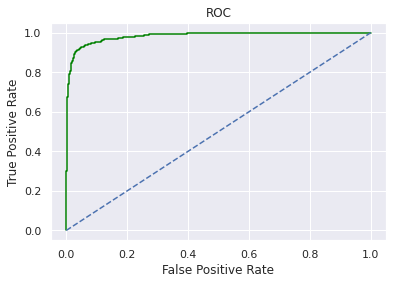

In [617]:
rf_test_fpr, rf_test_tpr,_=roc_curve(y_test,best_grid_rfcl.predict_proba(x_test_new)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(y_test,best_grid_rfcl.predict(x_test_new))
print('Area under Curve is', rf_test_auc)

In [618]:
# Variable Importance
print (pd.DataFrame(best_grid_rfcl.feature_importances_, columns = ["Imp"], index = x_train_new.columns).sort_values('Imp',ascending=False))

                           Imp
Tenure                0.333588
Day_Since_CC_connect  0.079343
Complain_ly           0.073516
cashback              0.069675
CC_Contacted_LY       0.067748
CC_Agent_Score        0.063511
rev_per_month         0.061073
rev_growth_yoy        0.059547
Payment               0.050676
Marital_Status        0.042727
account_segment       0.034207
Account_user_count    0.032437
City_Tier             0.031954


##   <font color='Blue'> Model Tuning, Bagging and Boosting.

## <font color = Green> <b> Enseamble Models: Building Ada Boost Model

In [619]:
Model_adb = AdaBoostClassifier(n_estimators=15,random_state=1,learning_rate=0.001)
Model_adb.fit(x_train_treated2,y_train)


AdaBoostClassifier(learning_rate=0.001, n_estimators=15, random_state=1)

In [620]:
ytrain_predict_adb = Model_adb.predict(x_train_treated2)
ytest_predict_adb = Model_adb.predict(x_test_treated2)

#### <font color="red">***Checking Performance matrix, AUC and ROC for AdaBoosting Model***

#### <font color="red">*Checking Performance matrix for AdaBoosting Model*

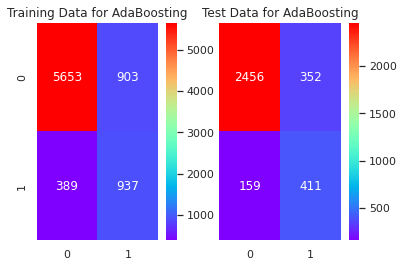

In [621]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the AdaBoosting model for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict_adb)),annot=True,fmt='.5g',cmap='rainbow',ax=a[0][0]);
a[0][0].set_title('Training Data for AdaBoosting')

#Plotting confusion matrix for the AdaBoosting model for the Test Data

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict_adb)),annot=True,fmt='.5g',cmap='rainbow',ax=a[0][1]);
a[0][1].set_title('Test Data for AdaBoosting');

In [622]:
## Classification Report on the train data
print('Classification Report of the train data of AdaBoosting Model:\n\n',classification_report(y_train, ytrain_predict_adb));

Classification Report of the train data of AdaBoosting Model:

               precision    recall  f1-score   support

           0       0.94      0.86      0.90      6556
           1       0.51      0.71      0.59      1326

    accuracy                           0.84      7882
   macro avg       0.72      0.78      0.74      7882
weighted avg       0.86      0.84      0.85      7882



In [623]:
# Accuracy - Train Data
adb_train_acc=Model_adb.score(x_train_treated2, y_train)
adb_train_acc

0.8360822126363867

In [624]:
adb_train_metrics=classification_report(y_train, ytrain_predict_adb,output_dict=True)
df_adb=pd.DataFrame(adb_train_metrics).transpose()
adb_train_precision=round(df_adb.loc["1"][0],2)
adb_train_recall=round(df_adb.loc["1"][1],2)
adb_train_f1=round(df_adb.loc["1"][2],2)
print ('adb_train_precision ',adb_train_precision)
print ('adb_train_recall ',adb_train_recall)
print ('adb_train_f1 ',adb_train_f1)

adb_train_precision  0.51
adb_train_recall  0.71
adb_train_f1  0.59


In [625]:
## Classification Report on the test data
print('Classification Report of the test data of AdaBoosting Model:\n\n',classification_report(y_test, ytest_predict_adb));


Classification Report of the test data of AdaBoosting Model:

               precision    recall  f1-score   support

           0       0.94      0.87      0.91      2808
           1       0.54      0.72      0.62       570

    accuracy                           0.85      3378
   macro avg       0.74      0.80      0.76      3378
weighted avg       0.87      0.85      0.86      3378



In [626]:
# Accuracy - Test Data
adb_test_acc=Model_adb.score(x_test_treated2, y_test)
adb_test_acc

0.8487270574304322

In [627]:
adb_test_metrics=classification_report(y_test, ytest_predict_adb,output_dict=True)
df_adb_t=pd.DataFrame(adb_test_metrics).transpose()
adb_test_precision=round(df_adb_t.loc["1"][0],2)
adb_test_recall=round(df_adb_t.loc["1"][1],2)
adb_test_f1=round(df_adb_t.loc["1"][2],2)
print ('adb_test_precision ',adb_test_precision)
print ('adb_test_recall ',adb_test_recall)
print ('adb_test_f1 ',adb_test_f1)

adb_test_precision  0.54
adb_test_recall  0.72
adb_test_f1  0.62


#### <font color="red"> *AUC and ROC for the training data on AdaBoosting Model*

AUC for AdaBoosting Train Data: 0.784


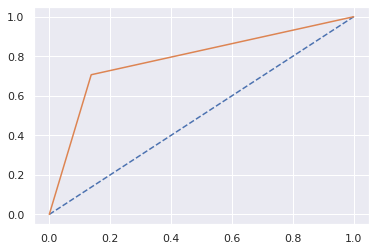

In [628]:
# predict probabilities
probs_adb_tr = Model_adb.predict_proba(x_train_treated2)
# keep probabilities for the positive outcome only
probs_adb_tr = probs_adb_tr[:, 1]
# calculate AUC
adb_train_auc = roc_auc_score(y_train, probs_adb_tr)
print('AUC for AdaBoosting Train Data: %.3f' % adb_train_auc)
# calculate roc curve
adb_train_fpr, adb_train_tpr, adb_train_thresholds = roc_curve(y_train, probs_adb_tr)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(adb_train_fpr, adb_train_tpr);

#### <font color="red">*AUC and ROC for the test data on AdaBoosting Model*





AUC for AdaBoosting Test Data: 0.798


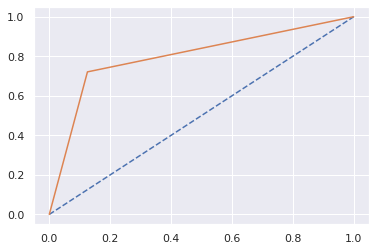

In [629]:
# predict probabilities
probs_adb_t = Model_adb.predict_proba(x_test_treated2)
# keep probabilities for the positive outcome only
probs_adb_t = probs_adb_t[:, 1]
# calculate AUC
adb_test_auc = roc_auc_score(y_test, probs_adb_t)
print('AUC for AdaBoosting Test Data: %.3f' % adb_test_auc)
# calculate roc curve
adb_test_fpr, adb_test_tpr, adb_test_thresholds = roc_curve(y_test, probs_adb_t)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(adb_test_fpr, adb_test_tpr);

In [630]:
model_param_adb_train=adb_train_acc,adb_train_auc,adb_train_recall,adb_train_precision,adb_train_f1
model_param_adb_test=adb_test_acc,adb_test_auc,adb_test_recall,adb_test_precision,adb_test_f1
print(model_param_adb_train)
print(model_param_adb_test)

(0.8360822126363867, 0.7844500380524858, 0.71, 0.51, 0.59)
(0.8487270574304322, 0.797848253111411, 0.72, 0.54, 0.62)


In [631]:
# Variable Importance
print (pd.DataFrame(Model_adb.feature_importances_, columns = ["Imp"], index = x_train_treated2.columns).sort_values('Imp',ascending=False))

                         Imp
Tenure                   1.0
Marital_Status           0.0
cashback                 0.0
Day_Since_CC_connect     0.0
coupon_used_for_payment  0.0
rev_growth_yoy           0.0
Complain_ly              0.0
rev_per_month            0.0
CC_Agent_Score           0.0
City_Tier                0.0
account_segment          0.0
Account_user_count       0.0
Service_Score            0.0
Gender                   0.0
Payment                  0.0
CC_Contacted_LY          0.0
Login_device             0.0


### <font color = Green> <i> AdaBoosting model seems to be considering only one features as important for Churn prediction and seems to be misjudging while considering importance of other independent features

## <font color = Green> <b> Enseamble Models: Building Gradient Boosting Model

In [632]:
from sklearn.ensemble import GradientBoostingClassifier
Model_gbcl = GradientBoostingClassifier(random_state=1,learning_rate=0.1, n_estimators=5000)
Model_gbcl = Model_gbcl.fit(x_train_treated2, y_train)

In [633]:
ytrain_predict_gbcl = Model_gbcl.predict(x_train_treated2)
ytest_predict_gbcl = Model_gbcl.predict(x_test_treated2)


#### <font color="red">***Checking Performance matrix, AUC and ROC for Gradient Boosting Model***

#### <font color="red">*Checking Performance matrix for Gradient Boosting Model*

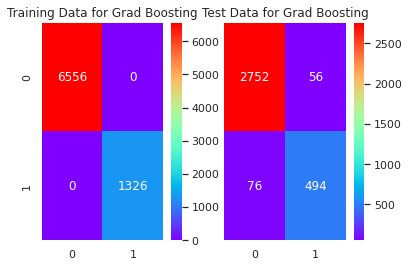

In [634]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the Gradient Boosting model for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict_gbcl)),annot=True,fmt='.5g',cmap='rainbow',ax=a[0][0]);
a[0][0].set_title('Training Data for Grad Boosting')

#Plotting confusion matrix for the Gradient Boosting model for the Test Data

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict_gbcl)),annot=True,fmt='.5g',cmap='rainbow',ax=a[0][1]);
a[0][1].set_title('Test Data for Grad Boosting');

In [635]:
## Classification Report on the train data
print('Classification Report of the train data of Gradient Boosting Model:\n\n',classification_report(y_train, ytrain_predict_gbcl));

Classification Report of the train data of Gradient Boosting Model:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6556
           1       1.00      1.00      1.00      1326

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882



In [636]:
# Accuracy - Train Data
gbcl_train_acc=Model_gbcl.score(x_train_treated2, y_train)
gbcl_train_acc

1.0

In [637]:
gbcl_train_metrics=classification_report(y_train, ytrain_predict_gbcl,output_dict=True)
df_gbcl=pd.DataFrame(gbcl_train_metrics).transpose()
gbcl_train_precision=round(df_gbcl.loc["1"][0],2)
gbcl_train_recall=round(df_gbcl.loc["1"][1],2)
gbcl_train_f1=round(df_gbcl.loc["1"][2],2)
print ('gbcl_train_precision ',gbcl_train_precision)
print ('gbcl_train_recall ',gbcl_train_recall)
print ('gbcl_train_f1 ',gbcl_train_f1)

gbcl_train_precision  1.0
gbcl_train_recall  1.0
gbcl_train_f1  1.0


In [638]:
## Classification Report on the test data
print('Classification Report of the test data of Gradient Boosting Model:\n\n',classification_report(y_test, ytest_predict_gbcl));


Classification Report of the test data of Gradient Boosting Model:

               precision    recall  f1-score   support

           0       0.97      0.98      0.98      2808
           1       0.90      0.87      0.88       570

    accuracy                           0.96      3378
   macro avg       0.94      0.92      0.93      3378
weighted avg       0.96      0.96      0.96      3378



In [639]:
# Accuracy - Test Data
gbcl_test_acc=Model_gbcl.score(x_test_treated2, y_test)
gbcl_test_acc

0.9609236234458259

In [640]:
gbcl_test_metrics=classification_report(y_test, ytest_predict_gbcl,output_dict=True)
df_gbcl_t=pd.DataFrame(gbcl_test_metrics).transpose()
gbcl_test_precision=round(df_gbcl_t.loc["1"][0],2)
gbcl_test_recall=round(df_gbcl_t.loc["1"][1],2)
gbcl_test_f1=round(df_gbcl_t.loc["1"][2],2)
print ('gbcl_test_precision ',gbcl_test_precision)
print ('gbcl_test_recall ',gbcl_test_recall)
print ('gbcl_test_f1 ',gbcl_test_f1)

gbcl_test_precision  0.9
gbcl_test_recall  0.87
gbcl_test_f1  0.88


#### <font color="red"> *AUC and ROC for the training data on Gradient Boosting Model*

AUC for Gradient Train Data: 1.000


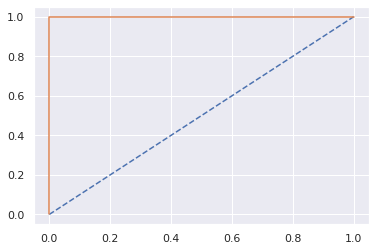

In [641]:
# predict probabilities
probs_gbcl_tr = Model_gbcl.predict_proba(x_train_treated2)
# keep probabilities for the positive outcome only
probs_gbcl_tr = probs_gbcl_tr[:, 1]
# calculate AUC
gbcl_train_auc = roc_auc_score(y_train, probs_gbcl_tr)
print('AUC for Gradient Train Data: %.3f' % gbcl_train_auc)
# calculate roc curve
gbcl_train_fpr, gbcl_train_tpr, gbcl_train_thresholds = roc_curve(y_train, probs_gbcl_tr)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gbcl_train_fpr, gbcl_train_tpr);

#### <font color="red">*AUC and ROC for the test data on Gradient Boosting Model*





AUC for Gradient Test Data: 0.988


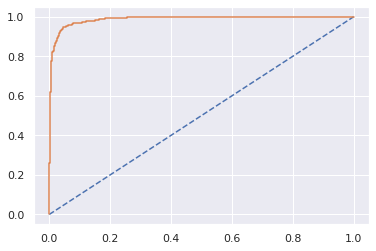

In [642]:
# predict probabilities
probs_gbcl_t = Model_gbcl.predict_proba(x_test_treated2)
# keep probabilities for the positive outcome only
probs_gbcl_t = probs_gbcl_t[:, 1]
# calculate AUC
gbcl_test_auc = roc_auc_score(y_test, probs_gbcl_t)
print('AUC for Gradient Test Data: %.3f' % gbcl_test_auc)
# calculate roc curve
gbcl_test_fpr, gbcl_test_tpr, gbcl_test_thresholds = roc_curve(y_test, probs_gbcl_t)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gbcl_test_fpr, gbcl_test_tpr);

In [643]:
model_param_gbcl_train=gbcl_train_acc,gbcl_train_auc,gbcl_train_recall,gbcl_train_precision,gbcl_train_f1
model_param_gbcl_test=gbcl_test_acc,gbcl_test_auc,gbcl_test_recall,gbcl_test_precision,gbcl_test_f1
print(model_param_gbcl_train)
print(model_param_gbcl_test)

(1.0, 0.9999999999999999, 1.0, 1.0, 1.0)
(0.9609236234458259, 0.9877667816264306, 0.87, 0.9, 0.88)


In [644]:
# Variable Importance
print (pd.DataFrame(Model_gbcl.feature_importances_, columns = ["Imp"], index = x_train_treated2.columns).sort_values('Imp',ascending=False))

                              Imp
Tenure                   0.434508
Complain_ly              0.101191
Day_Since_CC_connect     0.063264
rev_per_month            0.055385
CC_Agent_Score           0.049371
cashback                 0.045625
Payment                  0.037376
CC_Contacted_LY          0.034400
Marital_Status           0.033376
rev_growth_yoy           0.030310
account_segment          0.030119
City_Tier                0.022449
Account_user_count       0.021700
coupon_used_for_payment  0.015058
Service_Score            0.010495
Gender                   0.008877
Login_device             0.006493


### <font color = Red> <b> As per the Gradient Boosting model following features are not so important and hence can be dropped for model building 
### <font color = Green> <br>Login_devices<br>Gender<br>coupon_used_for_payment <br>Service_Score 

## <font color = Green> <b> Enseamble Models: Building a Bagging Model

In [645]:
RF_model=RandomForestClassifier(min_samples_leaf=20,min_samples_split=60)
Model_bagg=BaggingClassifier(base_estimator=RF_model,n_estimators=50,random_state=1)


In [646]:
Model_bagg.fit(x_train_treated2, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(min_samples_leaf=20,
                                                        min_samples_split=60),
                  n_estimators=50, random_state=1)

In [647]:
ytrain_predict_bagg = Model_bagg.predict(x_train_treated2)
ytest_predict_bagg = Model_bagg.predict(x_test_treated2)

#### <font color="red">***Checking Performance matrix, AUC and ROC for Bagging Model***

#### <font color="red">*Checking Performance matrix for Bagging Model*

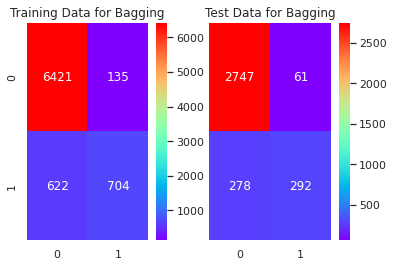

In [648]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the Bagging model for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict_bagg)),annot=True,fmt='.5g',cmap='rainbow',ax=a[0][0]);
a[0][0].set_title('Training Data for Bagging')

#Plotting confusion matrix for the Bagging model for the Test Data

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict_bagg)),annot=True,fmt='.5g',cmap='rainbow',ax=a[0][1]);
a[0][1].set_title('Test Data for Bagging');

In [649]:
## Classification Report on the train data
print('Classification Report of the train data of Bagging Model:\n\n',classification_report(y_train, ytrain_predict_bagg));

Classification Report of the train data of Bagging Model:

               precision    recall  f1-score   support

           0       0.91      0.98      0.94      6556
           1       0.84      0.53      0.65      1326

    accuracy                           0.90      7882
   macro avg       0.88      0.76      0.80      7882
weighted avg       0.90      0.90      0.89      7882



In [650]:
# Accuracy - Train Data
bagg_train_acc=Model_bagg.score(x_train_treated2, y_train)
bagg_train_acc

0.9039583861963969

In [651]:
bagg_train_metrics=classification_report(y_train, ytrain_predict_bagg,output_dict=True)
df_bagg=pd.DataFrame(bagg_train_metrics).transpose()
bagg_train_precision=round(df_bagg.loc["1"][0],2)
bagg_train_recall=round(df_bagg.loc["1"][1],2)
bagg_train_f1=round(df_bagg.loc["1"][2],2)
print ('bagg_train_precision ',bagg_train_precision)
print ('bagg_train_recall ',bagg_train_recall)
print ('bagg_train_f1 ',bagg_train_f1)

bagg_train_precision  0.84
bagg_train_recall  0.53
bagg_train_f1  0.65


In [652]:
## Classification Report on the test data
print('Classification Report of the test data of Bagging Model:\n\n',classification_report(y_test, ytest_predict_bagg));


Classification Report of the test data of Bagging Model:

               precision    recall  f1-score   support

           0       0.91      0.98      0.94      2808
           1       0.83      0.51      0.63       570

    accuracy                           0.90      3378
   macro avg       0.87      0.75      0.79      3378
weighted avg       0.89      0.90      0.89      3378



In [653]:
# Accuracy - Test Data
bagg_test_acc=Model_bagg.score(x_test_treated2, y_test)
bagg_test_acc

0.8996447602131439

In [654]:
bagg_test_metrics=classification_report(y_test, ytest_predict_bagg,output_dict=True)
df_bagg_t=pd.DataFrame(bagg_test_metrics).transpose()
bagg_test_precision=round(df_bagg_t.loc["1"][0],2)
bagg_test_recall=round(df_bagg_t.loc["1"][1],2)
bagg_test_f1=round(df_bagg_t.loc["1"][2],2)
print ('bagg_test_precision ',bagg_test_precision)
print ('bagg_test_recall ',bagg_test_recall)
print ('bagg_test_f1 ',bagg_test_f1)

bagg_test_precision  0.83
bagg_test_recall  0.51
bagg_test_f1  0.63


#### <font color="red"> *AUC and ROC for the training data on Bagging Model*

AUC for Bagging Train Data: 0.946


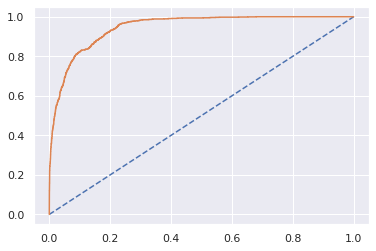

In [655]:
# predict probabilities
probs_bagg_tr = Model_bagg.predict_proba(x_train_treated2)
# keep probabilities for the positive outcome only
probs_bagg_tr = probs_bagg_tr[:, 1]
# calculate AUC
bagg_train_auc = roc_auc_score(y_train, probs_bagg_tr)
print('AUC for Bagging Train Data: %.3f' % bagg_train_auc)
# calculate roc curve
bagg_train_fpr, bagg_train_tpr, bagg_train_thresholds = roc_curve(y_train, probs_bagg_tr)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(bagg_train_fpr, bagg_train_tpr);

#### <font color="red">*AUC and ROC for the test data on Bagging Model*





AUC for Bagging Test Data: 0.932


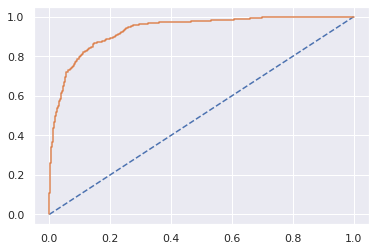

In [656]:
# predict probabilities
probs_bagg_t = Model_bagg.predict_proba(x_test_treated2)
# keep probabilities for the positive outcome only
probs_bagg_t = probs_bagg_t[:, 1]
# calculate AUC
bagg_test_auc = roc_auc_score(y_test, probs_bagg_t)
print('AUC for Bagging Test Data: %.3f' % bagg_test_auc)
# calculate roc curve
bagg_test_fpr, bagg_test_tpr, bagg_test_thresholds = roc_curve(y_test, probs_bagg_t)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(bagg_test_fpr, bagg_test_tpr);

In [657]:
model_param_bagg_train=bagg_train_acc,bagg_train_auc,bagg_train_recall,bagg_train_precision,bagg_train_f1
model_param_bagg_test=bagg_test_acc,bagg_test_auc,bagg_test_recall,bagg_test_precision,bagg_test_f1
print(model_param_bagg_train)
print(model_param_bagg_test)

(0.9039583861963969, 0.9456961810396473, 0.53, 0.84, 0.65)
(0.8996447602131439, 0.9318875893437296, 0.51, 0.83, 0.63)


# Inference: Basis on these predictions, what are the business insights and recommendations

# <font color="red"> <b> Model Performance of general methods

In [658]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
        'Neural Network Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1],
        'Log_Reg Train':model_param_lr_train,
        'Log_Reg Test':model_param_lr_test,
        'KNN Train':model_param_knn_train,
        'KNN Test':model_param_knn_test},index=index)
round(data,2)

CART Train  CART Test  Neural Network Train  Neural Network Test  \
Accuracy         0.97       0.93                   1.0                 0.96   
AUC              1.00       0.91                   1.0                 0.92   
Recall           0.89       0.75                   1.0                 0.85   
Precision        0.92       0.81                   1.0                 0.93   
F1 Score         0.90       0.78                   1.0                 0.89   

           Log_Reg Train  Log_Reg Test  KNN Train  KNN Test  
Accuracy            0.88          0.89       0.98      0.96  
AUC                 0.87          0.87       1.00      0.96  
Recall              0.45          0.46       0.90      0.77  
Precision           0.75          0.79       1.00      0.97  
F1 Score            0.56          0.58       0.95      0.86

# <font color="red"> <b> Model Performance of Enseamble methods

In [659]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
        'Bagging Train':model_param_bagg_train,
        'Bagging Test':model_param_bagg_test,
        'AdaBoosting Train':model_param_adb_train,
        'AdaBoosting Test':model_param_adb_test,
        'Gradient Boosting Train':model_param_gbcl_train,
        'Gradient Boosting Test':model_param_gbcl_test},index=index)
round(data,2)

Random Forest Train  Random Forest Test  Bagging Train  \
Accuracy                  0.99                0.96           0.90   
AUC                       0.97                0.90           0.95   
Recall                    0.94                0.80           0.53   
Precision                 0.99                0.93           0.84   
F1 Score                  0.97                0.86           0.65   

           Bagging Test  AdaBoosting Train  AdaBoosting Test  \
Accuracy           0.90               0.84              0.85   
AUC                0.93               0.78              0.80   
Recall             0.51               0.71              0.72   
Precision          0.83               0.51              0.54   
F1 Score           0.63               0.59              0.62   

           Gradient Boosting Train  Gradient Boosting Test  
Accuracy                       1.0                    0.96  
AUC                            1.0                    0.99  
Recall                         1.0                    0.87  
Precision                      1.0                    0.90  
F1 Score                       1.0                    0.88

# <font color ='red'> <b> Building Models on Smote data 

In [660]:
# SMOTE is only applied on the train data set
#from imblearn.over_sampling import SMOTE


#sm = SMOTE(random_state=1)

from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=0)



In [661]:
oversample = SMOTE()
x_train_res, y_train_res = oversample.fit_resample(x_train_treated2, y_train.ravel())

In [662]:
#X_train_SMOTE, y_train_SMOTE = smt.fit_sample(X_train, y_train)

In [663]:
#x_train_res, y_train_res = sm.fit_sample(x_train_treated2, y_train.ravel())


In [664]:
x_train_bal=pd.DataFrame(x_train_res,columns=cols)
y_train_bal=pd.DataFrame(y_train_res)

In [665]:
## Let's check the shape after SMOTE
x_train_bal.shape

(13112, 17)

# <font color = Green> <b>Building a Decision Tree Classifier

In [666]:
param_grid_cart = {
    'criterion': ['gini'],
    'max_depth': [30,40], 
    'min_samples_leaf': [4,5,6], 
    'min_samples_split': [10,12,15],
}
 
dtcl = DecisionTreeClassifier(random_state=0)
 
grid_search_dtcl = GridSearchCV(estimator = dtcl, param_grid = param_grid_cart, cv = 10)

In [667]:
grid_search_dtcl.fit(x_train_bal, y_train_bal)
print(grid_search_dtcl.best_params_)
best_grid_dtcl = grid_search_dtcl.best_estimator_
best_grid_dtcl
#{'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 30, 'min_samples_split': 100}
# 1       0.97      0.97      0.97      6556 94
# 1       0.78      0.79      0.78       570 93

{'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 10}


DecisionTreeClassifier(max_depth=30, min_samples_leaf=4, min_samples_split=10,
                       random_state=0)

## Generating Tree

In [668]:
train_char_label = ['no', 'yes']
tree_regularized = open('tree_regularized.dot','w')
dot_data = tree.export_graphviz(best_grid_dtcl, out_file= tree_regularized , feature_names = list(x_train_bal), class_names = list(train_char_label))
 
tree_regularized.close()
files.download('tree_regularized.dot')
dot_data

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

http://webgraphviz.com/

## Variable Importance

In [669]:
print (pd.DataFrame(best_grid_dtcl.feature_importances_, columns = ["Imp"], index = x_train_bal.columns).sort_values('Imp',ascending=False))

                              Imp
Tenure                   0.413667
Complain_ly              0.151036
CC_Agent_Score           0.053719
Day_Since_CC_connect     0.050499
City_Tier                0.049774
rev_per_month            0.041609
Marital_Status           0.041482
account_segment          0.034999
Payment                  0.032103
CC_Contacted_LY          0.031444
cashback                 0.026142
rev_growth_yoy           0.022095
Account_user_count       0.016235
Login_device             0.012221
coupon_used_for_payment  0.010343
Gender                   0.007266
Service_Score            0.005366


## <font color="Green"> Predicting on Training and Test dataset using Cart model

In [670]:
# Predict both the train and test data
ytrain_predict_dtcl=best_grid_dtcl.predict(x_train_bal)
ytest_predict_dtcl=best_grid_dtcl.predict(x_test_treated2)

### Getting the Predicted Classes and Probs

In [671]:
ytest_predict_dtcl_prob=best_grid_dtcl.predict_proba(x_test_treated2)
pd.DataFrame(ytest_predict_dtcl_prob).head()

0         1
0  1.000000  0.000000
1  0.500000  0.500000
2  1.000000  0.000000
3  0.857143  0.142857
4  1.000000  0.000000

### Cart Model Evaluation

### AUC and ROC for the training data

AUC: 0.999


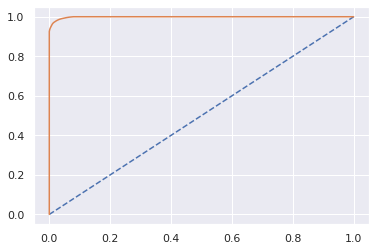

In [672]:
# predict probabilities
probs = best_grid_dtcl.predict_proba(x_train_bal)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(y_train_bal, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_train_bal, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)

### AUC and ROC for the test data

AUC: 0.915


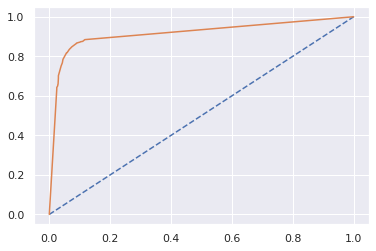

In [673]:
# predict probabilities
probs = best_grid_dtcl.predict_proba(x_test_treated2)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)

### Confusion Matrix for the training data

In [674]:
# create the confusion matrix
 
confusion_matrix(y_train_bal,ytrain_predict_dtcl)

array([[6455,  101],
       [ 185, 6371]])

In [675]:
#Train Data Accuracy
cart_train_acc=best_grid_dtcl.score(x_train_bal,y_train_bal)
cart_train_acc

0.9781879194630873

In [676]:
print(classification_report(y_train_bal, ytrain_predict_dtcl))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      6556
           1       0.98      0.97      0.98      6556

    accuracy                           0.98     13112
   macro avg       0.98      0.98      0.98     13112
weighted avg       0.98      0.98      0.98     13112



In [677]:
cart_metrics=classification_report(y_train_bal, ytrain_predict_dtcl,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_train_precision=round(df.loc["1"][0],2)
cart_train_recall=round(df.loc["1"][1],2)
cart_train_f1=round(df.loc["1"][2],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.98
cart_train_recall  0.97
cart_train_f1  0.98


### Confusion Matrix for test data

In [678]:
confusion_matrix(y_test, ytest_predict_dtcl)

array([[2682,  126],
       [ 123,  447]])

In [679]:
#Test Data Accuracy
cart_test_acc=best_grid_dtcl.score(x_test_treated2,y_test)
cart_test_acc

0.9262877442273535

In [680]:
print(classification_report(y_test, ytest_predict_dtcl))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2808
           1       0.78      0.78      0.78       570

    accuracy                           0.93      3378
   macro avg       0.87      0.87      0.87      3378
weighted avg       0.93      0.93      0.93      3378



In [681]:
cart_metrics=classification_report(y_test, ytest_predict_dtcl,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df.loc["1"][0],2)
cart_test_recall=round(df.loc["1"][1],2)
cart_test_f1=round(df.loc["1"][2],2)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)

cart_test_precision  0.78
cart_test_recall  0.78
cart_test_f1  0.78


# <font color = Green> <i>Building a Decision Tree Classifier on datset without less important features

In [682]:
x_train_new2=x_train_bal.drop(['coupon_used_for_payment','account_segment','Gender','Service_Score'],axis=1)
x_test_new=x_test_treated2.drop(['coupon_used_for_payment','account_segment','Gender','Service_Score'],axis=1)

In [683]:
param_grid_cart = {
    'criterion': ['gini'],
    'max_depth': [50], 
    'min_samples_leaf': [2,3,5], 
    'min_samples_split': [10,15],
}
 
dtcl = DecisionTreeClassifier(random_state=0)
 
grid_search_dtcl = GridSearchCV(estimator = dtcl, param_grid = param_grid_cart, cv = 10)

In [684]:
grid_search_dtcl.fit(x_train_new2, y_train_bal)
print(grid_search_dtcl.best_params_)
best_grid_dtcl = grid_search_dtcl.best_estimator_
best_grid_dtcl


{'criterion': 'gini', 'max_depth': 50, 'min_samples_leaf': 2, 'min_samples_split': 10}


DecisionTreeClassifier(max_depth=50, min_samples_leaf=2, min_samples_split=10,
                       random_state=0)

## Generating Tree

In [685]:
train_char_label = ['no', 'yes']
tree_regularized = open('tree_regularized.dot','w')
dot_data = tree.export_graphviz(best_grid_dtcl, out_file= tree_regularized , feature_names = list(x_train_new2), class_names = list(train_char_label))
 
tree_regularized.close()
files.download('tree_regularized.dot')
dot_data

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

http://webgraphviz.com/

## Variable Importance

In [686]:
print (pd.DataFrame(best_grid_dtcl.feature_importances_, columns = ["Imp"], index = x_train_new2.columns).sort_values('Imp',ascending=False))

                           Imp
Tenure                0.411289
Complain_ly           0.149082
Day_Since_CC_connect  0.059509
Marital_Status        0.054705
CC_Agent_Score        0.051334
rev_per_month         0.046214
City_Tier             0.042663
CC_Contacted_LY       0.038560
Payment               0.037361
cashback              0.036876
rev_growth_yoy        0.032101
Account_user_count    0.029723
Login_device          0.010584


## <font color="Green"> Predicting on Training and Test dataset using Cart model

In [687]:
# Predict both the train and test data
ytrain_predict_dtcl=best_grid_dtcl.predict(x_train_new2)
ytest_predict_dtcl=best_grid_dtcl.predict(x_test_new)

### Getting the Predicted Classes and Probs

In [688]:
ytest_predict_dtcl_prob=best_grid_dtcl.predict_proba(x_test_new)
pd.DataFrame(ytest_predict_dtcl_prob).head()

0    1
0  1.0  0.0
1  0.0  1.0
2  1.0  0.0
3  0.0  1.0
4  1.0  0.0

### Cart Model Evaluation

### AUC and ROC for the training data

AUC: 0.999


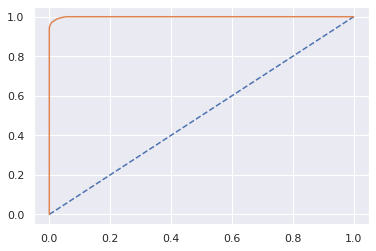

In [689]:
# predict probabilities
probs = best_grid_dtcl.predict_proba(x_train_new2)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(y_train_bal, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_train_bal, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr);

### AUC and ROC for the test data

AUC: 0.917


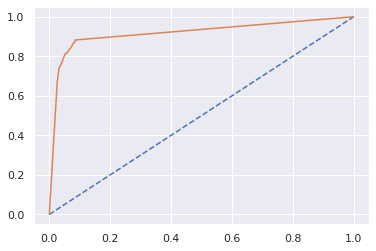

In [690]:
# predict probabilities
probs = best_grid_dtcl.predict_proba(x_test_new)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr);

### Confusion Matrix for the training data

In [691]:
# create the confusion matrix
 
confusion_matrix(y_train_bal,ytrain_predict_dtcl)

array([[6486,   70],
       [ 168, 6388]])

In [692]:
#Train Data Accuracy
cart_train_acc=best_grid_dtcl.score(x_train_new2,y_train_bal)
cart_train_acc

0.9818486882245272

In [693]:
print(classification_report(y_train_bal, ytrain_predict_dtcl))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      6556
           1       0.99      0.97      0.98      6556

    accuracy                           0.98     13112
   macro avg       0.98      0.98      0.98     13112
weighted avg       0.98      0.98      0.98     13112



In [694]:
cart_metrics=classification_report(y_train_bal, ytrain_predict_dtcl,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_train_precision=round(df.loc["1"][0],2)
cart_train_recall=round(df.loc["1"][1],2)
cart_train_f1=round(df.loc["1"][2],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.99
cart_train_recall  0.97
cart_train_f1  0.98


### Confusion Matrix for test data

In [695]:
confusion_matrix(y_test, ytest_predict_dtcl)

array([[2699,  109],
       [ 137,  433]])

In [696]:
#Test Data Accuracy
cart_test_acc=best_grid_dtcl.score(x_test_new,y_test)
cart_test_acc

0.9271758436944938

In [697]:
print(classification_report(y_test, ytest_predict_dtcl))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      2808
           1       0.80      0.76      0.78       570

    accuracy                           0.93      3378
   macro avg       0.88      0.86      0.87      3378
weighted avg       0.93      0.93      0.93      3378



In [698]:
cart_metrics=classification_report(y_test, ytest_predict_dtcl,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df.loc["1"][0],2)
cart_test_recall=round(df.loc["1"][1],2)
cart_test_f1=round(df.loc["1"][2],2)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)

cart_test_precision  0.8
cart_test_recall  0.76
cart_test_f1  0.78


# <font color = Green> <b>Building a Neural Network Classifier

In [699]:
x_train_scaled2 = sc.fit_transform(x_train_bal) 
x_test_scaled2=sc.fit(x_test_treated2) 

In [700]:
param_grid_ann = {
    'hidden_layer_sizes': [(150,100,100)],
    'activation': ['logistic', 'relu'],
    'solver': ['sgd', 'adam'],
    'tol': [0.01],
    'max_iter' : [100,200,500]
}
 
nncl = MLPClassifier()
 
grid_search_nncl = GridSearchCV(estimator = nncl, param_grid = param_grid_ann, cv = 3)

In [701]:
grid_search_nncl.fit(x_train_scaled2, y_train_bal)
grid_search_nncl.best_params_


{'activation': 'relu',
 'hidden_layer_sizes': (150, 100, 100),
 'max_iter': 100,
 'solver': 'adam',
 'tol': 0.01}

In [702]:
best_grid_mlp = grid_search_nncl.best_estimator_
best_grid_mlp

MLPClassifier(hidden_layer_sizes=(150, 100, 100), max_iter=100, tol=0.01)

## <font color="Green"> Predicting the Training and Testing data Using Artificial neural network

In [703]:
ytrain_predict_ann = best_grid_mlp.predict(x_train_scaled2)
ytest_predict_ann = best_grid_mlp.predict(x_test_scaled)

### NN Model Performance Evaluation on Training data

In [704]:
 confusion_matrix(y_train_bal,ytrain_predict_ann)

array([[6556,    0],
       [   0, 6556]])

In [705]:
nn_train_acc=best_grid_mlp.score(x_train_scaled2,y_train_bal) 
nn_train_acc

1.0

In [706]:
 print(classification_report(y_train_bal,ytrain_predict_ann))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6556
           1       1.00      1.00      1.00      6556

    accuracy                           1.00     13112
   macro avg       1.00      1.00      1.00     13112
weighted avg       1.00      1.00      1.00     13112



In [707]:
nn_metrics=classification_report(y_train_bal, ytrain_predict_ann,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(df.loc["1"][0],2)
nn_train_recall=round(df.loc["1"][1],2)
nn_train_f1=round(df.loc["1"][2],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

nn_train_precision  1.0
nn_train_recall  1.0
nn_train_f1  1.0


Area under Curve is 1.0


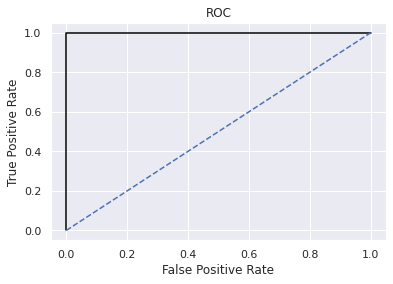

In [708]:
nn_train_fpr, nn_train_tpr,_=roc_curve(y_train_bal,best_grid_mlp.predict_proba(x_train_scaled2)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_train_auc=roc_auc_score(y_train_bal,best_grid_mlp.predict(x_train_scaled2))
print('Area under Curve is', nn_train_auc)

### NN Model Performance Evaluation on Test data

In [709]:
confusion_matrix(y_test,ytest_predict_ann)

array([[2377,  431],
       [  27,  543]])

In [710]:
nn_test_acc=best_grid_mlp.score(x_test_scaled,y_test)
nn_test_acc

0.8644168146832445

In [711]:
print(classification_report(y_test,ytest_predict_ann))

              precision    recall  f1-score   support

           0       0.99      0.85      0.91      2808
           1       0.56      0.95      0.70       570

    accuracy                           0.86      3378
   macro avg       0.77      0.90      0.81      3378
weighted avg       0.92      0.86      0.88      3378



In [712]:
nn_metrics=classification_report(y_test, ytest_predict_ann,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(df.loc["1"][0],2)
nn_test_recall=round(df.loc["1"][1],2)
nn_test_f1=round(df.loc["1"][2],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

nn_test_precision  0.56
nn_test_recall  0.95
nn_test_f1  0.7


Area under Curve is 0.89957077522867


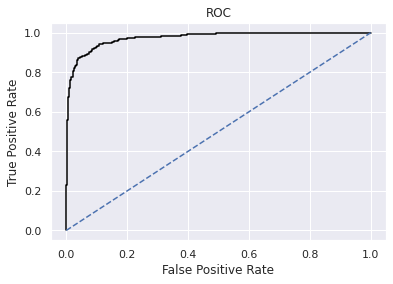

In [713]:
nn_test_fpr, nn_test_tpr,_=roc_curve(y_test,best_grid_mlp.predict_proba(x_test_scaled)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_test_auc=roc_auc_score(y_test,best_grid_mlp.predict(x_test_scaled))
print('Area under Curve is', nn_test_auc)

In [714]:
best_grid_mlp.score

<bound method ClassifierMixin.score of MLPClassifier(hidden_layer_sizes=(150, 100, 100), max_iter=100, tol=0.01)>

# <font color = Green> <b> Building Logistic Regression model

In [715]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs','newton-cg','saga'],
      'tol':[0.001,0.0001]}

In [716]:
model = LogisticRegression(max_iter=10000,n_jobs=-1,random_state=1,)

In [717]:
grid_search_lr = GridSearchCV(estimator = model, param_grid = grid, cv = 8,n_jobs=-1,scoring='f1')

In [718]:
grid_search_lr.fit(x_train_bal, y_train_bal)



GridSearchCV(cv=8,
             estimator=LogisticRegression(max_iter=10000, n_jobs=-1,
                                          random_state=1),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'],
                         'solver': ['sag', 'lbfgs', 'newton-cg', 'saga'],
                         'tol': [0.001, 0.0001]},
             scoring='f1')

In [719]:
print(grid_search_lr.best_params_,'\n')
print(grid_search_lr.best_estimator_)

{'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.001} 

LogisticRegression(max_iter=10000, n_jobs=-1, random_state=1, tol=0.001)


In [720]:
best_model_lr = grid_search_lr.best_estimator_

In [721]:
# Prediction on the training set

ytrain_predict_lr = best_model_lr.predict(x_train_bal)
ytest_predict_lr = best_model_lr.predict(x_test_treated2)

In [722]:
## Getting the probabilities on the test set

ytest_predict_lr_prob=best_model_lr.predict_proba(x_test_treated2)
pd.DataFrame(ytest_predict_lr_prob).head()

0         1
0  0.239950  0.760050
1  0.172206  0.827794
2  0.676322  0.323678
3  0.397847  0.602153
4  0.934497  0.065503

#### <font color="red">*Checking Performance matrix for Logistic Regression Model*

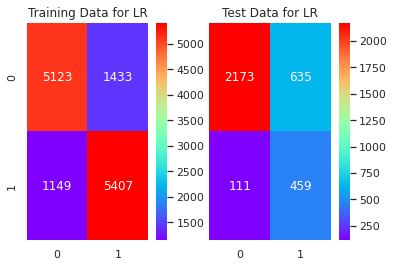

In [723]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train_bal,ytrain_predict_lr)),annot=True,fmt='.5g',cmap='rainbow',ax=a[0][0]);
a[0][0].set_title('Training Data for LR')

#Plotting confusion matrix for the different models for the Test Data

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict_lr)),annot=True,fmt='.5g',cmap='rainbow',ax=a[0][1]);
a[0][1].set_title('Test Data for LR');

In [724]:
## Classification Report on the training data
print('Classification Report of the training data of Logisitic Regression Model:\n\n',classification_report(y_train_bal, ytrain_predict_lr),'\n');

Classification Report of the training data of Logisitic Regression Model:

               precision    recall  f1-score   support

           0       0.82      0.78      0.80      6556
           1       0.79      0.82      0.81      6556

    accuracy                           0.80     13112
   macro avg       0.80      0.80      0.80     13112
weighted avg       0.80      0.80      0.80     13112
 



In [725]:
# Accuracy - Train Data
lr_train_acc=best_model_lr.score(x_train_bal, y_train_bal)
lr_train_acc

0.8030811470408786

In [726]:
lr_train_metrics=classification_report(y_train_bal, ytrain_predict_lr,output_dict=True)
df=pd.DataFrame(lr_train_metrics).transpose()
lr_train_precision=round(df.loc["1"][0],2)
lr_train_recall=round(df.loc["1"][1],2)
lr_train_f1=round(df.loc["1"][2],2)
print ('lr_train_precision ',lr_train_precision)
print ('lr_train_recall ',lr_train_recall)
print ('lr_train_f1 ',lr_train_f1)

lr_train_precision  0.79
lr_train_recall  0.82
lr_train_f1  0.81


In [727]:
## Classification Report on the test data
print('Classification Report of the test data of Logisitic Regression Model:\n\n',classification_report(y_test, ytest_predict_lr));

Classification Report of the test data of Logisitic Regression Model:

               precision    recall  f1-score   support

           0       0.95      0.77      0.85      2808
           1       0.42      0.81      0.55       570

    accuracy                           0.78      3378
   macro avg       0.69      0.79      0.70      3378
weighted avg       0.86      0.78      0.80      3378



In [728]:
# Accuracy - Test Data
lr_test_acc=best_model_lr.score(x_test_treated2, y_test)
lr_test_acc

0.7791592658377738

In [729]:
lr_test_metrics=classification_report(y_test, ytest_predict_lr,output_dict=True)
df=pd.DataFrame(lr_test_metrics).transpose()
lr_test_precision=round(df.loc["1"][0],2)
lr_test_recall=round(df.loc["1"][1],2)
lr_test_f1=round(df.loc["1"][2],2)
print ('lr_test_precision ',lr_test_precision)
print ('lr_test_recall ',lr_test_recall)
print ('lr_test_f1 ',lr_test_f1)

lr_test_precision  0.42
lr_test_recall  0.81
lr_test_f1  0.55


#### <font color="red"> *AUC and ROC for the training data on Logistic Regression Model*

AUC for Logisitic Regression Train Data: 0.875


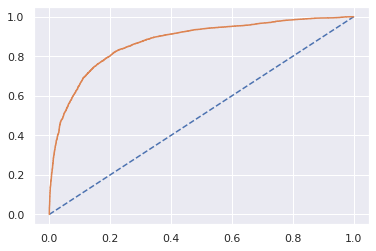

In [730]:
# predict probabilities
probs = best_model_lr.predict_proba(x_train_bal)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_train_auc = roc_auc_score(y_train_bal, probs)
print('AUC for Logisitic Regression Train Data: %.3f' % lr_train_auc)
# calculate roc curve
lr_train_fpr, lr_train_tpr, lr_train_thresholds = roc_curve(y_train_bal, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lr_train_fpr, lr_train_tpr);

#### <font color="red">*AUC and ROC for the test data on Logistic Regression Model*

AUC for Logistic Regression Test Data: 0.866


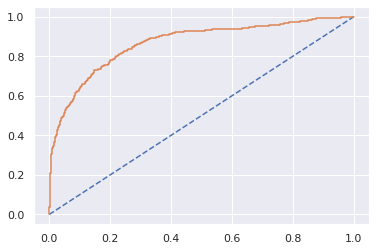

In [731]:
# predict probabilities
probs = best_model_lr.predict_proba(x_test_treated2)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_test_auc = roc_auc_score(y_test, probs)
print('AUC for Logistic Regression Test Data: %.3f' % lr_test_auc)
# calculate roc curve
lr_test_fpr, lr_test_tpr, lr_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lr_test_fpr, lr_test_tpr);

#### <font color="red"> *Getting co-efficients and Intercepts of Logisitic regression Model*

In [732]:
model_lr = LogisticRegression(max_iter=10000,n_jobs=2,random_state=1,penalty='l2', solver= 'saga', tol= 0.0001)

In [733]:
model_lr.fit(x_train_bal, y_train_bal)

LogisticRegression(max_iter=10000, n_jobs=2, random_state=1, solver='saga')

In [734]:
model_lr.coef_

array([[-0.15059617,  0.35794124,  0.01725755, -0.12610661,  0.11265819,
        -0.21526895,  0.34047634, -0.47891269,  0.25869008,  0.40608317,
         0.12099486,  1.65992338, -0.04080624,  0.2038817 , -0.09383929,
        -0.00479517, -0.18681282]])

In [735]:
model_lr.intercept_

array([-0.37489381])

In [736]:
#Performance outcomes of Logistic Regression Model
model_param_lr_train=lr_train_acc,lr_train_auc,lr_train_recall,lr_train_precision,lr_train_f1
model_param_lr_test=lr_test_acc,lr_test_auc,lr_test_recall,lr_test_precision,lr_test_f1
print(model_param_lr_train)
print(model_param_lr_test)

(0.8030811470408786, 0.8745883542957078, 0.82, 0.79, 0.81)
(0.7791592658377738, 0.8661924576398261, 0.81, 0.42, 0.55)


# <font color = Green> <b> **Building a KNN Model**

In [737]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_scaled2, y_train_bal)
    # evaluate test accuracy
    scores = knn.score(x_test_scaled, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.043220840734162214,
 0.035820011841326216,
 0.07430432208407345,
 0.06394316163410307,
 0.10746003552397865,
 0.09650680876258144,
 0.1346950858496152,
 0.12433392539964472,
 0.15896980461811727,
 0.14446417998815864,
 0.17939609236234455,
 0.1660746003552398,
 0.2030787448194198,
 0.1882770870337478,
 0.21343990526939016,
 0.2030787448194198,
 0.22824156305506216,
 0.21521610420367077,
 0.23771462403789223]

#### <font color = "Blue"> *Plotting misclassification error vs k (with k value on X-axis)*

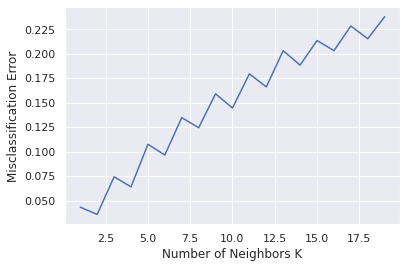

In [738]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,1), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

#### <font color = "Navy Blue"> *From the above graph the optimal value of k comes out to be 2

In [739]:
Model_knn=KNeighborsClassifier(n_neighbors=2)
Model_knn.fit(x_train_scaled2,y_train_bal)

KNeighborsClassifier(n_neighbors=2)

In [740]:
ytrain_predict_knn = Model_knn.predict(x_train_scaled2)
ytest_predict_knn = Model_knn.predict(x_test_scaled)

#### <font color="red">***Checking Performance matrix, AUC and ROC for KNN Model***

#### <font color="red">*Checking Performance matrix for KNN Model*

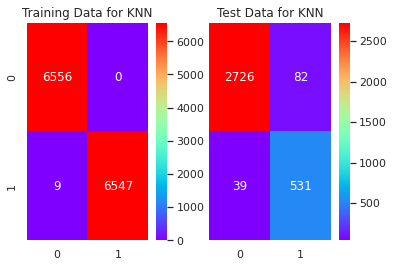

In [741]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the KNN model for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train_bal,ytrain_predict_knn)),annot=True,fmt='.5g',cmap='rainbow',ax=a[0][0]);
a[0][0].set_title('Training Data for KNN')

#Plotting confusion matrix for the KNN model for the Test Data

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict_knn)),annot=True,fmt='.5g',cmap='rainbow',ax=a[0][1]);
a[0][1].set_title('Test Data for KNN');

In [742]:
## Classification Report on the train data
print('Classification Report of the train data of KNN Model:\n\n',classification_report(y_train_bal, ytrain_predict_knn));

Classification Report of the train data of KNN Model:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6556
           1       1.00      1.00      1.00      6556

    accuracy                           1.00     13112
   macro avg       1.00      1.00      1.00     13112
weighted avg       1.00      1.00      1.00     13112



In [743]:
# Accuracy - Train Data
knn_train_acc=Model_knn.score(x_train_scaled2, y_train_bal)
knn_train_acc

0.9993136058572301

In [744]:
knn_train_metrics=classification_report(y_train_bal, ytrain_predict_knn,output_dict=True)
df_knn=pd.DataFrame(knn_train_metrics).transpose()
knn_train_precision=round(df_knn.loc["1"][0],2)
knn_train_recall=round(df_knn.loc["1"][1],2)
knn_train_f1=round(df_knn.loc["1"][2],2)
print ('knn_train_precision ',knn_train_precision)
print ('knn_train_recall ',knn_train_recall)
print ('knn_train_f1 ',knn_train_f1)

knn_train_precision  1.0
knn_train_recall  1.0
knn_train_f1  1.0


In [745]:
## Classification Report on the test data
print('Classification Report of the test data of KNN Model:\n\n',classification_report(y_test, ytest_predict_knn));


Classification Report of the test data of KNN Model:

               precision    recall  f1-score   support

           0       0.99      0.97      0.98      2808
           1       0.87      0.93      0.90       570

    accuracy                           0.96      3378
   macro avg       0.93      0.95      0.94      3378
weighted avg       0.97      0.96      0.96      3378



In [746]:
# Accuracy - Test Data
knn_test_acc=Model_knn.score(x_test_scaled, y_test)
knn_test_acc

0.9641799881586738

In [747]:
knn_test_metrics=classification_report(y_test, ytest_predict_knn,output_dict=True)
df_knn_t=pd.DataFrame(knn_test_metrics).transpose()
knn_test_precision=round(df_knn_t.loc["1"][0],2)
knn_test_recall=round(df_knn_t.loc["1"][1],2)
knn_test_f1=round(df_knn_t.loc["1"][2],2)
print ('knn_test_precision ',knn_test_precision)
print ('knn_test_recall ',knn_test_recall)
print ('knn_test_f1 ',knn_test_f1)

knn_test_precision  0.87
knn_test_recall  0.93
knn_test_f1  0.9


#### <font color="red"> *AUC and ROC for the training data on KNN Model*

AUC for KNN Train Data: 1.000


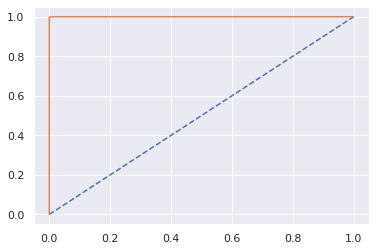

In [748]:
# predict probabilities
probs_knn_tr = Model_knn.predict_proba(x_train_scaled2)
# keep probabilities for the positive outcome only
probs_knn_tr = probs_knn_tr[:, 1]
# calculate AUC
knn_train_auc = roc_auc_score(y_train_bal, probs_knn_tr)
print('AUC for KNN Train Data: %.3f' % knn_train_auc)
# calculate roc curve
knn_train_fpr, knn_train_tpr, knn_train_thresholds = roc_curve(y_train_bal, probs_knn_tr)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knn_train_fpr, knn_train_tpr);

#### <font color="red">*AUC and ROC for the test data on KNN Model*

AUC for KNN Test Data: 0.964


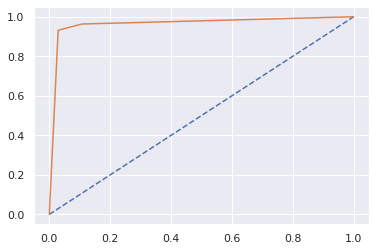

In [749]:
# predict probabilities
probs_knn_t = Model_knn.predict_proba(x_test_scaled)
# keep probabilities for the positive outcome only
probs_knn_t = probs_knn_t[:, 1]
# calculate AUC
knn_test_auc = roc_auc_score(y_test, probs_knn_t)
print('AUC for KNN Test Data: %.3f' % knn_test_auc)
# calculate roc curve
knn_test_fpr, knn_test_tpr, knn_test_thresholds = roc_curve(y_test, probs_knn_t)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knn_test_fpr, knn_test_tpr);

In [750]:
#Performance outcomes of KNN Model
model_param_knn_train=knn_train_acc,knn_train_auc,knn_train_recall,knn_train_precision,knn_train_f1
model_param_knn_test=knn_test_acc,knn_test_auc,knn_test_recall,knn_test_precision,knn_test_f1
print(model_param_knn_train)
print(model_param_knn_test)

(0.9993136058572301, 0.9999829343738146, 1.0, 1.0, 1.0)
(0.9641799881586738, 0.9638485904933274, 0.93, 0.87, 0.9)


# <font color = Green> <b>Trying smote dataset on Enseamble models

# <font color = Green> <b> Building a Random Forest Classifier

Due to large volume of data, trying for different parameter values in the gridsearch with higher cv value will lead to performance issues and model will run for much longer time

In [751]:
from sklearn.model_selection import GridSearchCV
 
param_grid_rfcl = {
    'max_depth': [40],
    'max_features': [8,9],
    'min_samples_leaf': [4,5], 
    'min_samples_split': [12,15],
    'n_estimators': [150,160]
}
 
rfcl = RandomForestClassifier()
 
grid_search_rfcl = GridSearchCV(estimator = rfcl, param_grid = param_grid_rfcl, cv = 3)

In [752]:
grid_search_rfcl.fit(x_train_bal, y_train_bal)


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [40], 'max_features': [8, 9],
                         'min_samples_leaf': [4, 5],
                         'min_samples_split': [12, 15],
                         'n_estimators': [150, 160]})

In [753]:
grid_search_rfcl.best_params_

{'max_depth': 40,
 'max_features': 8,
 'min_samples_leaf': 4,
 'min_samples_split': 12,
 'n_estimators': 160}

In [754]:
best_grid_rfcl = grid_search_rfcl.best_estimator_

In [755]:
best_grid_rfcl

RandomForestClassifier(max_depth=40, max_features=8, min_samples_leaf=4,
                       min_samples_split=12, n_estimators=160)

## <font color="Green"> Predicting the Training and Testing data using Random Forest Classifcation

In [756]:
ytrain_predict_rf = best_grid_rfcl.predict(x_train_bal)
ytest_predict_rf = best_grid_rfcl.predict(x_test_treated2)

## RF Model Performance Evaluation on Training data

In [757]:
confusion_matrix(y_train_bal,ytrain_predict_rf)

array([[6483,   73],
       [  58, 6498]])

In [758]:
rf_train_acc=best_grid_rfcl.score(x_train_bal,y_train_bal) 
rf_train_acc

0.9900091519219036

In [759]:
print(classification_report(y_train_bal,ytrain_predict_rf))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6556
           1       0.99      0.99      0.99      6556

    accuracy                           0.99     13112
   macro avg       0.99      0.99      0.99     13112
weighted avg       0.99      0.99      0.99     13112



In [760]:
rf_metrics=classification_report(y_train_bal, ytrain_predict_rf,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][0],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_f1=round(df.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.99
rf_train_recall  0.99
rf_train_f1  0.99


Area under Curve is 0.9900091519219036


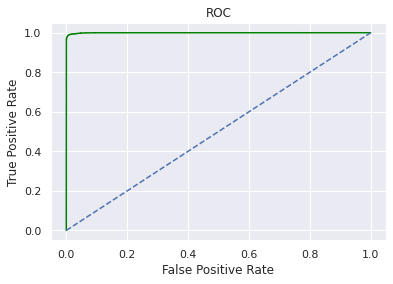

In [761]:
rf_train_fpr, rf_train_tpr,_=roc_curve(y_train_bal,best_grid_rfcl.predict_proba(x_train_bal)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(y_train_bal,best_grid_rfcl.predict(x_train_bal))
print('Area under Curve is', rf_train_auc)

## RF Model Performance Evaluation on Test data

In [762]:
confusion_matrix(y_test,ytest_predict_rf)

array([[2718,   90],
       [  86,  484]])

In [763]:
rf_test_acc=best_grid_rfcl.score(x_test_treated2,y_test)
rf_test_acc

0.9478981645944345

In [764]:
print(classification_report(y_test,ytest_predict_rf))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2808
           1       0.84      0.85      0.85       570

    accuracy                           0.95      3378
   macro avg       0.91      0.91      0.91      3378
weighted avg       0.95      0.95      0.95      3378



In [765]:
rf_metrics=classification_report(y_test, ytest_predict_rf,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.iloc[1][0],2)
rf_test_recall=round(df.iloc[1][1],2)
rf_test_f1=round(df.iloc[1][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.84
rf_test_recall  0.85
rf_test_f1  0.85


Area under Curve is 0.908535762483131


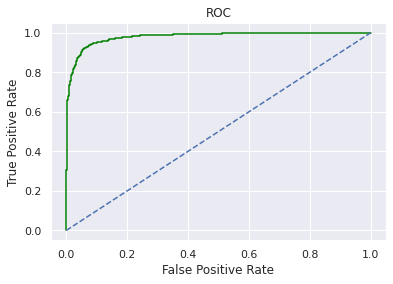

In [766]:
rf_test_fpr, rf_test_tpr,_=roc_curve(y_test,best_grid_rfcl.predict_proba(x_test_treated2)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(y_test,best_grid_rfcl.predict(x_test_treated2))
print('Area under Curve is', rf_test_auc)

In [767]:
# Variable Importance
print (pd.DataFrame(best_grid_rfcl.feature_importances_, columns = ["Imp"], index = x_train_bal.columns).sort_values('Imp',ascending=False))

                              Imp
Tenure                   0.329016
Complain_ly              0.175648
Marital_Status           0.067350
account_segment          0.060997
CC_Agent_Score           0.052090
Day_Since_CC_connect     0.044009
rev_per_month            0.041046
City_Tier                0.039661
CC_Contacted_LY          0.031898
cashback                 0.030220
rev_growth_yoy           0.028556
Payment                  0.027473
Account_user_count       0.019889
Gender                   0.015484
coupon_used_for_payment  0.014795
Login_device             0.014390
Service_Score            0.007479


## <font color = Green> <i> Building a Random Forest Classifier without unwanted features

In [768]:
x_train_new2=x_train_bal.drop(['coupon_used_for_payment','Login_device','Gender','Service_Score'],axis=1)
x_test_new=x_test_treated2.drop(['coupon_used_for_payment','Login_device','Gender','Service_Score'],axis=1)

In [769]:
x_train_new2.shape

(13112, 13)

Due to large volume of data, trying for different parameter values in the gridsearch with higher cv value will lead to performance issues and model will run for much longer time

In [770]:
from sklearn.model_selection import GridSearchCV
 
param_grid_rfcl = {
    'max_depth': [40],
    'max_features': [8,9],
    'min_samples_leaf': [4,5], 
    'min_samples_split': [12,15],
    'n_estimators': [150,160]
}
 
rfcl = RandomForestClassifier()
 
grid_search_rfcl = GridSearchCV(estimator = rfcl, param_grid = param_grid_rfcl, cv = 3)

In [771]:
grid_search_rfcl.fit(x_train_new2, y_train_bal)


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [40], 'max_features': [8, 9],
                         'min_samples_leaf': [4, 5],
                         'min_samples_split': [12, 15],
                         'n_estimators': [150, 160]})

In [772]:
grid_search_rfcl.best_params_

{'max_depth': 40,
 'max_features': 8,
 'min_samples_leaf': 4,
 'min_samples_split': 12,
 'n_estimators': 150}

In [773]:
best_grid_rfcl = grid_search_rfcl.best_estimator_

In [774]:
best_grid_rfcl

RandomForestClassifier(max_depth=40, max_features=8, min_samples_leaf=4,
                       min_samples_split=12, n_estimators=150)

## <font color="Green"> Predicting the Training and Testing data using Random Forest Classifcation

In [775]:
ytrain_predict_rf = best_grid_rfcl.predict(x_train_new2)
ytest_predict_rf = best_grid_rfcl.predict(x_test_new)

## RF Model Performance Evaluation on Training data

In [776]:
confusion_matrix(y_train_bal,ytrain_predict_rf)

array([[6472,   84],
       [  70, 6486]])

In [777]:
rf_train_acc=best_grid_rfcl.score(x_train_new2,y_train_bal) 
rf_train_acc

0.988255033557047

In [778]:
print(classification_report(y_train_bal,ytrain_predict_rf))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6556
           1       0.99      0.99      0.99      6556

    accuracy                           0.99     13112
   macro avg       0.99      0.99      0.99     13112
weighted avg       0.99      0.99      0.99     13112



In [779]:
rf_metrics=classification_report(y_train_bal, ytrain_predict_rf,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
df.head()

precision    recall  f1-score       support
0              0.989300  0.987187  0.988242   6556.000000
1              0.987215  0.989323  0.988268   6556.000000
accuracy       0.988255  0.988255  0.988255      0.988255
macro avg      0.988257  0.988255  0.988255  13112.000000
weighted avg   0.988257  0.988255  0.988255  13112.000000

In [780]:
rf_metrics=classification_report(y_train_bal, ytrain_predict_rf,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][0],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_f1=round(df.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.99
rf_train_recall  0.99
rf_train_f1  0.99


Area under Curve is 0.988255033557047


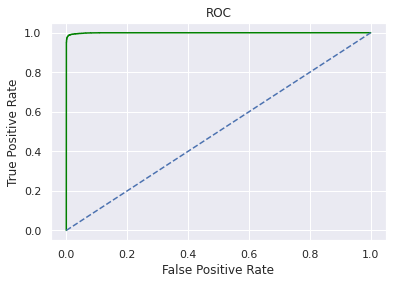

In [781]:
rf_train_fpr, rf_train_tpr,_=roc_curve(y_train_bal,best_grid_rfcl.predict_proba(x_train_new2)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(y_train_bal,best_grid_rfcl.predict(x_train_new2))
print('Area under Curve is', rf_train_auc)

## RF Model Performance Evaluation on Test data

In [782]:
confusion_matrix(y_test,ytest_predict_rf)

array([[2712,   96],
       [  82,  488]])

In [783]:
rf_test_acc=best_grid_rfcl.score(x_test_new,y_test)
rf_test_acc

0.9473060982830077

In [784]:
print(classification_report(y_test,ytest_predict_rf))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2808
           1       0.84      0.86      0.85       570

    accuracy                           0.95      3378
   macro avg       0.90      0.91      0.91      3378
weighted avg       0.95      0.95      0.95      3378



In [785]:
rf_metrics=classification_report(y_test, ytest_predict_rf,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.iloc[1][0],2)
rf_test_recall=round(df.iloc[1][1],2)
rf_test_f1=round(df.iloc[1][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.84
rf_test_recall  0.86
rf_test_f1  0.85


Area under Curve is 0.9109761583445793


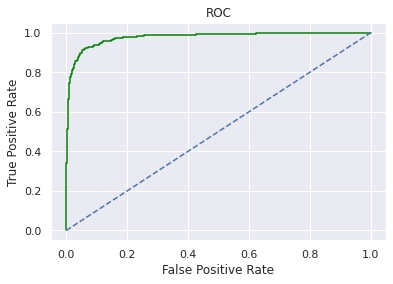

In [786]:
rf_test_fpr, rf_test_tpr,_=roc_curve(y_test,best_grid_rfcl.predict_proba(x_test_new)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(y_test,best_grid_rfcl.predict(x_test_new))
print('Area under Curve is', rf_test_auc)

In [787]:
# Variable Importance
print (pd.DataFrame(best_grid_rfcl.feature_importances_, columns = ["Imp"], index = x_train_new2.columns).sort_values('Imp',ascending=False))

                           Imp
Tenure                0.374551
Complain_ly           0.169380
Marital_Status        0.059439
CC_Agent_Score        0.059052
account_segment       0.052604
Day_Since_CC_connect  0.046174
rev_per_month         0.045657
City_Tier             0.039287
CC_Contacted_LY       0.034359
rev_growth_yoy        0.033893
Payment               0.032496
cashback              0.032239
Account_user_count    0.020870


# <font color = Green> <b> **Building Ada Boost Model**

In [788]:
Model_adb = AdaBoostClassifier(n_estimators=15,random_state=1,learning_rate=0.001)
Model_adb.fit(x_train_bal,y_train_bal)


AdaBoostClassifier(learning_rate=0.001, n_estimators=15, random_state=1)

In [789]:
ytrain_predict_adb = Model_adb.predict(x_train_bal)
ytest_predict_adb = Model_adb.predict(x_test_treated2)

#### <font color="red">***Checking Performance matrix, AUC and ROC for AdaBoosting Model***

#### <font color="red">*Checking Performance matrix for AdaBoosting Model*

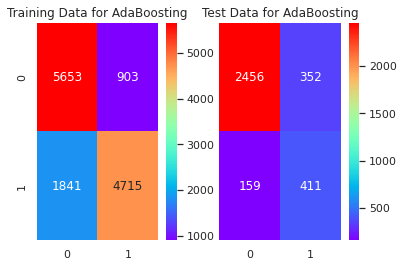

In [790]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the AdaBoosting model for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train_bal,ytrain_predict_adb)),annot=True,fmt='.5g',cmap='rainbow',ax=a[0][0]);
a[0][0].set_title('Training Data for AdaBoosting')

#Plotting confusion matrix for the AdaBoosting model for the Test Data

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict_adb)),annot=True,fmt='.5g',cmap='rainbow',ax=a[0][1]);
a[0][1].set_title('Test Data for AdaBoosting');

In [791]:
## Classification Report on the train data
print('Classification Report of the train data of AdaBoosting Model:\n\n',classification_report(y_train_bal, ytrain_predict_adb));

Classification Report of the train data of AdaBoosting Model:

               precision    recall  f1-score   support

           0       0.75      0.86      0.80      6556
           1       0.84      0.72      0.77      6556

    accuracy                           0.79     13112
   macro avg       0.80      0.79      0.79     13112
weighted avg       0.80      0.79      0.79     13112



In [792]:
# Accuracy - Train Data
adb_train_acc=Model_adb.score(x_train_bal, y_train_bal)
adb_train_acc

0.7907260524710189

In [793]:
adb_train_metrics=classification_report(y_train_bal, ytrain_predict_adb,output_dict=True)
df_adb=pd.DataFrame(adb_train_metrics).transpose()
adb_train_precision=round(df_adb.loc["1"][0],2)
adb_train_recall=round(df_adb.loc["1"][1],2)
adb_train_f1=round(df_adb.loc["1"][2],2)
print ('adb_train_precision ',adb_train_precision)
print ('adb_train_recall ',adb_train_recall)
print ('adb_train_f1 ',adb_train_f1)

adb_train_precision  0.84
adb_train_recall  0.72
adb_train_f1  0.77


In [794]:
## Classification Report on the test data
print('Classification Report of the test data of AdaBoosting Model:\n\n',classification_report(y_test, ytest_predict_adb));


Classification Report of the test data of AdaBoosting Model:

               precision    recall  f1-score   support

           0       0.94      0.87      0.91      2808
           1       0.54      0.72      0.62       570

    accuracy                           0.85      3378
   macro avg       0.74      0.80      0.76      3378
weighted avg       0.87      0.85      0.86      3378



In [795]:
# Accuracy - Test Data
adb_test_acc=Model_adb.score(x_test_treated2, y_test)
adb_test_acc

0.8487270574304322

In [796]:
adb_test_metrics=classification_report(y_test, ytest_predict_adb,output_dict=True)
df_adb_t=pd.DataFrame(adb_test_metrics).transpose()
adb_test_precision=round(df_adb_t.loc["1"][0],2)
adb_test_recall=round(df_adb_t.loc["1"][1],2)
adb_test_f1=round(df_adb_t.loc["1"][2],2)
print ('adb_test_precision ',adb_test_precision)
print ('adb_test_recall ',adb_test_recall)
print ('adb_test_f1 ',adb_test_f1)

adb_test_precision  0.54
adb_test_recall  0.72
adb_test_f1  0.62


#### <font color="red"> *AUC and ROC for the training data on AdaBoosting Model*

AUC for AdaBoosting Train Data: 0.791


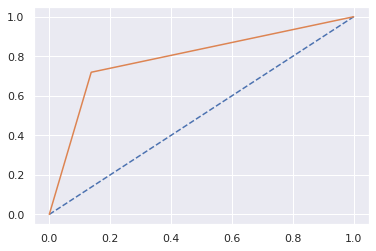

In [797]:
# predict probabilities
probs_adb_tr = Model_adb.predict_proba(x_train_bal)
# keep probabilities for the positive outcome only
probs_adb_tr = probs_adb_tr[:, 1]
# calculate AUC
adb_train_auc = roc_auc_score(y_train_bal, probs_adb_tr)
print('AUC for AdaBoosting Train Data: %.3f' % adb_train_auc)
# calculate roc curve
adb_train_fpr, adb_train_tpr, adb_train_thresholds = roc_curve(y_train_bal, probs_adb_tr)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(adb_train_fpr, adb_train_tpr);

#### <font color="red">*AUC and ROC for the test data on AdaBoosting Model*





AUC for AdaBoosting Test Data: 0.798


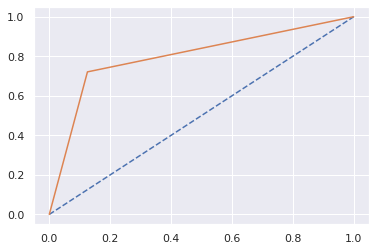

In [798]:
# predict probabilities
probs_adb_t = Model_adb.predict_proba(x_test_treated2)
# keep probabilities for the positive outcome only
probs_adb_t = probs_adb_t[:, 1]
# calculate AUC
adb_test_auc = roc_auc_score(y_test, probs_adb_t)
print('AUC for AdaBoosting Test Data: %.3f' % adb_test_auc)
# calculate roc curve
adb_test_fpr, adb_test_tpr, adb_test_thresholds = roc_curve(y_test, probs_adb_t)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(adb_test_fpr, adb_test_tpr);

In [799]:
model_param_adb_train=adb_train_acc,adb_train_auc,adb_train_recall,adb_train_precision,adb_train_f1
model_param_adb_test=adb_test_acc,adb_test_auc,adb_test_recall,adb_test_precision,adb_test_f1
print(model_param_adb_train)
print(model_param_adb_test)

(0.7907260524710189, 0.7907260524710189, 0.72, 0.84, 0.77)
(0.8487270574304322, 0.797848253111411, 0.72, 0.54, 0.62)


In [800]:
# Variable Importance
print (pd.DataFrame(Model_adb.feature_importances_, columns = ["Imp"], index = x_train_bal.columns).sort_values('Imp',ascending=False))

                         Imp
Tenure                   1.0
Marital_Status           0.0
cashback                 0.0
Day_Since_CC_connect     0.0
coupon_used_for_payment  0.0
rev_growth_yoy           0.0
Complain_ly              0.0
rev_per_month            0.0
CC_Agent_Score           0.0
City_Tier                0.0
account_segment          0.0
Account_user_count       0.0
Service_Score            0.0
Gender                   0.0
Payment                  0.0
CC_Contacted_LY          0.0
Login_device             0.0


# <font color = Green> <b> **Building Gradient Boosting Model**

In [801]:
from sklearn.ensemble import GradientBoostingClassifier
Model_gbcl = GradientBoostingClassifier(random_state=1,learning_rate=0.1, n_estimators=5000)
Model_gbcl = Model_gbcl.fit(x_train_bal, y_train_bal)

In [802]:
ytrain_predict_gbcl = Model_gbcl.predict(x_train_bal)
ytest_predict_gbcl = Model_gbcl.predict(x_test_treated2)


#### <font color="red">***Checking Performance matrix, AUC and ROC for Gradient Boosting Model***

#### <font color="red">*Checking Performance matrix for Gradient Boosting Model*

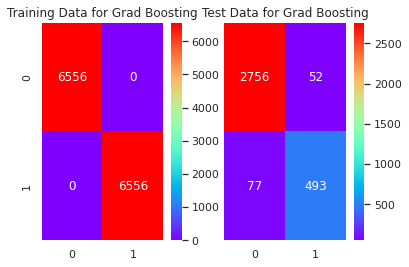

In [803]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the Gradient Boosting model for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train_bal,ytrain_predict_gbcl)),annot=True,fmt='.5g',cmap='rainbow',ax=a[0][0]);
a[0][0].set_title('Training Data for Grad Boosting')

#Plotting confusion matrix for the Gradient Boosting model for the Test Data

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict_gbcl)),annot=True,fmt='.5g',cmap='rainbow',ax=a[0][1]);
a[0][1].set_title('Test Data for Grad Boosting');

In [804]:
## Classification Report on the train data
print('Classification Report of the train data of Gradient Boosting Model:\n\n',classification_report(y_train_bal, ytrain_predict_gbcl));

Classification Report of the train data of Gradient Boosting Model:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6556
           1       1.00      1.00      1.00      6556

    accuracy                           1.00     13112
   macro avg       1.00      1.00      1.00     13112
weighted avg       1.00      1.00      1.00     13112



In [805]:
# Accuracy - Train Data
gbcl_train_acc=Model_gbcl.score(x_train_bal, y_train_bal)
gbcl_train_acc

1.0

In [806]:
gbcl_train_metrics=classification_report(y_train_bal, ytrain_predict_gbcl,output_dict=True)
df_gbcl=pd.DataFrame(gbcl_train_metrics).transpose()
gbcl_train_precision=round(df_gbcl.loc["1"][0],2)
gbcl_train_recall=round(df_gbcl.loc["1"][1],2)
gbcl_train_f1=round(df_gbcl.loc["1"][2],2)
print ('gbcl_train_precision ',gbcl_train_precision)
print ('gbcl_train_recall ',gbcl_train_recall)
print ('gbcl_train_f1 ',gbcl_train_f1)

gbcl_train_precision  1.0
gbcl_train_recall  1.0
gbcl_train_f1  1.0


In [807]:
## Classification Report on the test data
print('Classification Report of the test data of Gradient Boosting Model:\n\n',classification_report(y_test, ytest_predict_gbcl));


Classification Report of the test data of Gradient Boosting Model:

               precision    recall  f1-score   support

           0       0.97      0.98      0.98      2808
           1       0.90      0.86      0.88       570

    accuracy                           0.96      3378
   macro avg       0.94      0.92      0.93      3378
weighted avg       0.96      0.96      0.96      3378



In [808]:
# Accuracy - Test Data
gbcl_test_acc=Model_gbcl.score(x_test_treated2, y_test)
gbcl_test_acc

0.9618117229129662

In [809]:
gbcl_test_metrics=classification_report(y_test, ytest_predict_gbcl,output_dict=True)
df_gbcl_t=pd.DataFrame(gbcl_test_metrics).transpose()
gbcl_test_precision=round(df_gbcl_t.loc["1"][0],2)
gbcl_test_recall=round(df_gbcl_t.loc["1"][1],2)
gbcl_test_f1=round(df_gbcl_t.loc["1"][2],2)
print ('gbcl_test_precision ',gbcl_test_precision)
print ('gbcl_test_recall ',gbcl_test_recall)
print ('gbcl_test_f1 ',gbcl_test_f1)

gbcl_test_precision  0.9
gbcl_test_recall  0.86
gbcl_test_f1  0.88


#### <font color="red"> *AUC and ROC for the training data on Gradient Boosting Model*

AUC for Gradient Train Data: 1.000


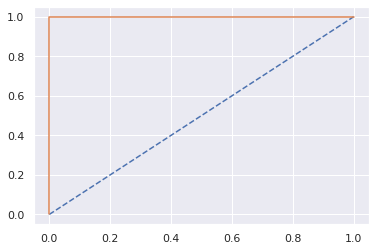

In [810]:
# predict probabilities
probs_gbcl_tr = Model_gbcl.predict_proba(x_train_bal)
# keep probabilities for the positive outcome only
probs_gbcl_tr = probs_gbcl_tr[:, 1]
# calculate AUC
gbcl_train_auc = roc_auc_score(y_train_bal, probs_gbcl_tr)
print('AUC for Gradient Train Data: %.3f' % gbcl_train_auc)
# calculate roc curve
gbcl_train_fpr, gbcl_train_tpr, gbcl_train_thresholds = roc_curve(y_train_bal, probs_gbcl_tr)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gbcl_train_fpr, gbcl_train_tpr);

#### <font color="red">*AUC and ROC for the test data on Gradient Boosting Model*





AUC for Gradient Test Data: 0.988


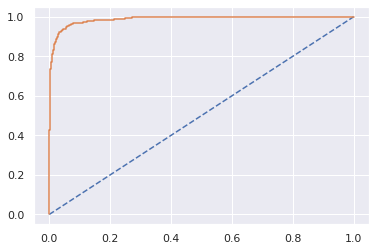

In [811]:
# predict probabilities
probs_gbcl_t = Model_gbcl.predict_proba(x_test_treated2)
# keep probabilities for the positive outcome only
probs_gbcl_t = probs_gbcl_t[:, 1]
# calculate AUC
gbcl_test_auc = roc_auc_score(y_test, probs_gbcl_t)
print('AUC for Gradient Test Data: %.3f' % gbcl_test_auc)
# calculate roc curve
gbcl_test_fpr, gbcl_test_tpr, gbcl_test_thresholds = roc_curve(y_test, probs_gbcl_t)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gbcl_test_fpr, gbcl_test_tpr);

In [812]:
model_param_gbcl_train=gbcl_train_acc,gbcl_train_auc,gbcl_train_recall,gbcl_train_precision,gbcl_train_f1
model_param_gbcl_test=gbcl_test_acc,gbcl_test_auc,gbcl_test_recall,gbcl_test_precision,gbcl_test_f1
print(model_param_gbcl_train)
print(model_param_gbcl_test)

(1.0, 1.0, 1.0, 1.0, 1.0)
(0.9618117229129662, 0.987788024191533, 0.86, 0.9, 0.88)


In [813]:
# Variable Importance
print (pd.DataFrame(Model_gbcl.feature_importances_, columns = ["Imp"], index = x_train_bal.columns).sort_values('Imp',ascending=False))

                              Imp
Tenure                   0.452394
Complain_ly              0.155029
Marital_Status           0.085807
account_segment          0.044862
rev_per_month            0.040941
City_Tier                0.037760
CC_Agent_Score           0.034391
Day_Since_CC_connect     0.027977
Account_user_count       0.022085
Payment                  0.017190
rev_growth_yoy           0.016155
Login_device             0.014991
coupon_used_for_payment  0.014912
cashback                 0.013888
CC_Contacted_LY          0.012672
Gender                   0.005726
Service_Score            0.003220


'coupon_used_for_payment','Login_device',

In [814]:
x_train_new2=x_train_bal.drop(['CC_Contacted_LY','Gender','Service_Score'],axis=1)
x_test_new2=x_test_treated2.drop(['CC_Contacted_LY','Gender','Service_Score'],axis=1)

In [815]:
from sklearn.ensemble import GradientBoostingClassifier
Model_gbcl = GradientBoostingClassifier(random_state=1,learning_rate=0.1, n_estimators=5000)
Model_gbcl = Model_gbcl.fit(x_train_new2, y_train_bal)

In [816]:
ytrain_predict_gbcl = Model_gbcl.predict(x_train_new2)
ytest_predict_gbcl = Model_gbcl.predict(x_test_new2)


#### <font color="red">***Checking Performance matrix, AUC and ROC for Gradient Boosting Model***

#### <font color="red">*Checking Performance matrix for Gradient Boosting Model*

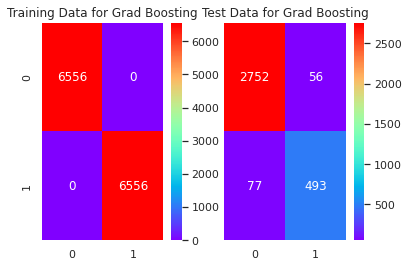

In [817]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the Gradient Boosting model for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train_bal,ytrain_predict_gbcl)),annot=True,fmt='.5g',cmap='rainbow',ax=a[0][0]);
a[0][0].set_title('Training Data for Grad Boosting')

#Plotting confusion matrix for the Gradient Boosting model for the Test Data

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict_gbcl)),annot=True,fmt='.5g',cmap='rainbow',ax=a[0][1]);
a[0][1].set_title('Test Data for Grad Boosting');

In [818]:
## Classification Report on the train data
print('Classification Report of the train data of Gradient Boosting Model:\n\n',classification_report(y_train_bal, ytrain_predict_gbcl));

Classification Report of the train data of Gradient Boosting Model:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6556
           1       1.00      1.00      1.00      6556

    accuracy                           1.00     13112
   macro avg       1.00      1.00      1.00     13112
weighted avg       1.00      1.00      1.00     13112



In [819]:
# Accuracy - Train Data
gbcl_train_acc=Model_gbcl.score(x_train_new2, y_train_bal)
gbcl_train_acc

1.0

In [820]:
gbcl_train_metrics=classification_report(y_train_bal, ytrain_predict_gbcl,output_dict=True)
df_gbcl=pd.DataFrame(gbcl_train_metrics).transpose()
gbcl_train_precision=round(df_gbcl.loc["1"][0],2)
gbcl_train_recall=round(df_gbcl.loc["1"][1],2)
gbcl_train_f1=round(df_gbcl.loc["1"][2],2)
print ('gbcl_train_precision ',gbcl_train_precision)
print ('gbcl_train_recall ',gbcl_train_recall)
print ('gbcl_train_f1 ',gbcl_train_f1)

gbcl_train_precision  1.0
gbcl_train_recall  1.0
gbcl_train_f1  1.0


In [821]:
## Classification Report on the test data
print('Classification Report of the test data of Gradient Boosting Model:\n\n',classification_report(y_test, ytest_predict_gbcl));


Classification Report of the test data of Gradient Boosting Model:

               precision    recall  f1-score   support

           0       0.97      0.98      0.98      2808
           1       0.90      0.86      0.88       570

    accuracy                           0.96      3378
   macro avg       0.94      0.92      0.93      3378
weighted avg       0.96      0.96      0.96      3378



In [822]:
# Accuracy - Test Data
gbcl_test_acc=Model_gbcl.score(x_test_new2, y_test)
gbcl_test_acc

0.9606275902901125

In [823]:
gbcl_test_metrics=classification_report(y_test, ytest_predict_gbcl,output_dict=True)
df_gbcl_t=pd.DataFrame(gbcl_test_metrics).transpose()
gbcl_test_precision=round(df_gbcl_t.loc["1"][0],2)
gbcl_test_recall=round(df_gbcl_t.loc["1"][1],2)
gbcl_test_f1=round(df_gbcl_t.loc["1"][2],2)
print ('gbcl_test_precision ',gbcl_test_precision)
print ('gbcl_test_recall ',gbcl_test_recall)
print ('gbcl_test_f1 ',gbcl_test_f1)

gbcl_test_precision  0.9
gbcl_test_recall  0.86
gbcl_test_f1  0.88


#### <font color="red"> *AUC and ROC for the training data on Gradient Boosting Model*

AUC for Gradient Train Data: 1.000


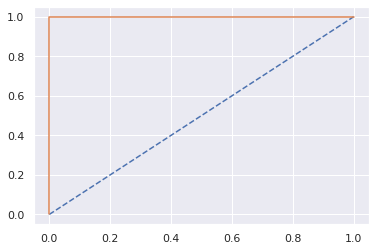

In [824]:
# predict probabilities
probs_gbcl_tr = Model_gbcl.predict_proba(x_train_new2)
# keep probabilities for the positive outcome only
probs_gbcl_tr = probs_gbcl_tr[:, 1]
# calculate AUC
gbcl_train_auc = roc_auc_score(y_train_bal, probs_gbcl_tr)
print('AUC for Gradient Train Data: %.3f' % gbcl_train_auc)
# calculate roc curve
gbcl_train_fpr, gbcl_train_tpr, gbcl_train_thresholds = roc_curve(y_train_bal, probs_gbcl_tr)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gbcl_train_fpr, gbcl_train_tpr);

#### <font color="red">*AUC and ROC for the test data on Gradient Boosting Model*





AUC for Gradient Test Data: 0.984


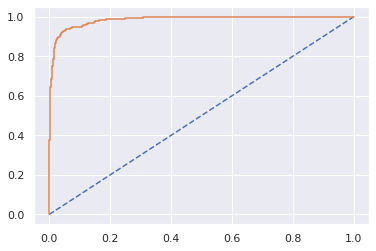

In [825]:
# predict probabilities
probs_gbcl_t = Model_gbcl.predict_proba(x_test_new2)
# keep probabilities for the positive outcome only
probs_gbcl_t = probs_gbcl_t[:, 1]
# calculate AUC
gbcl_test_auc = roc_auc_score(y_test, probs_gbcl_t)
print('AUC for Gradient Test Data: %.3f' % gbcl_test_auc)
# calculate roc curve
gbcl_test_fpr, gbcl_test_tpr, gbcl_test_thresholds = roc_curve(y_test, probs_gbcl_t)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gbcl_test_fpr, gbcl_test_tpr);

In [826]:
model_param_gbcl_train=gbcl_train_acc,gbcl_train_auc,gbcl_train_recall,gbcl_train_precision,gbcl_train_f1
model_param_gbcl_test=gbcl_test_acc,gbcl_test_auc,gbcl_test_recall,gbcl_test_precision,gbcl_test_f1
print(model_param_gbcl_train)
print(model_param_gbcl_test)

(1.0, 1.0, 1.0, 1.0, 1.0)
(0.9606275902901125, 0.984281126605688, 0.86, 0.9, 0.88)


In [827]:
# Variable Importance
print (pd.DataFrame(Model_gbcl.feature_importances_, columns = ["Imp"], index =x_train_new2.columns).sort_values('Imp',ascending=False))

                              Imp
Tenure                   0.457455
Complain_ly              0.155632
Marital_Status           0.085187
account_segment          0.046139
rev_per_month            0.042923
City_Tier                0.037943
CC_Agent_Score           0.035493
Day_Since_CC_connect     0.030543
Account_user_count       0.022376
rev_growth_yoy           0.018211
cashback                 0.017339
Payment                  0.017331
coupon_used_for_payment  0.016940
Login_device             0.016489


# <font color = Green> <b> **Building a Bagging Model**

In [828]:
RF_model=RandomForestClassifier(min_samples_leaf=20,min_samples_split=60)
Model_bagg=BaggingClassifier(base_estimator=RF_model,n_estimators=50,random_state=1)


In [829]:
Model_bagg.fit(x_train_bal, y_train_bal)

BaggingClassifier(base_estimator=RandomForestClassifier(min_samples_leaf=20,
                                                        min_samples_split=60),
                  n_estimators=50, random_state=1)

In [830]:
ytrain_predict_bagg = Model_bagg.predict(x_train_bal)
ytest_predict_bagg = Model_bagg.predict(x_test_treated2)

#### <font color="red">***Checking Performance matrix, AUC and ROC for Bagging Model***

#### <font color="red">*Checking Performance matrix for Bagging Model*

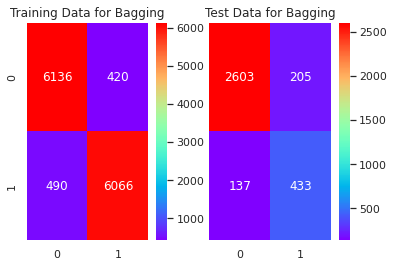

In [831]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the Bagging model for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train_bal,ytrain_predict_bagg)),annot=True,fmt='.5g',cmap='rainbow',ax=a[0][0]);
a[0][0].set_title('Training Data for Bagging')

#Plotting confusion matrix for the Bagging model for the Test Data

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict_bagg)),annot=True,fmt='.5g',cmap='rainbow',ax=a[0][1]);
a[0][1].set_title('Test Data for Bagging');

In [832]:
## Classification Report on the train data
print('Classification Report of the train data of Bagging Model:\n\n',classification_report(y_train_bal, ytrain_predict_bagg));

Classification Report of the train data of Bagging Model:

               precision    recall  f1-score   support

           0       0.93      0.94      0.93      6556
           1       0.94      0.93      0.93      6556

    accuracy                           0.93     13112
   macro avg       0.93      0.93      0.93     13112
weighted avg       0.93      0.93      0.93     13112



In [833]:
# Accuracy - Train Data
bagg_train_acc=Model_bagg.score(x_train_bal, y_train_bal)
bagg_train_acc

0.9305979255643685

In [834]:
bagg_train_metrics=classification_report(y_train_bal, ytrain_predict_bagg,output_dict=True)
df_bagg=pd.DataFrame(bagg_train_metrics).transpose()
bagg_train_precision=round(df_bagg.loc["1"][0],2)
bagg_train_recall=round(df_bagg.loc["1"][1],2)
bagg_train_f1=round(df_bagg.loc["1"][2],2)
print ('bagg_train_precision ',bagg_train_precision)
print ('bagg_train_recall ',bagg_train_recall)
print ('bagg_train_f1 ',bagg_train_f1)

bagg_train_precision  0.94
bagg_train_recall  0.93
bagg_train_f1  0.93


In [835]:
## Classification Report on the test data
print('Classification Report of the test data of Bagging Model:\n\n',classification_report(y_test, ytest_predict_bagg));


Classification Report of the test data of Bagging Model:

               precision    recall  f1-score   support

           0       0.95      0.93      0.94      2808
           1       0.68      0.76      0.72       570

    accuracy                           0.90      3378
   macro avg       0.81      0.84      0.83      3378
weighted avg       0.90      0.90      0.90      3378



In [836]:
# Accuracy - Test Data
bagg_test_acc=Model_bagg.score(x_test_treated2, y_test)
bagg_test_acc

0.8987566607460036

In [837]:
bagg_test_metrics=classification_report(y_test, ytest_predict_bagg,output_dict=True)
df_bagg_t=pd.DataFrame(bagg_test_metrics).transpose()
bagg_test_precision=round(df_bagg_t.loc["1"][0],2)
bagg_test_recall=round(df_bagg_t.loc["1"][1],2)
bagg_test_f1=round(df_bagg_t.loc["1"][2],2)
print ('bagg_test_precision ',bagg_test_precision)
print ('bagg_test_recall ',bagg_test_recall)
print ('bagg_test_f1 ',bagg_test_f1)

bagg_test_precision  0.68
bagg_test_recall  0.76
bagg_test_f1  0.72


#### <font color="red"> *AUC and ROC for the training data on Bagging Model*

AUC for Bagging Train Data: 0.984


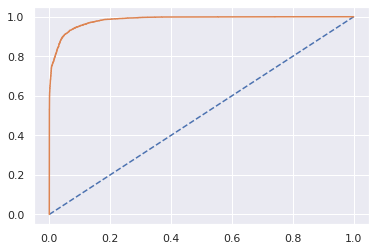

In [838]:
# predict probabilities
probs_bagg_tr = Model_bagg.predict_proba(x_train_bal)
# keep probabilities for the positive outcome only
probs_bagg_tr = probs_bagg_tr[:, 1]
# calculate AUC
bagg_train_auc = roc_auc_score(y_train_bal, probs_bagg_tr)
print('AUC for Bagging Train Data: %.3f' % bagg_train_auc)
# calculate roc curve
bagg_train_fpr, bagg_train_tpr, bagg_train_thresholds = roc_curve(y_train_bal, probs_bagg_tr)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(bagg_train_fpr, bagg_train_tpr);

#### <font color="red">*AUC and ROC for the test data on Bagging Model*





AUC for Bagging Test Data: 0.937


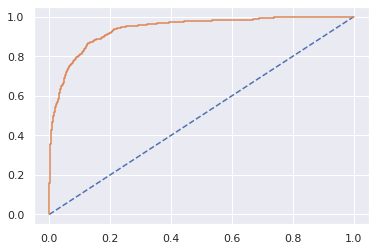

In [839]:
# predict probabilities
probs_bagg_t = Model_bagg.predict_proba(x_test_treated2)
# keep probabilities for the positive outcome only
probs_bagg_t = probs_bagg_t[:, 1]
# calculate AUC
bagg_test_auc = roc_auc_score(y_test, probs_bagg_t)
print('AUC for Bagging Test Data: %.3f' % bagg_test_auc)
# calculate roc curve
bagg_test_fpr, bagg_test_tpr, bagg_test_thresholds = roc_curve(y_test, probs_bagg_t)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(bagg_test_fpr, bagg_test_tpr);

In [840]:
model_param_bagg_train=bagg_train_acc,bagg_train_auc,bagg_train_recall,bagg_train_precision,bagg_train_f1
model_param_bagg_test=bagg_test_acc,bagg_test_auc,bagg_test_recall,bagg_test_precision,bagg_test_f1
print(model_param_bagg_train)
print(model_param_bagg_test)

(0.9305979255643685, 0.9835150704253139, 0.93, 0.94, 0.93)
(0.8987566607460036, 0.9372769530664268, 0.76, 0.68, 0.72)


# <font color = Green> <b> Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve

# <font color="red"> <b> Model Performance of general methods

In [841]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
        'Neural Network Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1],
        'Log_Reg Train':model_param_lr_train,
        'Log_Reg Test':model_param_lr_test,
        'KNN Train':model_param_knn_train,
        'KNN Test':model_param_knn_test},index=index)
round(data,2)

CART Train  CART Test  Neural Network Train  Neural Network Test  \
Accuracy         0.98       0.93                   1.0                 0.86   
AUC              1.00       0.92                   1.0                 0.90   
Recall           0.97       0.76                   1.0                 0.95   
Precision        0.99       0.80                   1.0                 0.56   
F1 Score         0.98       0.78                   1.0                 0.70   

           Log_Reg Train  Log_Reg Test  KNN Train  KNN Test  
Accuracy            0.80          0.78        1.0      0.96  
AUC                 0.87          0.87        1.0      0.96  
Recall              0.82          0.81        1.0      0.93  
Precision           0.79          0.42        1.0      0.87  
F1 Score            0.81          0.55        1.0      0.90

# <font color="red"> <b> Model Performance of Enseamble methods

In [842]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
        'Bagging Train':model_param_bagg_train,
        'Bagging Test':model_param_bagg_test,
        'AdaBoosting Train':model_param_adb_train,
        'AdaBoosting Test':model_param_adb_test,
        'Gradient Boosting Train':model_param_gbcl_train,
        'Gradient Boosting Test':model_param_gbcl_test},index=index)
round(data,2)

Random Forest Train  Random Forest Test  Bagging Train  \
Accuracy                  0.99                0.95           0.93   
AUC                       0.99                0.91           0.98   
Recall                    0.99                0.86           0.93   
Precision                 0.99                0.84           0.94   
F1 Score                  0.99                0.85           0.93   

           Bagging Test  AdaBoosting Train  AdaBoosting Test  \
Accuracy           0.90               0.79              0.85   
AUC                0.94               0.79              0.80   
Recall             0.76               0.72              0.72   
Precision          0.68               0.84              0.54   
F1 Score           0.72               0.77              0.62   

           Gradient Boosting Train  Gradient Boosting Test  
Accuracy                       1.0                    0.96  
AUC                            1.0                    0.98  
Recall                         1.0                    0.86  
Precision                      1.0                    0.90  
F1 Score                       1.0                    0.88

#### <font color="red">***ROC Curve for all models on the Test data***

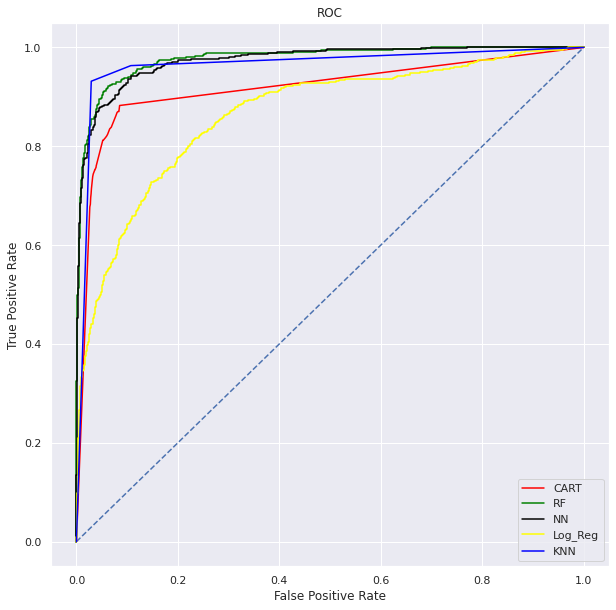

In [843]:
plt.figure(figsize=(10,10));
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(nn_test_fpr,nn_test_tpr,color='black',label="NN")
plt.plot(lr_test_fpr, lr_test_tpr,color='yellow',label="Log_Reg");
plt.plot(knn_test_fpr, knn_test_tpr,color='blue',label="KNN");
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc='lower right')

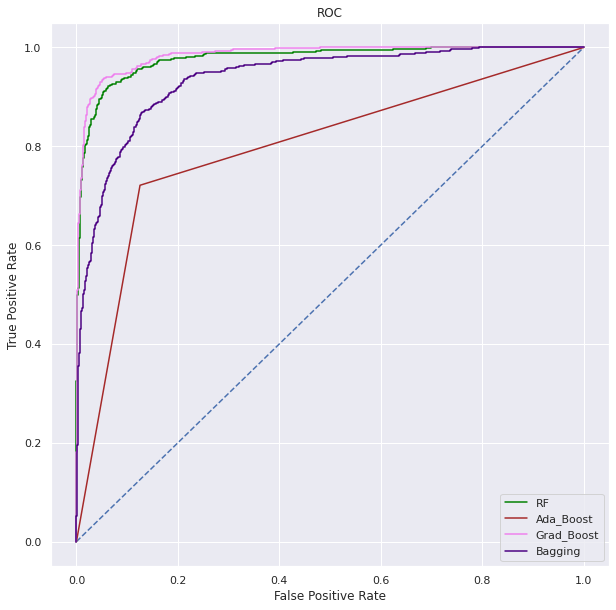

In [844]:
plt.figure(figsize=(10,10));
plt.plot([0, 1], [0, 1], linestyle='--');
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(adb_test_fpr, adb_test_tpr,color='Brown',label="Ada_Boost");
plt.plot(gbcl_test_fpr, gbcl_test_tpr,color='violet',label="Grad_Boost");
plt.plot(bagg_test_fpr, bagg_test_tpr,color='Indigo',label="Bagging");
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.title('ROC');
plt.legend(loc='lower right');